# Explanation of `lcparam_full_long.txt`

The file `lcparam_full_long.txt` contains a table of key parameters recovered from light-curve fits for the full Pantheon sample of Type Ia supernovae. The Pantheon sample is a compilation of supernova observations used to study cosmology, particularly to understand the expansion of the universe.

## Columns in the File

1. **name**: The identifier for the supernova.
2. **zcmb**: The redshift of the supernova in the Cosmic Microwave Background (CMB) frame.
3. **zhel**: The heliocentric redshift of the supernova.
4. **dz**: The uncertainty in the redshift.
5. **mb**: The B-band peak magnitude of the supernova.
6. **dmb**: The uncertainty in the B-band peak magnitude.
7. **x1**: The stretch parameter (describes the shape of the light curve).
8. **dx1**: The uncertainty in the stretch parameter.
9. **color**: The color parameter (describes the color of the supernova).
10. **dcolor**: The uncertainty in the color parameter.
11. **3rdvar**: A third variable related to the supernova (often used for additional corrections).
12. **d3rdvar**: The uncertainty in the third variable.
13. **cov_m_s**: Covariance between the B-band magnitude and the stretch parameter.
14. **cov_m_c**: Covariance between the B-band magnitude and the color parameter.
15. **cov_s_c**: Covariance between the stretch parameter and the color parameter.
16. **set**: The data set the supernova belongs to.
17. **ra**: The right ascension of the supernova.
18. **dec**: The declination of the supernova.
19. **biascor**: The bias correction applied to the supernova data.

## Use in Cosmology

These parameters are crucial for determining the distances to the supernovae and for constructing the Hubble diagram, which is used to study the expansion history of the universe. The redshift provides a measure of how much the universe has expanded since the light left the supernova, while the B-band peak magnitude (after corrections) gives the luminosity distance. The stretch and color parameters are used to correct the observed magnitudes for various effects. Covariances provide information on how the uncertainties in these parameters are related.


In [91]:
import pandas as pd
import numpy as np

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()  # Read and strip the first line
    header = header_line.lstrip('#').strip()  # Remove leading '#' and any extra whitespace

# Remove the last word from the header
header_words = header.split()  # Split into words
header_words.pop()  # Remove the last word
header = ' '.join(header_words)  # Join the remaining words back into a string

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)  # Skip the first line and don't set headers

# Set the header for the DataFrame
data.columns = header.split()  # Set columns using the stripped header

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Use the observed data as a placeholder for theoretical values
# In a real scenario, you would use your model's predictions here
mu = np.mean(d)

# Compute the covariance matrix (assuming it is diagonal with dmb as standard deviations)
Sigma = np.diag(dmb**2)

# Compute the inverse of the covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Compute the residuals
Delta = d - mu

# Vector of ones
ones = np.ones_like(d)

# Compute the terms
term1 = Delta.T @ Sigma_inv @ Delta
term2 = (ones.T @ Sigma_inv @ Delta)**2 / (ones.T @ Sigma_inv @ ones)

# Compute the log-likelihood
lnLm = -0.5 * (term1 - term2)

print("Log Likelihood:", lnLm)


Log Likelihood: -165817.77826682583


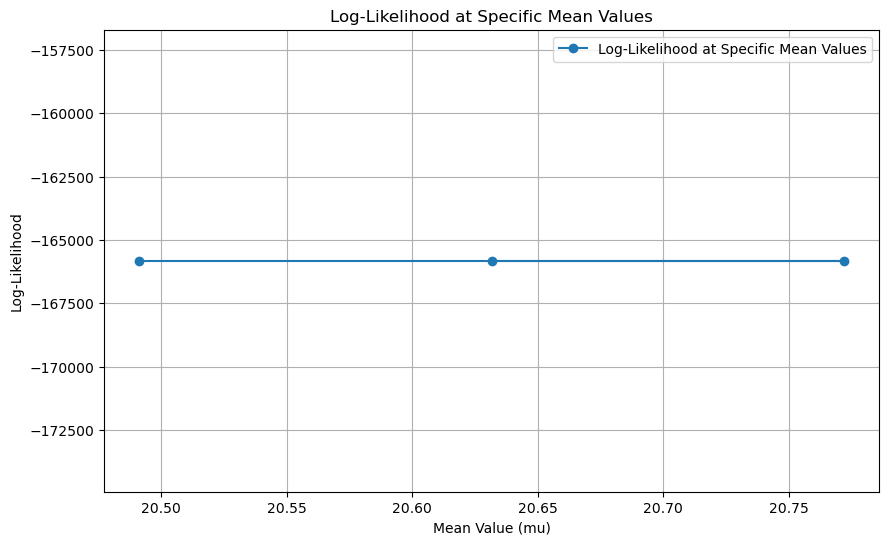

Log Likelihood Values: [-165817.77826682583, -165817.77826682577, -165817.7782668258]


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()  # Read and strip the first line
    header = header_line.lstrip('#').strip()  # Remove leading '#' and any extra whitespace

# Remove the last word from the header
header_words = header.split()  # Split into words
header_words.pop()  # Remove the last word
header = ' '.join(header_words)  # Join the remaining words back into a string

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)  # Skip the first line and don't set headers

# Set the header for the DataFrame
data.columns = header.split()  # Set columns using the stripped header

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Define the log-likelihood function
def log_likelihood(d, mu, Sigma):
    """
    Compute the log-likelihood for a given set of parameters and data.

    Parameters:
    d (np.array): Observed data.
    mu (np.array): Mean values (theoretical predictions).
    Sigma (np.array): Covariance matrix.

    Returns:
    float: Log-likelihood value.
    """
    # Compute the inverse of the covariance matrix
    Sigma_inv = np.linalg.inv(Sigma)

    # Compute the residuals
    Delta = d - mu

    # Vector of ones
    ones = np.ones_like(d)

    # Compute the terms
    term1 = Delta.T @ Sigma_inv @ Delta
    term2 = (ones.T @ Sigma_inv @ Delta)**2 / (ones.T @ Sigma_inv @ ones)

    # Compute the log-likelihood
    lnLm = -0.5 * (term1 - term2)

    return lnLm

# Compute the covariance matrix (assuming it is diagonal with dmb as standard deviations)
Sigma = np.diag(dmb**2)

# Calculate specific mean values to test
mean_d = np.mean(d)
mean_dmb = np.mean(dmb)

# Define specific mu values based on the mean of d and dmb
mu_values = [mean_d, mean_d + mean_dmb, mean_d - mean_dmb]

# Compute log-likelihood for each value of mu
log_likelihood_values = [log_likelihood(d, np.full_like(d, mu), Sigma) for mu in mu_values]

# Plot the log-likelihood values
plt.figure(figsize=(10, 6))
plt.plot(mu_values, log_likelihood_values, 'o-', label='Log-Likelihood at Specific Mean Values')
plt.xlabel('Mean Value (mu)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood at Specific Mean Values')
plt.legend()
plt.grid(True)
plt.show()

print("Log Likelihood Values:", log_likelihood_values)

100%|██████████| 1000/1000 [00:37<00:00, 26.49it/s]


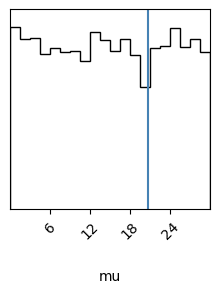

Mean of mu: 14.90089916923255
Standard deviation of mu: 8.757381081874781


In [93]:
import pandas as pd
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Log-likelihood function
def log_likelihood(params, d, Sigma_inv):
    mu = params[0]
    Delta = d - mu
    ones = np.ones_like(d)
    
    term1 = Delta.T @ Sigma_inv @ Delta
    term2 = (ones.T @ Sigma_inv @ Delta)**2 / (ones.T @ Sigma_inv @ ones)
    
    return -0.5 * (term1 - term2)

# Log-prior function
def log_prior(params):
    mu = params[0]
    if 0 < mu < 30:
        return 0.0
    return -np.inf

# Log-posterior function
def log_posterior(params, d, Sigma_inv):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, d, Sigma_inv)

# Initial guess for the parameter
initial = np.array([np.mean(d)])

# Number of dimensions
ndim = len(initial)

# Number of walkers
nwalkers = 50

# Initial positions of the walkers
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Set up the MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(d, Sigma_inv))

# Run the MCMC sampler
nsteps = 1000
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Plot the results
fig = corner.corner(samples, labels=["mu"], truths=[np.mean(d)])
plt.show()

# Print the mean and standard deviation of the posterior distribution
mu_mcmc = np.mean(samples)
mu_std = np.std(samples)
print(f"Mean of mu: {mu_mcmc}")
print(f"Standard deviation of mu: {mu_std}")


     name     zcmb     zhel   dz        mb      dmb  x1  dx1  color  dcolor  \
0  03D1au  0.50309  0.50309  0.0  22.93445  0.12605   0    0      0       0   
1  03D1ax  0.49480  0.49480  0.0  22.88020  0.11765   0    0      0       0   
2  03D1co  0.67767  0.67767  0.0  24.03770  0.20560   0    0      0       0   
3  03D1ew  0.86650  0.86650  0.0  24.34685  0.17385   0    0      0       0   
4  03D1fq  0.79857  0.79857  0.0  24.36050  0.17435   0    0      0       0   

   3rdvar  d3rdvar  cov_m_s  cov_m_c  cov_s_c  set  ra  dec  
0       0        0        0        0        0    0   0    0  
1       0        0        0        0        0    0   0    0  
2       0        0        0        0        0    0   0    0  
3       0        0        0        0        0    0   0    0  
4       0        0        0        0        0    0   0    0  
Covariance Matrix (Sigma):
[[0.0158886  0.         0.         ... 0.         0.         0.        ]
 [0.         0.01384152 0.         ... 0.         0. 

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 2063.90it/s]


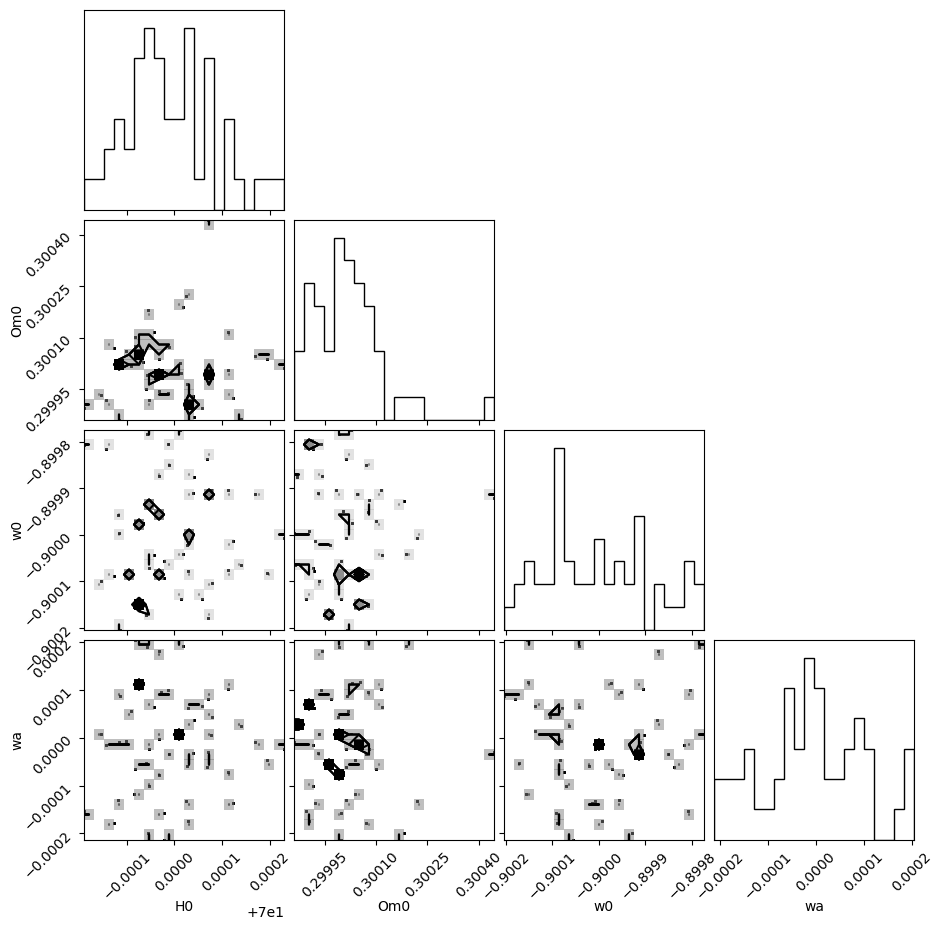

'\nnwalkers = 50\nndim = 4\ninitial = [70, 0.3, -1, 0]  # Initial guess for H0, Om0, w0, wa\npos = initial + 1e-4 * np.random.randn(nwalkers, ndim)\n\nsampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))\nsampler.run_mcmc(pos, 5000, progress=True)\n\n# Get the MCMC samples\nsamples = sampler.get_chain(discard=100, thin=15, flat=True)\n\n# Plot the results\nfig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"], truths=[70, 0.3, -1, 0])\n'

In [94]:
import pandas as pd
import numpy as np
import camb
import emcee
import corner

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header (assumed to be 'biascor')
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Check the data and covariance matrix
print(data.head())
print("Covariance Matrix (Sigma):")
print(Sigma)
print("Inverse Covariance Matrix (Sigma_inv):")
print(Sigma_inv)

# Define the cosmological model
def get_mu(z, H0, Om0, w0, wa):
    # Configure CAMB parameters
    pars = camb.CAMBparams()
    pars.set_dark_energy(w=w0, wa=wa)
    pars.set_cosmology(H0=H0, ombh2=0.022, omch2=Om0*0.12)
    pars.InitPower.set_params(ns=0.965)
    results = camb.get_results(pars)
    
    # Get luminosity distance in Mpc
    dl = results.comoving_radial_distance(z) * (1 + z)
    
    # Convert to distance modulus
    mu = 5 * np.log10(dl) + 25
    return mu

# Define the likelihood function
def ln_likelihood(params, data, cov_inv):
    H0, Om0, w0, wa = params
    z = data['zcmb'].values
    d = data['mb'].values
    mu = get_mu(z, H0, Om0, w0, wa)
    
    diff = d - mu
    term1 = -0.5 * diff @ cov_inv @ diff
    term2 = 0.5 * ((np.ones_like(diff) @ cov_inv @ diff) ** 2) / (np.ones_like(diff) @ cov_inv @ np.ones_like(diff))
    return term1 + term2

# Define the log-posterior function
def log_posterior(params, data, cov_inv):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(params, data, cov_inv)

# Modify the prior range for w0 to exclude values close to -1
def log_prior(params):
    H0, Om0, w0, wa = params
    if 0 < H0 < 100 and 0 < Om0 < 1 and -2 < w0 < -0.99 and -2 < wa < 2:
        return 0.0
    return -np.inf

# Initialize the MCMC sampler
# keeping in mind that i have to exclude values of w0 close to -1
initial = np.array([70, 0.3, -0.9, 0.0])
ndim = len(initial)
nwalkers = 50
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))

# Run the MCMC sampler
nsteps = 1000
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Plot the results
fig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"])
plt.show()

'''
nwalkers = 50
ndim = 4
initial = [70, 0.3, -1, 0]  # Initial guess for H0, Om0, w0, wa
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))
sampler.run_mcmc(pos, 5000, progress=True)

# Get the MCMC samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Plot the results
fig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"], truths=[70, 0.3, -1, 0])
'''


In [95]:
import sys
import platform
import os
import pandas as pd
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Path setup for CAMB
_camb_path = os.path.join(os.path.dirname(os.path.abspath('.')), 'CAMB')
sys.path.insert(0, _camb_path)

import camb
print('Using CAMB %s installed at %s' % (camb.__version__, os.path.dirname(camb.__file__)))

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header (assumed to be 'biascor')
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
z = data['zcmb'].values
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Define the cosmological model
def get_mu(z, H0, Om0, w0, wa):
    # Check for phantom divide crossing
    w = w0 + wa * (z / (1 + z))
    if np.any(w > -1):
        crossing_indices = np.where(w > -1)[0]
        crossing_redshifts = z[crossing_indices]
        print(f"Invalid w crossing -1 at redshifts: {crossing_redshifts}")
        return np.nan  # Handle crossing by returning NaN or some error value

    # Configure CAMB parameters
    try:
        pars = camb.CAMBparams()
        pars.set_dark_energy(w=w0, wa=wa)
        pars.set_cosmology(H0=H0, ombh2=0.022, omch2=Om0*0.12)
        pars.InitPower.set_params(ns=0.965)
        results = camb.get_results(pars)
    
        # Get luminosity distance in Mpc
        dl = results.comoving_radial_distance(z) * (1 + z)
        
        # Convert to distance modulus
        mu = 5 * np.log10(dl) + 25
        return mu
    except camb.CAMBError as e:
        print(f"CAMB Error: {e}")
        return np.nan  # Handle CAMB error

# Test the function with given parameters
mu = get_mu(z, 70, 0.3, -1.3, -0.3)
print(mu)


Using CAMB 1.5.4 installed at /Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb
CAMB Error: fluid dark energy model does not support w crossing -1
nan


## Phantom Divide ($w=-1$)
Now I want to analyze how the equation of state parameter $w$ varies with different values of $w_0$, $w_a$, and redshift $z$. Specifically, the script aims to:

1. **Calculate $w$**:
   - Compute the equation of state parameter $w$ using the formula:
     $$
     w = w_0 + w_a \left(\frac{z}{1+z}\right)
     $$

2. **Determine the Distribution**:
   - Count the number of instances where $w$ is less than -1 and where $w$ is greater than -1 across different values of $w_0$, $w_a$, and redshift $z$.

3. **Identify Crossings**:
   - Find and record cases where $w$ transitions from being less than -1 to being greater than -1 (or vice versa) as the redshift $z$ varies.
   - Store these cases, including the values of $w_0$, $w_a$, the specific redshift where the transition occurs, and the values of $w$ before and after the transition.

4. **Output Results**:
   - Print the total counts of $w$ values that are less than -1 and greater than -1.
   - Output the minimum and maximum redshifts from the data file.
   - Print the specific $w_0$, $w_a$, and redshift values where $w$ crosses the -1 threshold.

The script uses these calculations to understand how $w$ behaves under different cosmological parameters and redshift values, with a particular focus on transitions across the $w = -1$ boundary.


In [137]:
import sys
import platform
import os
import pandas as pd
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

_camb_path = os.path.join(os.path.dirname(os.path.abspath('.')), 'CAMB')
sys.path.insert(0, _camb_path)

import camb
print('Using CAMB %s installed at %s' % (camb.__version__, os.path.dirname(camb.__file__)))

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header (assumed to be 'biascor')
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

z_data = data['zcmb'].values
z = np.linspace(np.min(z_data), np.max(z_data), 10)

# Initialize counters and storage
count_minus_one = 0
count_plus_one = 0
tot = 0

# Initialize a list to store results
crossings = []

# For loop that computes w for different values of w0 and wa at redshifts z
for w0 in np.linspace(-1.5, -0.5, 11):
    for wa in np.linspace(-0.5, 0.5, 11):
        previous_w = None
        for redshift in z:
            w = w0 + wa * (redshift / (1 + redshift))
            if previous_w is not None:
                if previous_w < -1 and w > -1:
                    crossings.append({'w0': w0, 'wa': wa, 'redshift': redshift, 'w_prev': previous_w, 'w_current': w})
                elif previous_w > -1 and w < -1:
                    crossings.append({'w0': w0, 'wa': wa, 'redshift': redshift, 'w_prev': previous_w, 'w_current': w})
            previous_w = w
            if w < -1:
                count_minus_one += 1
            if w > -1:
                count_plus_one += 1
            tot += 1

print(f"Number of w < -1: {count_minus_one}")
print(f"Number of w > -1: {count_plus_one}")

print(np.min(z_data), np.max(z_data))

w_max = -1.3 - 0.3 * (np.min(z_data) / (1 + np.min(z_data)))
w_min = -1.3 - 0.3 * (np.max(z_data) / (1 + np.max(z_data)))
print(w_max)
print(w_min)

# Print the crossings
print("Crossings of w <-1 and w >-1:")
for crossing in crossings:
    print(crossing)

Using CAMB 1.5.4 installed at /Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb
Number of w < -1: 600
Number of w > -1: 600
0.01012 1.0608
-1.3030055834950303
-1.4544254658385094
Crossings of w <-1 and w >-1:
{'w0': -1.2, 'wa': 0.4, 'redshift': 1.0608, 'w_prev': -1.005755201605805, 'w_current': -0.9940993788819875}
{'w0': -1.2, 'wa': 0.5, 'redshift': 0.7105733333333334, 'w_prev': -1.0137095245000167, 'w_current': -0.9922996578145339}
{'w0': -1.1, 'wa': 0.20000000000000007, 'redshift': 1.0608, 'w_prev': -1.0028776008029026, 'w_current': -0.9970496894409938}
{'w0': -1.1, 'wa': 0.30000000000000004, 'redshift': 0.5938311111111112, 'w_prev': -1.0031021980171209, 'w_current': -0.9882257147000101}
{'w0': -1.1, 'wa': 0.4, 'redshift': 0.3603466666666667, 'w_prev': -1.0216456822640998, 'w_current': -0.994042694999314}
{'w0': -1.1, 'wa': 0.5, 'redshift': 0.3603466666666667, 'w_prev': -1.0020571028301246, 'w_current': -0.9675533687491424}
{'w0': -0.8999999999999999, 

In [153]:
import sys,platform,os
import pandas as pd
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

_camb_path = os.path.join(os.path.dirname(os.path.abspath('.')), 'CAMB')
sys.path.insert(0,_camb_path)

import camb
print('Using CAMB %s installed at %s' %(camb.__version__,os.path.dirname(camb.__file__)))

# Load the data
file_path = 'lcparam_full_long.txt'

# Read the first line to get the header
with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

# Remove the last word from the header (assumed to be 'biascor')
header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

# Read the rest of the file into a DataFrame
data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

# Extract relevant columns
d = data['mb'].values
dmb = data['dmb'].values

# Compute the covariance matrix
Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

# Check the data and covariance matrix
print(data.head())
print("Covariance Matrix (Sigma):")
print(Sigma)
print("Inverse Covariance Matrix (Sigma_inv):")
print(Sigma_inv)

# Define the cosmological model
def get_mu(z, H0, Om0, w0, wa):
    # Configure CAMB parameters
    pars = camb.CAMBparams()
    pars.set_dark_energy(w=w0, wa=wa)
    pars.set_cosmology(H0=H0, ombh2=0.022, omch2=Om0*0.12)
    pars.InitPower.set_params(ns=0.965)
    results = camb.get_results(pars)
    
    # Get luminosity distance in Mpc
    dl = results.comoving_radial_distance(z) * (1 + z)
    
    # Convert to distance modulus
    mu = 5 * np.log10(dl) + 25
    return mu

# Define the likelihood function
def ln_likelihood(params, data, cov_inv):
    H0, Om0, w0, wa = params
    z = data['zcmb'].values
    d = data['mb'].values
    try:
        mu = get_mu(z, H0, Om0, w0, wa)
    except Exception as e:
        print(f"Error in get_mu: {e}")
        return -np.inf
    
    diff = d - mu
    term1 = -0.5 * diff @ cov_inv @ diff
    term2 = 0.5 * ((np.ones_like(diff) @ cov_inv @ diff) ** 2) / (np.ones_like(diff) @ cov_inv @ np.ones_like(diff))
    return term1 + term2

# Define the log-posterior function
def log_posterior(params, data, cov_inv):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(params, data, cov_inv)

'''
# Modify the prior range for w0 to exclude values close to -1
def log_prior(params):
    H0, Om0, w0, wa = params
    if 0 < H0 < 100 and 0 < Om0 < 1 and -2 < w0 < -0.5 and -2 < wa < 2:
        return 0.0
    print(f"Invalid prior for params: {params}")
    return -np.inf
'''

def log_prior(params):
    H0, Om0, w0, wa = params
    
    # Basic parameter bounds
    if not (60 < H0 < 80):
        print(f"Invalid H0: {H0}")
        return -np.inf
    if not (0.2 < Om0 < 0.4):
        print(f"Invalid Om0: {Om0}")
        return -np.inf
    if not (-0.9 < w0 < 0):
        print(f"Invalid w0: {w0}")
        return -np.inf
    if not (-1 < wa < 0):
        print(f"Invalid wa: {wa}")
        return -np.inf
    
    '''
    # Ensure w does not cross -1 at any redshift
    z = data['zcmb'].values
    w = w0 + wa * (z / (1 + z))
    if np.any(w > -1):
        crossing_indices = np.where(w > -1)[0]
        crossing_redshifts = z[crossing_indices]
        print(f"w is > -1 at redshifts: {crossing_redshifts}")
        return -np.inf
    '''
    
    # Constraint to avoid crossing w = -1 (relaxed)
    if w0 + wa < -1:
        print(f"w0 + wa < -1: {w0 + wa} -> invalid")
        return -np.inf
    if w0 + wa > -1:
        print(f"w0 + wa > -1: {w0 + wa} -> ok")
    '''
    # Constraint to ensure w_0 + w_a ≤ 0 at high redshift (relaxed)
    if w0 + wa > 0.5:
        print(f"Invalid w0 + wa (>0.5): {w0 + wa}")
        return -np.inf
    '''

    return 0.0

# Initialize the MCMC sampler
initial = np.array([70, 0.3, -0.5, -0.5])
ndim = len(initial)
nwalkers = 10
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

'''
# Check initial likelihoods
print("Initial log-posterior values:")
for i in range(nwalkers):
    print(f"Walker {i}: {log_posterior(pos[i], data, Sigma_inv)}")
'''

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data, Sigma_inv))

# Run the MCMC sampler
nsteps = 2000  # Increase the number of steps
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(flat=True)

# Plot the chains for each parameter
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ["H0", "Om0", "w0", "wa"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler.chain[:, :, i], color="k", alpha=0.3)
    ax.set_ylabel(labels[i])
    ax.set_xlabel("Step number")

plt.tight_layout()
plt.show()

# Convergence diagnostics
from emcee import autocorr

# Compute the autocorrelation time for each parameter
tau = autocorr.integrated_time(sampler.get_chain(flat=True))
print("Autocorrelation times:", tau)

# Plot the results
fig = corner.corner(samples, labels=["H0", "Om0", "w0", "wa"])
plt.show()
#'''

Using CAMB 1.5.4 installed at /Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb
     name     zcmb     zhel   dz        mb      dmb  x1  dx1  color  dcolor  \
0  03D1au  0.50309  0.50309  0.0  22.93445  0.12605   0    0      0       0   
1  03D1ax  0.49480  0.49480  0.0  22.88020  0.11765   0    0      0       0   
2  03D1co  0.67767  0.67767  0.0  24.03770  0.20560   0    0      0       0   
3  03D1ew  0.86650  0.86650  0.0  24.34685  0.17385   0    0      0       0   
4  03D1fq  0.79857  0.79857  0.0  24.36050  0.17435   0    0      0       0   

   3rdvar  d3rdvar  cov_m_s  cov_m_c  cov_s_c  set  ra  dec  
0       0        0        0        0        0    0   0    0  
1       0        0        0        0        0    0   0    0  
2       0        0        0        0        0    0   0    0  
3       0        0        0        0        0    0   0    0  
4       0        0        0        0        0    0   0    0  
Covariance Matrix (Sigma):
[[0.0158886  0.

  0%|          | 0/2000 [00:00<?, ?it/s]

w0 + wa > -1: -0.9997314542479486 -> ok
w0 + wa > -1: -0.9997739222926967 -> ok
w0 + wa > -1: -0.9999426197934389 -> ok
w0 + wa < -1: -1.000010112180039 -> invalid
w0 + wa < -1: -1.0000577267427735 -> invalid
w0 + wa > -1: -0.9999417313708334 -> ok


/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


w0 + wa < -1: -1.0000348983203278 -> invalid
w0 + wa > -1: -0.9997463070209816 -> ok
w0 + wa < -1: -1.000003917478809 -> invalid
w0 + wa > -1: -0.9999410660880061 -> ok


  0%|          | 1/2000 [00:06<3:42:50,  6.69s/it]

w0 + wa > -1: -0.9997376106357251 -> ok
w0 + wa < -1: -1.0001382057803587 -> invalid
w0 + wa > -1: -0.9999586410349337 -> ok
w0 + wa > -1: -0.9999660568940842 -> ok
w0 + wa < -1: -1.000030098866898 -> invalid
w0 + wa > -1: -0.9999989575320256 -> ok
w0 + wa > -1: -0.9997752219211578 -> ok
w0 + wa > -1: -0.9998165388339564 -> ok
w0 + wa > -1: -0.99989525136883 -> ok


  0%|          | 2/2000 [00:14<4:05:57,  7.39s/it]

w0 + wa < -1: -1.0001844465492131 -> invalid
w0 + wa > -1: -0.9996848186129116 -> ok
w0 + wa < -1: -1.0000032893245328 -> invalid
w0 + wa < -1: -1.0000865183708285 -> invalid
w0 + wa > -1: -0.9999198011166675 -> ok
w0 + wa > -1: -0.999944474099075 -> ok
w0 + wa > -1: -0.9996836545247987 -> ok
w0 + wa > -1: -0.9999005942304127 -> ok
w0 + wa > -1: -0.9998875987290375 -> ok
w0 + wa > -1: -0.999870034130871 -> ok


  0%|          | 3/2000 [00:22<4:10:53,  7.54s/it]

w0 + wa < -1: -1.00005099821445 -> invalid
w0 + wa < -1: -1.0000474916428024 -> invalid
w0 + wa > -1: -0.9996484372740044 -> ok
w0 + wa > -1: -0.9999192328553139 -> ok
w0 + wa > -1: -0.9999640627236231 -> ok
w0 + wa < -1: -1.0002448121020064 -> invalid
w0 + wa > -1: -0.9997582108812983 -> ok
w0 + wa < -1: -1.0001695579676264 -> invalid
w0 + wa > -1: -0.9998523932180625 -> ok
w0 + wa < -1: -1.0000810265863922 -> invalid
w0 + wa > -1: -0.9997729642910308 -> ok


  0%|          | 4/2000 [00:29<4:00:10,  7.22s/it]

w0 + wa < -1: -1.0000402848195882 -> invalid
w0 + wa > -1: -0.9996802277825465 -> ok
w0 + wa > -1: -0.9997424077891695 -> ok
w0 + wa > -1: -0.9997572234731769 -> ok
w0 + wa > -1: -0.9998106205841439 -> ok
w0 + wa > -1: -0.9997671510333823 -> ok
w0 + wa < -1: -1.0002132835990758 -> invalid
w0 + wa > -1: -0.9998320388817816 -> ok
w0 + wa > -1: -0.999944066263621 -> ok
w0 + wa > -1: -0.9999563549682124 -> ok


  0%|          | 5/2000 [00:37<4:21:12,  7.86s/it]

w0 + wa < -1: -1.000248082680304 -> invalid
w0 + wa < -1: -1.000402618145855 -> invalid
w0 + wa > -1: -0.9997448683628244 -> ok
w0 + wa > -1: -0.9999316102120382 -> ok
w0 + wa > -1: -0.9999541923516402 -> ok
w0 + wa > -1: -0.9997716442953142 -> ok
w0 + wa > -1: -0.9995099472578662 -> ok
w0 + wa > -1: -0.9997926739675345 -> ok
w0 + wa > -1: -0.9997794899599268 -> ok
w0 + wa > -1: -0.9999311545406357 -> ok


  0%|          | 6/2000 [00:47<4:40:29,  8.44s/it]

w0 + wa > -1: -0.9996847405319809 -> ok
w0 + wa > -1: -0.9994184735645186 -> ok
w0 + wa > -1: -0.9995750000940269 -> ok
w0 + wa > -1: -0.9997534900889598 -> ok
w0 + wa > -1: -0.9997926740878728 -> ok
w0 + wa > -1: -0.9998977291105628 -> ok
w0 + wa > -1: -0.9997719581486584 -> ok
w0 + wa > -1: -0.9999037164836326 -> ok
w0 + wa > -1: -0.9998252533522693 -> ok
w0 + wa > -1: -0.9997065674714438 -> ok


  0%|          | 7/2000 [00:58<5:08:24,  9.28s/it]

w0 + wa > -1: -0.9998953583544319 -> ok
w0 + wa > -1: -0.999948230098087 -> ok
w0 + wa > -1: -0.9997797661821411 -> ok
w0 + wa > -1: -0.9997528530974319 -> ok
w0 + wa > -1: -0.9996549309776226 -> ok
w0 + wa > -1: -0.9997718813191914 -> ok
w0 + wa > -1: -0.998952567995145 -> ok
w0 + wa > -1: -0.9996016688484402 -> ok
w0 + wa < -1: -1.0000454705099016 -> invalid
w0 + wa > -1: -0.9999818744980763 -> ok


  0%|          | 8/2000 [01:08<5:16:59,  9.55s/it]

w0 + wa < -1: -1.0000054368468765 -> invalid
w0 + wa > -1: -0.999195121899056 -> ok
w0 + wa > -1: -0.9998100636609228 -> ok
w0 + wa > -1: -0.9999543325355702 -> ok
w0 + wa > -1: -0.9998179577428861 -> ok
w0 + wa < -1: -1.000496498794495 -> invalid
w0 + wa > -1: -0.9994681665648038 -> ok
w0 + wa > -1: -0.9996605445135771 -> ok
w0 + wa > -1: -0.9999520059413093 -> ok
w0 + wa > -1: -0.9997451941736812 -> ok


  0%|          | 9/2000 [01:17<5:11:22,  9.38s/it]

w0 + wa > -1: -0.9999853084269767 -> ok
w0 + wa > -1: -0.9991140586375133 -> ok
w0 + wa > -1: -0.9995663552852195 -> ok
w0 + wa > -1: -0.99999126824371 -> ok
w0 + wa > -1: -0.9998532252777228 -> ok
w0 + wa > -1: -0.999839084415703 -> ok
w0 + wa > -1: -0.9995289143733284 -> ok
w0 + wa > -1: -0.9999768041843 -> ok
w0 + wa > -1: -0.9994138973656397 -> ok
w0 + wa > -1: -0.9996546884231106 -> ok


  0%|          | 10/2000 [01:29<5:30:40,  9.97s/it]

w0 + wa > -1: -0.9998658871966619 -> ok
w0 + wa > -1: -0.9996343490762329 -> ok
w0 + wa < -1: -1.000024909889917 -> invalid
w0 + wa < -1: -1.000277486133223 -> invalid
w0 + wa < -1: -1.0001223715798724 -> invalid
w0 + wa < -1: -1.0000587708574538 -> invalid
w0 + wa > -1: -0.9992421619988854 -> ok
w0 + wa > -1: -0.9993938960523625 -> ok
w0 + wa > -1: -0.9998090030912368 -> ok
w0 + wa > -1: -0.9996170765695578 -> ok


  1%|          | 11/2000 [01:35<4:57:20,  8.97s/it]

w0 + wa > -1: -0.9995299329324034 -> ok
w0 + wa > -1: -0.9992413010744328 -> ok
w0 + wa < -1: -1.0000082823497243 -> invalid
w0 + wa > -1: -0.9997673592177677 -> ok
w0 + wa > -1: -0.9995832363826929 -> ok
w0 + wa < -1: -1.0004580465691921 -> invalid
w0 + wa > -1: -0.9999842765088054 -> ok
w0 + wa > -1: -0.9995523377003606 -> ok
w0 + wa < -1: -1.0003619134731874 -> invalid
w0 + wa > -1: -0.9996783597885126 -> ok


  1%|          | 12/2000 [01:43<4:45:38,  8.62s/it]

w0 + wa > -1: -0.9997390345649688 -> ok
w0 + wa < -1: -1.0003551667661927 -> invalid
w0 + wa > -1: -0.9997679165602746 -> ok
w0 + wa > -1: -0.9997981320997041 -> ok
w0 + wa > -1: -0.9999316055848968 -> ok
w0 + wa > -1: -0.999986212395819 -> ok
w0 + wa > -1: -0.9996379644766196 -> ok
w0 + wa > -1: -0.9994547196597959 -> ok
w0 + wa > -1: -0.9995161627114364 -> ok
w0 + wa > -1: -0.9991968521876262 -> ok


  1%|          | 13/2000 [01:53<4:59:11,  9.03s/it]

w0 + wa < -1: -1.0001001149261155 -> invalid
w0 + wa > -1: -0.9995983546983408 -> ok
w0 + wa > -1: -0.9993959804357129 -> ok
w0 + wa > -1: -0.9996371448599357 -> ok
w0 + wa > -1: -0.9998085771341525 -> ok
w0 + wa > -1: -0.9998602373521515 -> ok
w0 + wa > -1: -0.9987618517496015 -> ok
w0 + wa > -1: -0.9998396940770315 -> ok
w0 + wa > -1: -0.9998844261078472 -> ok
w0 + wa > -1: -0.9989039989480222 -> ok


  1%|          | 14/2000 [02:03<5:08:17,  9.31s/it]

w0 + wa > -1: -0.999779717595317 -> ok
w0 + wa < -1: -1.0000245071196403 -> invalid
w0 + wa > -1: -0.9998081428081189 -> ok
w0 + wa > -1: -0.9997587942866077 -> ok
w0 + wa > -1: -0.9991566219907515 -> ok
w0 + wa > -1: -0.9998532649688824 -> ok
w0 + wa > -1: -0.9993586099585303 -> ok
w0 + wa > -1: -0.999125383874879 -> ok
w0 + wa > -1: -0.9986834543632037 -> ok
w0 + wa > -1: -0.999770879597456 -> ok


  1%|          | 15/2000 [02:13<5:14:53,  9.52s/it]

w0 + wa < -1: -1.0001804909097107 -> invalid
w0 + wa > -1: -0.9993734281298433 -> ok
w0 + wa > -1: -0.9997601944433888 -> ok
w0 + wa > -1: -0.9998995763185492 -> ok
w0 + wa < -1: -1.0001415938151128 -> invalid
w0 + wa > -1: -0.9996930785033111 -> ok
w0 + wa > -1: -0.9994857053792896 -> ok
w0 + wa > -1: -0.9987264920983521 -> ok
w0 + wa < -1: -1.0000293335086938 -> invalid
w0 + wa > -1: -0.9985301774002828 -> ok


  1%|          | 16/2000 [02:21<4:58:39,  9.03s/it]

w0 + wa > -1: -0.9995405664915981 -> ok
w0 + wa > -1: -0.9991246492047487 -> ok
w0 + wa > -1: -0.9994648936302082 -> ok
w0 + wa > -1: -0.9998771970370641 -> ok
w0 + wa > -1: -0.9994020484370203 -> ok
w0 + wa > -1: -0.9998081867404872 -> ok
w0 + wa > -1: -0.999890180106678 -> ok
w0 + wa > -1: -0.9990960528372739 -> ok
w0 + wa > -1: -0.9999483063049334 -> ok
w0 + wa > -1: -0.9982053305714071 -> ok


  1%|          | 17/2000 [02:32<5:19:24,  9.66s/it]

w0 + wa > -1: -0.9991553859687458 -> ok
w0 + wa > -1: -0.9988000172012219 -> ok
w0 + wa < -1: -1.000054672061283 -> invalid
w0 + wa > -1: -0.9995012300014128 -> ok
w0 + wa > -1: -0.9968640034958844 -> ok
w0 + wa < -1: -1.0002218181510327 -> invalid
w0 + wa > -1: -0.9999139586464931 -> ok
w0 + wa > -1: -0.9998316432277694 -> ok
w0 + wa < -1: -1.0005625282181683 -> invalid
w0 + wa > -1: -0.9998767919383803 -> ok


  1%|          | 18/2000 [02:40<5:00:29,  9.10s/it]

w0 + wa > -1: -0.9987485484730476 -> ok
w0 + wa > -1: -0.9997837543796815 -> ok
w0 + wa < -1: -1.0002064476220938 -> invalid
w0 + wa > -1: -0.9998641013633875 -> ok
w0 + wa > -1: -0.9957477936034296 -> ok
w0 + wa > -1: -0.9998300924488142 -> ok
w0 + wa > -1: -0.9999837495732226 -> ok
w0 + wa < -1: -1.0007321629481722 -> invalid
w0 + wa < -1: -1.0000500620027062 -> invalid
w0 + wa > -1: -0.9993801476604744 -> ok


  1%|          | 19/2000 [02:48<4:48:02,  8.72s/it]

w0 + wa < -1: -1.0002116083440438 -> invalid
w0 + wa > -1: -0.9990824535016481 -> ok
w0 + wa > -1: -0.9988056459421275 -> ok
w0 + wa > -1: -0.9998763082818796 -> ok
w0 + wa > -1: -0.9998759299028332 -> ok
w0 + wa > -1: -0.9997907862157104 -> ok
w0 + wa > -1: -0.999799629523677 -> ok
w0 + wa > -1: -0.9999347412840114 -> ok
w0 + wa > -1: -0.9993587004799261 -> ok
w0 + wa > -1: -0.9957326532074589 -> ok


  1%|          | 20/2000 [02:58<5:00:42,  9.11s/it]

w0 + wa > -1: -0.9983911491071502 -> ok
w0 + wa > -1: -0.9997781201443756 -> ok
w0 + wa < -1: -1.0006181527293299 -> invalid
w0 + wa > -1: -0.9998262199334507 -> ok
w0 + wa > -1: -0.9939153212943471 -> ok
w0 + wa > -1: -0.9998164570665801 -> ok
w0 + wa < -1: -1.0000437472147563 -> invalid
w0 + wa > -1: -0.9993052565241236 -> ok
w0 + wa > -1: -0.9988818079694406 -> ok
w0 + wa > -1: -0.9998603600020073 -> ok


  1%|          | 21/2000 [03:07<4:58:12,  9.04s/it]

w0 + wa > -1: -0.998464085422744 -> ok
w0 + wa > -1: -0.9989199512452469 -> ok
w0 + wa > -1: -0.9997703169032011 -> ok
w0 + wa > -1: -0.9999380138091829 -> ok
w0 + wa > -1: -0.995970267540895 -> ok
w0 + wa < -1: -1.0006852935110295 -> invalid
w0 + wa < -1: -1.000007706200059 -> invalid
w0 + wa > -1: -0.998370460510252 -> ok
w0 + wa > -1: -0.999864110274064 -> ok
w0 + wa > -1: -0.9998090583383634 -> ok


  1%|          | 22/2000 [03:15<4:56:42,  9.00s/it]

w0 + wa > -1: -0.9999935319197157 -> ok
w0 + wa > -1: -0.9981150800009218 -> ok
w0 + wa > -1: -0.9994045672907899 -> ok
w0 + wa < -1: -1.0005895413991301 -> invalid
w0 + wa > -1: -0.9946210384235149 -> ok
w0 + wa > -1: -0.9998687693349506 -> ok
w0 + wa > -1: -0.9986398837811568 -> ok
w0 + wa < -1: -1.000069434961165 -> invalid
w0 + wa > -1: -0.9986520192282631 -> ok
w0 + wa > -1: -0.9999189486127849 -> ok


  1%|          | 23/2000 [03:24<4:56:34,  9.00s/it]

w0 + wa > -1: -0.9998411801481184 -> ok
w0 + wa > -1: -0.9996838715593448 -> ok
w0 + wa > -1: -0.9997766583710093 -> ok
w0 + wa > -1: -0.9991108687977074 -> ok
w0 + wa > -1: -0.9940767752501529 -> ok
w0 + wa > -1: -0.9983075741072065 -> ok
w0 + wa > -1: -0.9969313863543654 -> ok
w0 + wa > -1: -0.9990719100780716 -> ok
w0 + wa < -1: -1.000228379589952 -> invalid
w0 + wa > -1: -0.9997772329464012 -> ok


  1%|          | 24/2000 [03:35<5:08:10,  9.36s/it]

w0 + wa < -1: -1.002744174558679 -> invalid
w0 + wa > -1: -0.9990238899297396 -> ok
w0 + wa > -1: -0.9971936303715235 -> ok
w0 + wa > -1: -0.9981387119855973 -> ok
w0 + wa > -1: -0.9979768170893834 -> ok
w0 + wa > -1: -0.9976205832237104 -> ok
w0 + wa > -1: -0.9992167782682583 -> ok
w0 + wa > -1: -0.9998943139488405 -> ok
w0 + wa < -1: -1.001828745841821 -> invalid
w0 + wa > -1: -0.993018438715826 -> ok


  1%|▏         | 25/2000 [03:44<5:03:26,  9.22s/it]

w0 + wa > -1: -0.9998490974606191 -> ok
w0 + wa < -1: -1.0001558908999453 -> invalid
w0 + wa > -1: -0.9983957928421514 -> ok
w0 + wa < -1: -1.0012309705162608 -> invalid
w0 + wa > -1: -0.9907016910045497 -> ok
w0 + wa > -1: -0.9951551969846881 -> ok
w0 + wa > -1: -0.9975075296248884 -> ok
w0 + wa > -1: -0.9995352099312335 -> ok
w0 + wa > -1: -0.9988019329470633 -> ok
w0 + wa > -1: -0.9995761578229605 -> ok


  1%|▏         | 26/2000 [03:52<5:00:46,  9.14s/it]

w0 + wa < -1: -1.0006006234440707 -> invalid
w0 + wa > -1: -0.9999275652084498 -> ok
w0 + wa > -1: -0.9972317756295253 -> ok
w0 + wa > -1: -0.9996107881189954 -> ok
w0 + wa > -1: -0.9887276373555266 -> ok
w0 + wa > -1: -0.9959456836149787 -> ok
w0 + wa > -1: -0.9987814872710541 -> ok
w0 + wa > -1: -0.9992812497520287 -> ok
w0 + wa > -1: -0.9988497819978279 -> ok


  1%|▏         | 27/2000 [04:01<4:58:13,  9.07s/it]

w0 + wa < -1: -1.0030350859819694 -> invalid
w0 + wa > -1: -0.9999012394939588 -> ok
w0 + wa > -1: -0.9957734061615204 -> ok
w0 + wa > -1: -0.9983578046796331 -> ok
w0 + wa > -1: -0.9970147862372138 -> ok
w0 + wa > -1: -0.981906867180278 -> ok
w0 + wa > -1: -0.998038789741915 -> ok
w0 + wa > -1: -0.9916833745803899 -> ok
w0 + wa < -1: -1.0025101919721577 -> invalid
w0 + wa < -1: -1.0001624348059397 -> invalid
w0 + wa > -1: -0.9997187412390065 -> ok


  1%|▏         | 28/2000 [04:10<4:55:53,  9.00s/it]

w0 + wa < -1: -1.0001799147959407 -> invalid
w0 + wa > -1: -0.9915181185459377 -> ok
w0 + wa > -1: -0.9967321957823434 -> ok
w0 + wa > -1: -0.9989670766926408 -> ok
w0 + wa > -1: -0.9996811244092605 -> ok
w0 + wa > -1: -0.9999070800157437 -> ok
w0 + wa > -1: -0.9969412182242292 -> ok
w0 + wa > -1: -0.9970116964335494 -> ok
w0 + wa > -1: -0.9993275117579118 -> ok
w0 + wa > -1: -0.9916157079521846 -> ok


  1%|▏         | 29/2000 [04:20<5:06:03,  9.32s/it]

w0 + wa < -1: -1.0003810064240746 -> invalid
w0 + wa > -1: -0.994367193560109 -> ok
w0 + wa > -1: -0.999114783015593 -> ok
w0 + wa > -1: -0.9983375272909735 -> ok
w0 + wa > -1: -0.9962457390493695 -> ok
w0 + wa < -1: -1.0011052922529584 -> invalid
w0 + wa > -1: -0.9903655220594463 -> ok
w0 + wa > -1: -0.9999269843120262 -> ok
w0 + wa > -1: -0.9992754923509353 -> ok
w0 + wa > -1: -0.9912900850043606 -> ok


  2%|▏         | 30/2000 [04:29<5:01:57,  9.20s/it]

w0 + wa > -1: -0.9877333784433306 -> ok
w0 + wa > -1: -0.9927941816821184 -> ok
w0 + wa > -1: -0.9993216761387633 -> ok
w0 + wa > -1: -0.9967466679487392 -> ok
w0 + wa > -1: -0.9999425747948593 -> ok
w0 + wa > -1: -0.9996280093581318 -> ok
w0 + wa > -1: -0.9998928301801234 -> ok
w0 + wa > -1: -0.9959953922355224 -> ok
w0 + wa > -1: -0.9976069782455115 -> ok
w0 + wa > -1: -0.9931923000223725 -> ok


  2%|▏         | 31/2000 [04:40<5:20:30,  9.77s/it]

w0 + wa > -1: -0.9921832718765213 -> ok
w0 + wa < -1: -1.0022979491801465 -> invalid
w0 + wa < -1: -1.0078738217126813 -> invalid
w0 + wa > -1: -0.9971708520561282 -> ok
w0 + wa > -1: -0.9941414826997708 -> ok
w0 + wa < -1: -1.0070037824257123 -> invalid
w0 + wa < -1: -1.003890809201404 -> invalid
Invalid Om0: 0.4291743112007239
w0 + wa > -1: -0.9988674920524991 -> ok
w0 + wa > -1: -0.9946283783321208 -> ok


  2%|▏         | 32/2000 [04:46<4:39:12,  8.51s/it]

w0 + wa < -1: -1.0017887753236256 -> invalid
Invalid Om0: 0.4227711114939439
w0 + wa > -1: -0.9873264849247613 -> ok
w0 + wa > -1: -0.9987321458161733 -> ok
w0 + wa > -1: -0.9963353206794185 -> ok
w0 + wa > -1: -0.999867930315245 -> ok
w0 + wa > -1: -0.9918767946182964 -> ok
w0 + wa < -1: -1.0080137456562885 -> invalid
w0 + wa > -1: -0.996321631780797 -> ok
w0 + wa > -1: -0.9953493329526721 -> ok


  2%|▏         | 33/2000 [04:54<4:31:26,  8.28s/it]

w0 + wa > -1: -0.9997242980922438 -> ok
w0 + wa > -1: -0.9983010398834129 -> ok
w0 + wa > -1: -0.9771927294951974 -> ok
w0 + wa > -1: -0.9917780168619941 -> ok
w0 + wa > -1: -0.9965703750141118 -> ok
w0 + wa > -1: -0.9880155858199979 -> ok
w0 + wa > -1: -0.9978437330004022 -> ok
w0 + wa < -1: -1.0042448124362675 -> invalid
w0 + wa > -1: -0.9980522948771151 -> ok
w0 + wa > -1: -0.9882869087877744 -> ok


  2%|▏         | 34/2000 [05:04<4:47:37,  8.78s/it]

w0 + wa > -1: -0.9882250196384463 -> ok
w0 + wa < -1: -1.0058951448977163 -> invalid
w0 + wa > -1: -0.9880508265280318 -> ok
w0 + wa > -1: -0.9993607394375206 -> ok
w0 + wa > -1: -0.9797036888063827 -> ok
w0 + wa > -1: -0.9982884578078399 -> ok
w0 + wa > -1: -0.9986267406406742 -> ok
w0 + wa > -1: -0.9872370315122938 -> ok
w0 + wa > -1: -0.9943548888446825 -> ok
w0 + wa > -1: -0.9911469068687656 -> ok


  2%|▏         | 35/2000 [05:14<4:59:05,  9.13s/it]

w0 + wa > -1: -0.9773130753649295 -> ok
w0 + wa > -1: -0.99464177944089 -> ok
w0 + wa > -1: -0.9960213819536827 -> ok
w0 + wa < -1: -1.0037670904404945 -> invalid
w0 + wa > -1: -0.9934384619756623 -> ok
w0 + wa > -1: -0.9950131654814832 -> ok
w0 + wa > -1: -0.9981630985897669 -> ok
w0 + wa > -1: -0.9884523267031096 -> ok
w0 + wa > -1: -0.9897478229747558 -> ok
w0 + wa > -1: -0.9646213166846642 -> ok


  2%|▏         | 36/2000 [05:24<5:07:13,  9.39s/it]

w0 + wa < -1: -1.0000033122830378 -> invalid
w0 + wa > -1: -0.9884782103601946 -> ok
w0 + wa > -1: -0.9758187120628132 -> ok
w0 + wa > -1: -0.9946657096677678 -> ok
w0 + wa > -1: -0.9920207763775568 -> ok
w0 + wa > -1: -0.9929239982597601 -> ok
w0 + wa > -1: -0.9859797358319884 -> ok
w0 + wa > -1: -0.9912493679473213 -> ok
w0 + wa > -1: -0.9989377957445607 -> ok
w0 + wa > -1: -0.9658265437919121 -> ok


  2%|▏         | 37/2000 [05:33<5:11:40,  9.53s/it]

w0 + wa > -1: -0.9882412603807746 -> ok
w0 + wa > -1: -0.9828118417439364 -> ok
w0 + wa > -1: -0.9854649286939705 -> ok
w0 + wa > -1: -0.9895923560170379 -> ok
w0 + wa > -1: -0.9927650576357477 -> ok
w0 + wa > -1: -0.9989604656407374 -> ok
Invalid Om0: 0.45089147274711516
w0 + wa > -1: -0.9736962789439021 -> ok
w0 + wa > -1: -0.9969969780060794 -> ok
w0 + wa > -1: -0.9513289693508161 -> ok


  2%|▏         | 38/2000 [05:43<5:16:42,  9.69s/it]

w0 + wa > -1: -0.9781131246999148 -> ok
w0 + wa < -1: -1.0025079600638847 -> invalid
Invalid Om0: 0.43891178971442313
w0 + wa > -1: -0.9870824702203502 -> ok
w0 + wa < -1: -1.0191993334742455 -> invalid
w0 + wa > -1: -0.958606534233199 -> ok
w0 + wa > -1: -0.9909759875797697 -> ok
w0 + wa > -1: -0.9893065756278214 -> ok
w0 + wa > -1: -0.9913844408936804 -> ok
w0 + wa > -1: -0.9483000080591881 -> ok


  2%|▏         | 39/2000 [05:51<4:59:49,  9.17s/it]

w0 + wa > -1: -0.9981830133140763 -> ok
w0 + wa > -1: -0.984846936293062 -> ok
w0 + wa > -1: -0.9995858750407199 -> ok
w0 + wa > -1: -0.9872723659101392 -> ok
w0 + wa > -1: -0.9406322309632307 -> ok
w0 + wa > -1: -0.9875029524043933 -> ok
Invalid Om0: 0.44320655009500914
w0 + wa > -1: -0.9557467044502468 -> ok
w0 + wa > -1: -0.9905726161006942 -> ok
w0 + wa > -1: -0.9915782292601161 -> ok


  2%|▏         | 40/2000 [06:01<5:06:51,  9.39s/it]

w0 + wa > -1: -0.946253475887599 -> ok
w0 + wa > -1: -0.9891356669223147 -> ok
Invalid Om0: 0.41763396821908944
w0 + wa > -1: -0.999441463948984 -> ok
w0 + wa > -1: -0.9993727015262449 -> ok
w0 + wa > -1: -0.9879894436503444 -> ok
w0 + wa > -1: -0.993976179770324 -> ok
Invalid Om0: 0.4053078208610048
w0 + wa > -1: -0.9756605748344723 -> ok
w0 + wa > -1: -0.938493083079496 -> ok


  2%|▏         | 41/2000 [06:10<4:59:17,  9.17s/it]

w0 + wa > -1: -0.9890802179313276 -> ok
Invalid Om0: 0.4260539355700359
w0 + wa > -1: -0.9886218438003169 -> ok
w0 + wa > -1: -0.9987531269358537 -> ok
w0 + wa < -1: -1.0131223778328882 -> invalid
w0 + wa > -1: -0.9880429872996974 -> ok
w0 + wa > -1: -0.9937479498853251 -> ok
w0 + wa > -1: -0.9862196491471689 -> ok
Invalid Om0: 0.40097495495018004
w0 + wa > -1: -0.9748966324722664 -> ok


  2%|▏         | 42/2000 [06:18<4:45:16,  8.74s/it]

w0 + wa > -1: -0.9974434390991562 -> ok
w0 + wa > -1: -0.9331277115520966 -> ok
w0 + wa > -1: -0.9882282563069512 -> ok
w0 + wa > -1: -0.9948846482075668 -> ok
w0 + wa > -1: -0.9651532133488756 -> ok
w0 + wa > -1: -0.9845912949981868 -> ok
w0 + wa > -1: -0.9908453236945578 -> ok
w0 + wa > -1: -0.9867259164655753 -> ok
w0 + wa > -1: -0.9979371826193593 -> ok
w0 + wa > -1: -0.9605558442633764 -> ok


  2%|▏         | 43/2000 [06:29<5:05:59,  9.38s/it]

w0 + wa > -1: -0.9842224135557489 -> ok
Invalid Om0: 0.40471709663100297
w0 + wa > -1: -0.9828008336500601 -> ok
w0 + wa < -1: -1.0136088879869725 -> invalid
Invalid Om0: 0.4024821403498522
w0 + wa > -1: -0.9957744351602482 -> ok
w0 + wa > -1: -0.9925946485679235 -> ok
w0 + wa > -1: -0.9593091453581263 -> ok
w0 + wa > -1: -0.9876578318961937 -> ok
w0 + wa > -1: -0.9594409976124514 -> ok


  2%|▏         | 44/2000 [06:36<4:48:18,  8.84s/it]

w0 + wa > -1: -0.9839772212659388 -> ok
w0 + wa > -1: -0.9639279273920689 -> ok
w0 + wa > -1: -0.9883480784936214 -> ok
w0 + wa > -1: -0.9979027410103093 -> ok
w0 + wa > -1: -0.9736430188515827 -> ok
w0 + wa < -1: -1.0112536041651308 -> invalid
w0 + wa > -1: -0.9874950336740063 -> ok
w0 + wa > -1: -0.991607827827412 -> ok
w0 + wa > -1: -0.9811023776501506 -> ok
w0 + wa > -1: -0.9593275172912438 -> ok


  2%|▏         | 45/2000 [06:46<4:58:10,  9.15s/it]

w0 + wa > -1: -0.9869519804156464 -> ok
w0 + wa > -1: -0.9997698120031866 -> ok
w0 + wa > -1: -0.9932278272085422 -> ok
Invalid Om0: 0.4071510616502882
w0 + wa > -1: -0.9624418929203915 -> ok
w0 + wa > -1: -0.9768593242932653 -> ok
w0 + wa > -1: -0.9658297538819505 -> ok
w0 + wa > -1: -0.9970413385861295 -> ok
w0 + wa > -1: -0.9905623411087834 -> ok
w0 + wa > -1: -0.9812531679066382 -> ok


  2%|▏         | 46/2000 [06:56<5:03:36,  9.32s/it]

w0 + wa > -1: -0.9808742423886647 -> ok
w0 + wa > -1: -0.995519034934693 -> ok
w0 + wa < -1: -1.009857333526909 -> invalid
w0 + wa > -1: -0.9861466225035005 -> ok
w0 + wa < -1: -1.0079398344617472 -> invalid
w0 + wa > -1: -0.9991519981749429 -> ok
w0 + wa > -1: -0.9656322135959212 -> ok
w0 + wa > -1: -0.9785195986126217 -> ok
Invalid Om0: 0.4028375355681538
w0 + wa > -1: -0.9380515955341737 -> ok


  2%|▏         | 47/2000 [07:03<4:47:49,  8.84s/it]

w0 + wa < -1: -1.000910270909187 -> invalid
w0 + wa > -1: -0.9893862655212082 -> ok
w0 + wa > -1: -0.9994265574058432 -> ok
w0 + wa > -1: -0.982122240678774 -> ok
w0 + wa > -1: -0.9753680201054975 -> ok
w0 + wa > -1: -0.981431651054881 -> ok
w0 + wa > -1: -0.9571801250286835 -> ok
w0 + wa > -1: -0.9834566559926999 -> ok
w0 + wa > -1: -0.9955692422253404 -> ok
w0 + wa > -1: -0.9766151940105564 -> ok


  2%|▏         | 48/2000 [07:13<4:56:05,  9.10s/it]

w0 + wa > -1: -0.9701880553497569 -> ok
w0 + wa < -1: -1.0030711520370739 -> invalid
Invalid Om0: 0.4218187989475404
w0 + wa > -1: -0.9964393111393903 -> ok
w0 + wa > -1: -0.9960569578864411 -> ok
Invalid Om0: 0.4053751844628545
w0 + wa < -1: -1.0393718606965474 -> invalid
w0 + wa > -1: -0.9835134519571397 -> ok
w0 + wa > -1: -0.9918632291193865 -> ok
w0 + wa > -1: -0.9820880861020987 -> ok


  2%|▏         | 49/2000 [07:20<4:29:44,  8.30s/it]

w0 + wa > -1: -0.9927910905326724 -> ok
w0 + wa > -1: -0.9522821986918739 -> ok
w0 + wa > -1: -0.9993975655494052 -> ok
w0 + wa > -1: -0.9965204053157843 -> ok
w0 + wa > -1: -0.9767954566846868 -> ok
w0 + wa > -1: -0.9651344665658346 -> ok
w0 + wa > -1: -0.9977429812814465 -> ok
w0 + wa > -1: -0.9962905509085729 -> ok


  2%|▎         | 50/2000 [07:29<4:35:44,  8.48s/it]

w0 + wa < -1: -1.0021174979369303 -> invalid
Invalid Om0: 0.40996471477140584
Invalid Om0: 0.4209453673052211
w0 + wa > -1: -0.9943769396711626 -> ok
w0 + wa > -1: -0.9391198543200576 -> ok
w0 + wa > -1: -0.9860626975284275 -> ok
w0 + wa > -1: -0.9595925132027052 -> ok
w0 + wa > -1: -0.9972067443774757 -> ok
w0 + wa < -1: -1.014062931618541 -> invalid
Invalid Om0: 0.41082644001103197
w0 + wa > -1: -0.9913948267776165 -> ok
w0 + wa > -1: -0.9902603172720807 -> ok


  3%|▎         | 51/2000 [07:36<4:26:35,  8.21s/it]

Invalid Om0: 0.4056132032762993
Invalid Om0: 0.4126672564512296
w0 + wa < -1: -1.0147617530916446 -> invalid
Invalid Om0: 0.41398771885923524
Invalid Om0: 0.40467827062747624
w0 + wa > -1: -0.995831973379256 -> ok
w0 + wa > -1: -0.9352109219656616 -> ok
w0 + wa > -1: -0.988725337067659 -> ok
w0 + wa > -1: -0.9937962995912504 -> ok
w0 + wa > -1: -0.9752215574898195 -> ok


  3%|▎         | 52/2000 [07:41<3:59:21,  7.37s/it]

w0 + wa > -1: -0.9733572103887703 -> ok
Invalid Om0: 0.18978158686757648
w0 + wa > -1: -0.9961389164486018 -> ok
w0 + wa > -1: -0.9919382390366898 -> ok
Invalid Om0: 0.42438300784312716
w0 + wa > -1: -0.9947028289093623 -> ok
w0 + wa < -1: -1.0000357726529259 -> invalid
w0 + wa > -1: -0.9522647922887781 -> ok
w0 + wa > -1: -0.9718024325858942 -> ok
w0 + wa > -1: -0.973187469953666 -> ok


  3%|▎         | 53/2000 [07:49<4:01:36,  7.45s/it]

w0 + wa > -1: -0.9980840199010994 -> ok
w0 + wa > -1: -0.9471454809092843 -> ok
w0 + wa < -1: -1.0008945762715844 -> invalid
w0 + wa > -1: -0.9919154873488583 -> ok
w0 + wa > -1: -0.9797620114302291 -> ok
w0 + wa > -1: -0.9723860926017339 -> ok
w0 + wa > -1: -0.994316636357777 -> ok
Invalid Om0: 0.4253907664104115
w0 + wa > -1: -0.9831972374099907 -> ok


  3%|▎         | 54/2000 [07:57<4:01:47,  7.45s/it]

Invalid Om0: 0.419321936987204
w0 + wa > -1: -0.9683511511490674 -> ok
w0 + wa > -1: -0.9971314064336941 -> ok
w0 + wa > -1: -0.9956278913396386 -> ok
w0 + wa > -1: -0.9947887207652615 -> ok
w0 + wa > -1: -0.9881804272840373 -> ok
w0 + wa > -1: -0.999181214145577 -> ok
w0 + wa > -1: -0.9515466581713445 -> ok
w0 + wa > -1: -0.9989959949913523 -> ok
w0 + wa > -1: -0.9843617945666399 -> ok
w0 + wa > -1: -0.9771582900043791 -> ok


  3%|▎         | 55/2000 [08:08<4:35:18,  8.49s/it]

Invalid Om0: 0.4327741417367703
w0 + wa < -1: -1.0003284854760417 -> invalid
w0 + wa > -1: -0.9993974219773961 -> ok
w0 + wa > -1: -0.9831399766695389 -> ok
w0 + wa > -1: -0.9987072847646071 -> ok
w0 + wa > -1: -0.9463983612614545 -> ok
w0 + wa > -1: -0.9989116556366257 -> ok
Invalid Om0: 0.42440405526322605
w0 + wa > -1: -0.9922355731580712 -> ok
w0 + wa > -1: -0.9670028909906665 -> ok


  3%|▎         | 56/2000 [08:15<4:26:52,  8.24s/it]

w0 + wa > -1: -0.9839938761686096 -> ok
w0 + wa > -1: -0.9988317212434767 -> ok
w0 + wa < -1: -1.0068366568631075 -> invalid
w0 + wa > -1: -0.9802214596787919 -> ok
w0 + wa > -1: -0.9696927740365685 -> ok
Invalid Om0: 0.4085158388106458
w0 + wa > -1: -0.9996459381307002 -> ok
w0 + wa > -1: -0.9067794279001775 -> ok
w0 + wa > -1: -0.9936324127836911 -> ok
w0 + wa > -1: -0.987205064478002 -> ok


  3%|▎         | 57/2000 [08:24<4:30:12,  8.34s/it]

w0 + wa > -1: -0.9727258083706993 -> ok
w0 + wa > -1: -0.9992546979266003 -> ok
w0 + wa > -1: -0.9847615598791155 -> ok
w0 + wa > -1: -0.970789058218343 -> ok
w0 + wa > -1: -0.9862296114727356 -> ok
w0 + wa > -1: -0.9995487895863104 -> ok
w0 + wa > -1: -0.9522570882501278 -> ok
w0 + wa > -1: -0.9988335638623582 -> ok
Invalid Om0: 0.40991251480648655
w0 + wa > -1: -0.9868142401791152 -> ok


  3%|▎         | 58/2000 [08:33<4:42:27,  8.73s/it]

w0 + wa > -1: -0.9773324877440095 -> ok
w0 + wa > -1: -0.9989826603264009 -> ok
w0 + wa > -1: -0.9183559759640777 -> ok
w0 + wa > -1: -0.9970014782221126 -> ok
w0 + wa > -1: -0.9905227434488091 -> ok
w0 + wa < -1: -1.0050275530512196 -> invalid
w0 + wa > -1: -0.9903850388743459 -> ok
w0 + wa > -1: -0.988069230494707 -> ok
w0 + wa > -1: -0.998120575961859 -> ok
w0 + wa > -1: -0.9842863092558515 -> ok


  3%|▎         | 59/2000 [08:43<4:52:29,  9.04s/it]

w0 + wa < -1: -1.0134558954023203 -> invalid
w0 + wa < -1: -1.00232331203818 -> invalid
w0 + wa < -1: -1.0045863115963636 -> invalid
w0 + wa > -1: -0.9894458822849446 -> ok
w0 + wa > -1: -0.9916856077824312 -> ok
w0 + wa > -1: -0.956318437722326 -> ok
w0 + wa > -1: -0.9606096254224625 -> ok
w0 + wa > -1: -0.9868085646977223 -> ok
w0 + wa > -1: -0.9932965356801207 -> ok
w0 + wa > -1: -0.9882394327074513 -> ok


  3%|▎         | 60/2000 [08:51<4:38:56,  8.63s/it]

w0 + wa > -1: -0.9603379937874681 -> ok
w0 + wa > -1: -0.9938946945195144 -> ok
Invalid Om0: 0.40998985658687626
w0 + wa > -1: -0.9841232955649996 -> ok
w0 + wa < -1: -1.001079554398295 -> invalid
w0 + wa < -1: -1.0000016426560543 -> invalid
w0 + wa > -1: -0.9993823363814498 -> ok
Invalid Om0: 0.40386427757242904
w0 + wa > -1: -0.9836026233362407 -> ok
w0 + wa > -1: -0.9844944266049525 -> ok


  3%|▎         | 61/2000 [08:57<4:18:49,  8.01s/it]

w0 + wa < -1: -1.030250011156524 -> invalid
w0 + wa < -1: -1.0122949247939386 -> invalid
w0 + wa > -1: -0.999448510274872 -> ok
w0 + wa > -1: -0.9863401664283951 -> ok
w0 + wa > -1: -0.9844240416559452 -> ok
w0 + wa > -1: -0.9663727321768945 -> ok
w0 + wa > -1: -0.9290147207813668 -> ok
w0 + wa > -1: -0.9888815789134453 -> ok
w0 + wa > -1: -0.9864058221202352 -> ok
w0 + wa > -1: -0.9986788326716665 -> ok


  3%|▎         | 62/2000 [09:06<4:24:35,  8.19s/it]

w0 + wa > -1: -0.9996403242809035 -> ok
w0 + wa > -1: -0.8815784508861149 -> ok
w0 + wa > -1: -0.9886871814474 -> ok
w0 + wa > -1: -0.9909666781357798 -> ok
w0 + wa > -1: -0.9718108300748303 -> ok
w0 + wa > -1: -0.9694154825710357 -> ok
w0 + wa > -1: -0.9999282824454321 -> ok
Invalid Om0: 0.40149873465764235
w0 + wa > -1: -0.9853762421068798 -> ok


  3%|▎         | 63/2000 [09:15<4:30:41,  8.38s/it]

w0 + wa < -1: -1.0839266275254178 -> invalid
w0 + wa > -1: -0.9932424812011904 -> ok
w0 + wa > -1: -0.9972882689783508 -> ok
Invalid Om0: 0.4030632662726408
w0 + wa > -1: -0.9826449571801441 -> ok
w0 + wa > -1: -0.9850350650989501 -> ok
w0 + wa > -1: -0.9660749619006594 -> ok
w0 + wa > -1: -0.9014005735375872 -> ok
w0 + wa > -1: -0.9912213729136432 -> ok
w0 + wa > -1: -0.9749420237776412 -> ok
w0 + wa > -1: -0.998900361312516 -> ok


  3%|▎         | 64/2000 [09:25<4:46:16,  8.87s/it]

Invalid Om0: 0.40415977588337526
w0 + wa < -1: -1.0001059012035323 -> invalid
w0 + wa > -1: -0.8840138457282718 -> ok
w0 + wa > -1: -0.9906403036074031 -> ok
w0 + wa > -1: -0.979678986923272 -> ok
w0 + wa > -1: -0.9859666907475435 -> ok
Invalid Om0: 0.40308368947360096
w0 + wa > -1: -0.9739530802194034 -> ok
w0 + wa < -1: -1.0305323140158595 -> invalid
w0 + wa > -1: -0.9987363085172132 -> ok


  3%|▎         | 65/2000 [09:31<4:24:18,  8.20s/it]

w0 + wa < -1: -1.0089410712278744 -> invalid
Invalid Om0: 0.4045543079926644
w0 + wa > -1: -0.9757690333219605 -> ok
w0 + wa > -1: -0.9876524977466012 -> ok
w0 + wa > -1: -0.9829558258330365 -> ok
Invalid Om0: 0.419224851102351
w0 + wa > -1: -0.9899468027903447 -> ok
w0 + wa > -1: -0.9226437214050847 -> ok
w0 + wa > -1: -0.9891255473597731 -> ok
w0 + wa > -1: -0.9693354127901259 -> ok


  3%|▎         | 66/2000 [09:39<4:18:31,  8.02s/it]

w0 + wa > -1: -0.9435467261909549 -> ok
w0 + wa > -1: -0.9891593276794832 -> ok
w0 + wa > -1: -0.9955324543188644 -> ok
w0 + wa > -1: -0.971182401066363 -> ok
Invalid Om0: 0.413951882387669
w0 + wa > -1: -0.9896568238459417 -> ok
w0 + wa < -1: -1.0487911325090886 -> invalid
w0 + wa > -1: -0.9092016978356543 -> ok
w0 + wa > -1: -0.9703037056410467 -> ok
w0 + wa > -1: -0.9892305388028699 -> ok


  3%|▎         | 67/2000 [09:48<4:25:43,  8.25s/it]

w0 + wa > -1: -0.9912827545468028 -> ok
Invalid Om0: 0.40537840216163434
w0 + wa > -1: -0.9934891047198513 -> ok
w0 + wa > -1: -0.9638658378314706 -> ok
Invalid Om0: 0.4133125975934245
w0 + wa > -1: -0.9294839127256083 -> ok
w0 + wa > -1: -0.9994655258122707 -> ok
w0 + wa > -1: -0.9870235224429975 -> ok
w0 + wa > -1: -0.9556660967228305 -> ok
w0 + wa > -1: -0.9860766369910018 -> ok


  3%|▎         | 68/2000 [09:57<4:31:28,  8.43s/it]

w0 + wa > -1: -0.925150879609253 -> ok
w0 + wa > -1: -0.9436670433130695 -> ok
w0 + wa > -1: -0.9896283305132552 -> ok
w0 + wa > -1: -0.9651631951648956 -> ok
w0 + wa > -1: -0.9860465661609137 -> ok
w0 + wa > -1: -0.9937553544466338 -> ok
w0 + wa > -1: -0.9980921849997471 -> ok
w0 + wa < -1: -1.0777197752475094 -> invalid
w0 + wa > -1: -0.9517962642763174 -> ok
w0 + wa > -1: -0.9703621587445046 -> ok


  3%|▎         | 69/2000 [10:07<4:46:24,  8.90s/it]

w0 + wa < -1: -1.0578822223534194 -> invalid
w0 + wa < -1: -1.0057495740047615 -> invalid
w0 + wa > -1: -0.9951921205346763 -> ok
w0 + wa > -1: -0.9559691570868971 -> ok
w0 + wa > -1: -0.9570430655810291 -> ok
w0 + wa > -1: -0.9227733807855018 -> ok
w0 + wa > -1: -0.9933358926427529 -> ok
Invalid Om0: 0.4293383026881039
Invalid Om0: 0.4092712152280396
w0 + wa > -1: -0.9537073278149029 -> ok


  4%|▎         | 70/2000 [10:13<4:22:40,  8.17s/it]

w0 + wa > -1: -0.9927856407630797 -> ok
w0 + wa > -1: -0.9984381072512114 -> ok
w0 + wa > -1: -0.8988048102082411 -> ok
w0 + wa > -1: -0.9917798244739935 -> ok
w0 + wa > -1: -0.9529983517164329 -> ok
Invalid Om0: 0.40075621519907545
w0 + wa > -1: -0.9626141951579545 -> ok
w0 + wa > -1: -0.9669961729139521 -> ok
w0 + wa > -1: -0.9593447586817421 -> ok


  4%|▎         | 71/2000 [10:22<4:27:04,  8.31s/it]

Invalid Om0: 0.40809477356004903
w0 + wa > -1: -0.9908100787282983 -> ok
w0 + wa > -1: -0.9501668215690295 -> ok
w0 + wa > -1: -0.9895514461455369 -> ok
w0 + wa > -1: -0.9592244215504565 -> ok
Invalid Om0: 0.17995266941936333
Invalid Om0: 0.4115205131996812
w0 + wa < -1: -1.0168414754499147 -> invalid
Invalid Om0: 0.4354843840414493
Invalid Om0: 0.45887736423319814
w0 + wa > -1: -0.9552150593957256 -> ok


  4%|▎         | 72/2000 [10:27<4:00:49,  7.49s/it]

Invalid Om0: 0.4018214109774319
w0 + wa > -1: -0.9555557064474001 -> ok
w0 + wa < -1: -1.0159883564027867 -> invalid
w0 + wa > -1: -0.9687686664494952 -> ok
w0 + wa > -1: -0.9678586031612298 -> ok
w0 + wa > -1: -0.9885582196885399 -> ok
w0 + wa < -1: -1.0021664581531935 -> invalid
Invalid Om0: 0.41166004781572263
w0 + wa > -1: -0.9735272502622154 -> ok


  4%|▎         | 73/2000 [10:33<3:41:39,  6.90s/it]

w0 + wa < -1: -1.0092865594367433 -> invalid
w0 + wa > -1: -0.975608710309565 -> ok
w0 + wa < -1: -1.004624422681381 -> invalid
w0 + wa > -1: -0.9500596481722381 -> ok
w0 + wa < -1: -1.0651874847374065 -> invalid
w0 + wa > -1: -0.9748779233831927 -> ok
w0 + wa > -1: -0.9484518770517281 -> ok
Invalid Om0: 0.4326692707725788
w0 + wa > -1: -0.9655477827014518 -> ok
w0 + wa > -1: -0.9779654448851205 -> ok
w0 + wa > -1: -0.9671616922781534 -> ok


  4%|▎         | 74/2000 [10:41<3:50:31,  7.18s/it]

w0 + wa > -1: -0.9516273681167929 -> ok
w0 + wa > -1: -0.9989188428788434 -> ok
w0 + wa > -1: -0.8778251599141879 -> ok
w0 + wa > -1: -0.9696793354528065 -> ok
w0 + wa > -1: -0.9775002767533162 -> ok
w0 + wa > -1: -0.9606089777262526 -> ok
w0 + wa > -1: -0.9500890378506536 -> ok
w0 + wa > -1: -0.9838976673319546 -> ok
w0 + wa > -1: -0.9699204002201457 -> ok
w0 + wa > -1: -0.9620228032709881 -> ok


  4%|▍         | 75/2000 [10:52<4:27:09,  8.33s/it]

w0 + wa > -1: -0.9188470121561199 -> ok
w0 + wa < -1: -1.0110222451608624 -> invalid
w0 + wa > -1: -0.9016519976684064 -> ok
w0 + wa > -1: -0.9695720421762632 -> ok
w0 + wa > -1: -0.9651212943246614 -> ok
w0 + wa > -1: -0.9762144051123746 -> ok
w0 + wa > -1: -0.9523979611345013 -> ok
w0 + wa > -1: -0.9939435651409961 -> ok
w0 + wa > -1: -0.9493337354529297 -> ok
w0 + wa > -1: -0.9776115485679364 -> ok


  4%|▍         | 76/2000 [11:02<4:42:28,  8.81s/it]

Invalid Om0: 0.41403138307297493
w0 + wa > -1: -0.9758857328635475 -> ok
w0 + wa > -1: -0.9694585939290661 -> ok
w0 + wa > -1: -0.9456540858859421 -> ok
w0 + wa > -1: -0.9631005773116874 -> ok
w0 + wa < -1: -1.013691308039107 -> invalid
w0 + wa > -1: -0.9041638865529009 -> ok
w0 + wa > -1: -0.9300870870928645 -> ok
w0 + wa > -1: -0.9500036113712663 -> ok
w0 + wa > -1: -0.9767967074014245 -> ok


  4%|▍         | 77/2000 [11:11<4:44:36,  8.88s/it]

w0 + wa > -1: -0.9835674113533796 -> ok
Invalid Om0: 0.4017464664163821
w0 + wa > -1: -0.9422363832633703 -> ok
w0 + wa > -1: -0.9817374884969409 -> ok
Invalid Om0: 0.13753268662341606
w0 + wa > -1: -0.9372186932525776 -> ok
w0 + wa < -1: -1.0080365321728872 -> invalid
w0 + wa > -1: -0.9769610344415084 -> ok
Invalid Om0: 0.4178177788671368
w0 + wa > -1: -0.9782047528547988 -> ok


  4%|▍         | 78/2000 [11:17<4:23:09,  8.22s/it]

w0 + wa > -1: -0.998787864270603 -> ok
Invalid Om0: 0.4167971332856028
w0 + wa > -1: -0.9378486923923218 -> ok
Invalid Om0: 0.47605547152961314
w0 + wa > -1: -0.9645636200133523 -> ok
w0 + wa > -1: -0.925584588130697 -> ok
w0 + wa < -1: -1.0286692595867535 -> invalid
w0 + wa > -1: -0.9675652052367586 -> ok
Invalid Om0: 0.1221235957862834
w0 + wa > -1: -0.988393455034078 -> ok


  4%|▍         | 79/2000 [11:24<4:08:03,  7.75s/it]

w0 + wa > -1: -0.9766044183397571 -> ok
w0 + wa < -1: -1.0046106603608633 -> invalid
Invalid Om0: 0.40536802510946485
w0 + wa > -1: -0.9419711774251911 -> ok
Invalid Om0: 0.45506701036695507
w0 + wa > -1: -0.9459647672640097 -> ok
w0 + wa > -1: -0.9577452144618892 -> ok
w0 + wa > -1: -0.965654934139494 -> ok
w0 + wa > -1: -0.9663436616416652 -> ok
w0 + wa > -1: -0.9691451817387449 -> ok


  4%|▍         | 80/2000 [11:32<4:08:07,  7.75s/it]

w0 + wa > -1: -0.9491085278419706 -> ok
w0 + wa > -1: -0.9548693936307601 -> ok
w0 + wa > -1: -0.9490895908923208 -> ok
w0 + wa > -1: -0.9691474846625256 -> ok
w0 + wa > -1: -0.9415044477969845 -> ok
w0 + wa > -1: -0.9881146560192948 -> ok
w0 + wa > -1: -0.98620754401597 -> ok
w0 + wa > -1: -0.9160776429563005 -> ok
w0 + wa > -1: -0.9671838575359059 -> ok
w0 + wa > -1: -0.9643303126976006 -> ok


  4%|▍         | 81/2000 [11:43<4:40:21,  8.77s/it]

w0 + wa > -1: -0.9838811025580655 -> ok
w0 + wa > -1: -0.983313936346659 -> ok
w0 + wa > -1: -0.9391566625534797 -> ok
w0 + wa > -1: -0.9747187400620989 -> ok
w0 + wa > -1: -0.9646527467244701 -> ok
w0 + wa > -1: -0.9483906032595923 -> ok
w0 + wa > -1: -0.9555846990976034 -> ok
Invalid Om0: 0.40663529006967614
w0 + wa > -1: -0.9644778328667056 -> ok
w0 + wa > -1: -0.9639131212735476 -> ok


  4%|▍         | 82/2000 [11:53<4:51:35,  9.12s/it]

Invalid Om0: 0.5012456521800635
w0 + wa > -1: -0.981941823433727 -> ok
w0 + wa > -1: -0.9586233627835178 -> ok
w0 + wa > -1: -0.9765638157955867 -> ok
w0 + wa > -1: -0.9948516675822263 -> ok
w0 + wa < -1: -1.0030016159158737 -> invalid
w0 + wa > -1: -0.918882176931604 -> ok
Invalid Om0: 0.4091091772106017
w0 + wa > -1: -0.9676692797868435 -> ok


  4%|▍         | 83/2000 [12:00<4:29:25,  8.43s/it]

Invalid Om0: 0.4394919058597768
w0 + wa > -1: -0.9570371514843925 -> ok
w0 + wa > -1: -0.9788472657883385 -> ok
Invalid Om0: 0.4120854685804669
Invalid Om0: 0.4555865590536854
w0 + wa > -1: -0.9568332338910197 -> ok
w0 + wa < -1: -1.0078083383050767 -> invalid
w0 + wa > -1: -0.934605183676698 -> ok
w0 + wa > -1: -0.9318102651886144 -> ok
w0 + wa < -1: -1.0187964468327033 -> invalid
w0 + wa > -1: -0.9679527632660314 -> ok


  4%|▍         | 84/2000 [12:06<4:12:10,  7.90s/it]

w0 + wa > -1: -0.9465577392387403 -> ok
w0 + wa > -1: -0.9977493735100681 -> ok
w0 + wa > -1: -0.9643570655723628 -> ok
Invalid Om0: 0.18263588690803917
w0 + wa > -1: -0.9700640144860697 -> ok
w0 + wa > -1: -0.9827587317405704 -> ok
Invalid Om0: 0.41906862005927525
w0 + wa > -1: -0.9505664126196198 -> ok


  4%|▍         | 85/2000 [12:13<3:58:58,  7.49s/it]

Invalid Om0: 0.4091228081624417
Invalid Om0: 0.1030952088449738
Invalid Om0: 0.41129504961058905
w0 + wa > -1: -0.9142345793314244 -> ok
w0 + wa > -1: -0.932032818238818 -> ok
w0 + wa > -1: -0.9735193123718002 -> ok
w0 + wa > -1: -0.9614072582736444 -> ok
w0 + wa > -1: -0.9393854103912221 -> ok
w0 + wa > -1: -0.9910800451739341 -> ok
w0 + wa > -1: -0.9837811883967055 -> ok


  4%|▍         | 86/2000 [12:21<4:01:06,  7.56s/it]

Invalid Om0: 0.4385171081869675
Invalid Om0: 0.1685329563602773
w0 + wa > -1: -0.9236930904770028 -> ok
w0 + wa < -1: -1.0292852632664615 -> invalid
w0 + wa > -1: -0.9850133967946862 -> ok
Invalid Om0: 0.1290407642899111
Invalid Om0: 0.18843500057404106
w0 + wa > -1: -0.9810373108405277 -> ok
w0 + wa > -1: -0.9117102081874207 -> ok
Invalid Om0: 0.4052512355631633
w0 + wa > -1: -0.974744952992773 -> ok
w0 + wa > -1: -0.9674151788195597 -> ok


  4%|▍         | 87/2000 [12:27<3:50:34,  7.23s/it]

w0 + wa > -1: -0.9816160544188172 -> ok
w0 + wa > -1: -0.99559399851579 -> ok
w0 + wa > -1: -0.964370667789052 -> ok
w0 + wa > -1: -0.9728968377257585 -> ok
w0 + wa > -1: -0.963460354046361 -> ok
Invalid Om0: 0.44926373160070876
w0 + wa > -1: -0.9271213751284966 -> ok
w0 + wa > -1: -0.9932643749104287 -> ok
w0 + wa > -1: -0.9559873672285365 -> ok


  4%|▍         | 88/2000 [12:36<4:06:08,  7.72s/it]

Invalid Om0: 0.4301149842717037
w0 + wa > -1: -0.9458086630664279 -> ok
w0 + wa > -1: -0.9966515113970982 -> ok
w0 + wa > -1: -0.9865513714159495 -> ok
w0 + wa > -1: -0.9797277253644043 -> ok
w0 + wa > -1: -0.9681447201793161 -> ok
w0 + wa > -1: -0.9807798434897331 -> ok
w0 + wa > -1: -0.9207259333612785 -> ok
w0 + wa > -1: -0.9575720678888708 -> ok
Invalid Om0: 0.07064196494097252
w0 + wa > -1: -0.9657858403957607 -> ok


  4%|▍         | 89/2000 [12:46<4:26:51,  8.38s/it]

w0 + wa > -1: -0.981482465175481 -> ok
Invalid Om0: 0.47808686327565253
w0 + wa > -1: -0.9052807729707176 -> ok
w0 + wa > -1: -0.982831340206763 -> ok
w0 + wa > -1: -0.9742837791844716 -> ok
w0 + wa > -1: -0.9538232131602777 -> ok
w0 + wa < -1: -1.010300343127792 -> invalid
w0 + wa > -1: -0.9513923291359209 -> ok
w0 + wa > -1: -0.9628403508838006 -> ok
w0 + wa > -1: -0.9725574588821747 -> ok


  4%|▍         | 90/2000 [12:55<4:29:42,  8.47s/it]

w0 + wa > -1: -0.8851587996558208 -> ok
Invalid Om0: 0.47226029918626394
w0 + wa > -1: -0.9611724720092352 -> ok
w0 + wa > -1: -0.9716105299766615 -> ok
Invalid Om0: 0.4713816268777161
w0 + wa > -1: -0.9577659605262602 -> ok
w0 + wa > -1: -0.9521443145023956 -> ok
w0 + wa > -1: -0.9950372109527075 -> ok
w0 + wa < -1: -1.018775526874398 -> invalid
w0 + wa > -1: -0.9517132407496998 -> ok


  5%|▍         | 91/2000 [13:02<4:22:53,  8.26s/it]

w0 + wa > -1: -0.9455984960676109 -> ok
w0 + wa > -1: -0.9514303796254797 -> ok
w0 + wa > -1: -0.9390927974953651 -> ok
w0 + wa > -1: -0.9647146420687185 -> ok
w0 + wa < -1: -1.014911180177887 -> invalid
w0 + wa > -1: -0.9525900295526079 -> ok
w0 + wa > -1: -0.9519997848398077 -> ok


  5%|▍         | 92/2000 [13:09<4:07:29,  7.78s/it]

Invalid Om0: 0.44447385400727746
Invalid Om0: 0.44152782171500166
Invalid Om0: 0.4015931682429536
w0 + wa > -1: -0.9553754703972631 -> ok
w0 + wa > -1: -0.9087328362281524 -> ok
w0 + wa > -1: -0.9474991801640233 -> ok
w0 + wa > -1: -0.966914141220448 -> ok
w0 + wa > -1: -0.9579124259522336 -> ok
w0 + wa > -1: -0.950270556316438 -> ok
w0 + wa > -1: -0.98570966295436 -> ok
w0 + wa > -1: -0.9436906738424373 -> ok


  5%|▍         | 93/2000 [13:18<4:18:58,  8.15s/it]

Invalid Om0: 0.4099962996012988
w0 + wa < -1: -1.0008830404778093 -> invalid
w0 + wa < -1: -1.014228876287224 -> invalid
Invalid Om0: 0.4179852452320817
w0 + wa > -1: -0.9595909452313103 -> ok
Invalid Om0: 0.10507182659324943
w0 + wa > -1: -0.9809451546893856 -> ok
Invalid Om0: 0.42708158211540265
Invalid Om0: 0.4036303082917841
Invalid Om0: 0.4094070173820078
w0 + wa > -1: -0.9768269379887912 -> ok


  5%|▍         | 94/2000 [13:21<3:33:28,  6.72s/it]

Invalid Om0: 0.47780013974147484
w0 + wa > -1: -0.9714793532745635 -> ok
w0 + wa > -1: -0.9397442936232219 -> ok
w0 + wa > -1: -0.9577823814353076 -> ok
w0 + wa > -1: -0.9635974387564383 -> ok
Invalid Om0: 0.18631108290274997
w0 + wa > -1: -0.992999929502969 -> ok
w0 + wa > -1: -0.9013858954191534 -> ok
w0 + wa > -1: -0.9458947335754859 -> ok
w0 + wa > -1: -0.9741000300312372 -> ok
w0 + wa > -1: -0.9688473117509926 -> ok


  5%|▍         | 95/2000 [13:31<4:02:03,  7.62s/it]

w0 + wa > -1: -0.9577586207472911 -> ok
Invalid Om0: 0.4000397802129948
Invalid Om0: 0.516537099765142
w0 + wa > -1: -0.923172403108426 -> ok
w0 + wa > -1: -0.9684870717802213 -> ok
w0 + wa > -1: -0.933451201252695 -> ok
Invalid Om0: 0.41625357364025906
w0 + wa > -1: -0.957775572676296 -> ok
w0 + wa > -1: -0.9583857585896947 -> ok
w0 + wa > -1: -0.9687363862254175 -> ok


  5%|▍         | 96/2000 [13:39<4:01:47,  7.62s/it]

w0 + wa > -1: -0.9967657613323233 -> ok
w0 + wa > -1: -0.8938314520298333 -> ok
w0 + wa > -1: -0.9393341027532667 -> ok
w0 + wa > -1: -0.9891679919206796 -> ok
w0 + wa > -1: -0.9561653772993928 -> ok
w0 + wa > -1: -0.9994419601152725 -> ok
w0 + wa > -1: -0.9744320497104055 -> ok
Invalid Om0: 0.40847299507561796
w0 + wa > -1: -0.9575560000513175 -> ok
w0 + wa > -1: -0.9678072699834352 -> ok


  5%|▍         | 97/2000 [13:49<4:23:29,  8.31s/it]

w0 + wa > -1: -0.9765777616182111 -> ok
Invalid Om0: 0.4080395476145313
w0 + wa > -1: -0.9487211371297086 -> ok
w0 + wa > -1: -0.9584590218205036 -> ok
w0 + wa > -1: -0.9760988594877186 -> ok
w0 + wa > -1: -0.9789995502114757 -> ok
w0 + wa < -1: -1.0067132637416922 -> invalid
w0 + wa > -1: -0.9292207294441519 -> ok
w0 + wa < -1: -1.004892086177884 -> invalid
w0 + wa > -1: -0.9549346306005664 -> ok


  5%|▍         | 98/2000 [13:56<4:18:15,  8.15s/it]

w0 + wa > -1: -0.9397677131515825 -> ok
w0 + wa > -1: -0.996333496094326 -> ok
w0 + wa > -1: -0.9622885342140097 -> ok
w0 + wa > -1: -0.9694908136782829 -> ok
w0 + wa > -1: -0.9767496397271949 -> ok
w0 + wa > -1: -0.9810558884017133 -> ok
Invalid Om0: 0.4445992060914937
w0 + wa > -1: -0.9216356195614115 -> ok
w0 + wa > -1: -0.9902815737322215 -> ok


  5%|▍         | 99/2000 [14:05<4:23:17,  8.31s/it]

Invalid Om0: 0.19007606700644034
Invalid Om0: 0.402228965765451
Invalid Om0: 0.4192670057962845
w0 + wa > -1: -0.9659767095780963 -> ok
w0 + wa > -1: -0.9659299570573909 -> ok
w0 + wa > -1: -0.9918960185676213 -> ok
w0 + wa > -1: -0.9258704040562933 -> ok
w0 + wa > -1: -0.9943917998487213 -> ok
w0 + wa > -1: -0.9057091272772324 -> ok
w0 + wa > -1: -0.8908402611165893 -> ok
w0 + wa > -1: -0.9555543129902823 -> ok


  5%|▌         | 100/2000 [14:14<4:28:43,  8.49s/it]

w0 + wa > -1: -0.9758790769064233 -> ok
w0 + wa < -1: -1.0015585362884454 -> invalid
w0 + wa > -1: -0.9232514650741441 -> ok
w0 + wa > -1: -0.898763797765669 -> ok
w0 + wa > -1: -0.966426297033413 -> ok
w0 + wa > -1: -0.9651173040058102 -> ok
Invalid Om0: 0.4234201494619416
w0 + wa > -1: -0.9657081379581021 -> ok
w0 + wa > -1: -0.9699917510415699 -> ok
w0 + wa > -1: -0.9946803076901276 -> ok


  5%|▌         | 101/2000 [14:23<4:32:53,  8.62s/it]

w0 + wa > -1: -0.9398544698387625 -> ok
w0 + wa > -1: -0.9884348998564203 -> ok
w0 + wa > -1: -0.9676238207940991 -> ok
w0 + wa > -1: -0.9714399712481389 -> ok
Invalid Om0: 0.41898548857807333
w0 + wa > -1: -0.9596641637297727 -> ok
w0 + wa > -1: -0.9845350286919885 -> ok
w0 + wa > -1: -0.9328208146922321 -> ok
w0 + wa > -1: -0.9315702929247172 -> ok
w0 + wa > -1: -0.9697335276090129 -> ok


  5%|▌         | 102/2000 [14:33<4:45:27,  9.02s/it]

w0 + wa > -1: -0.9845841022707665 -> ok
w0 + wa > -1: -0.8808438702905779 -> ok
w0 + wa > -1: -0.9702567583845119 -> ok
w0 + wa > -1: -0.9937269137669286 -> ok
w0 + wa > -1: -0.9606261428237849 -> ok
Invalid Om0: 0.42513612124925804
w0 + wa > -1: -0.9521666822457011 -> ok
w0 + wa > -1: -0.9310899329448163 -> ok
Invalid Om0: 0.4118725134796489
w0 + wa > -1: -0.9560290695245053 -> ok


  5%|▌         | 103/2000 [14:42<4:45:23,  9.03s/it]

w0 + wa > -1: -0.8505980458997536 -> ok
Invalid Om0: 0.40551278490671355
w0 + wa > -1: -0.982226837902944 -> ok
Invalid Om0: 0.14817338077462855
Invalid Om0: 0.4106146492863815
w0 + wa > -1: -0.9165492249882514 -> ok
w0 + wa > -1: -0.958946869724919 -> ok
w0 + wa > -1: -0.9973178313416584 -> ok
w0 + wa > -1: -0.9007353048773248 -> ok
w0 + wa > -1: -0.9507541661128676 -> ok


  5%|▌         | 104/2000 [14:50<4:34:03,  8.67s/it]

w0 + wa > -1: -0.8782093633162672 -> ok
w0 + wa > -1: -0.8689440737617882 -> ok
w0 + wa > -1: -0.9886343009603124 -> ok
w0 + wa > -1: -0.9642464269811728 -> ok
Invalid Om0: 0.4088830535527542
w0 + wa > -1: -0.9352429875137509 -> ok
w0 + wa > -1: -0.9353227933352963 -> ok
w0 + wa > -1: -0.99658096195792 -> ok
w0 + wa > -1: -0.9557779314602075 -> ok
w0 + wa > -1: -0.9937773027761589 -> ok


  5%|▌         | 105/2000 [15:00<4:47:09,  9.09s/it]

w0 + wa > -1: -0.9879131470490514 -> ok
w0 + wa > -1: -0.9047587167394987 -> ok
Invalid Om0: 0.4251775339009107
w0 + wa < -1: -1.0136660495123704 -> invalid
w0 + wa < -1: -1.0001905640090691 -> invalid
w0 + wa > -1: -0.9334160257321653 -> ok
w0 + wa > -1: -0.927092375233999 -> ok
w0 + wa > -1: -0.8380519028519247 -> ok
Invalid Om0: 0.41665092607833654
w0 + wa > -1: -0.9315025448038992 -> ok


  5%|▌         | 106/2000 [15:06<4:23:41,  8.35s/it]

Invalid Om0: 0.4147525432411683
w0 + wa > -1: -0.9879110955257958 -> ok
w0 + wa > -1: -0.7297510487178674 -> ok
Invalid wa: 0.004439179833356455
w0 + wa < -1: -1.0073909116916802 -> invalid
w0 + wa > -1: -0.9223387426979505 -> ok
w0 + wa > -1: -0.9915536532584366 -> ok
w0 + wa > -1: -0.9356936453290003 -> ok
w0 + wa > -1: -0.9262702460037886 -> ok


  5%|▌         | 107/2000 [15:13<4:08:00,  7.86s/it]

Invalid Om0: 0.1846357436796773
w0 + wa > -1: -0.9484930342454092 -> ok
w0 + wa > -1: -0.9896165369928034 -> ok
w0 + wa < -1: -1.016059613128257 -> invalid
w0 + wa > -1: -0.8408964790037642 -> ok
w0 + wa > -1: -0.9921692815419344 -> ok
w0 + wa > -1: -0.9113434062844417 -> ok
w0 + wa > -1: -0.9305614012307705 -> ok
w0 + wa > -1: -0.9872942999457781 -> ok
w0 + wa > -1: -0.7685166580310088 -> ok


  5%|▌         | 108/2000 [15:22<4:19:37,  8.23s/it]

Invalid Om0: 0.4813312390495008
w0 + wa > -1: -0.7042225151779149 -> ok
Invalid Om0: 0.43541528443717714
w0 + wa > -1: -0.7994366116336304 -> ok
Invalid Om0: 0.1687650201219949
Invalid Om0: 0.425355284828855
w0 + wa > -1: -0.9057740783084826 -> ok
w0 + wa > -1: -0.9073805251907832 -> ok
w0 + wa < -1: -1.0251693578377614 -> invalid
w0 + wa > -1: -0.9565969111988686 -> ok


  5%|▌         | 109/2000 [15:28<3:54:36,  7.44s/it]

w0 + wa < -1: -1.0529462310019726 -> invalid
w0 + wa < -1: -1.037678677657878 -> invalid
w0 + wa > -1: -0.9389448931532569 -> ok
w0 + wa > -1: -0.9262349215635025 -> ok
w0 + wa > -1: -0.8390674121367911 -> ok
w0 + wa > -1: -0.9929113040574964 -> ok
w0 + wa > -1: -0.8705824712446169 -> ok
w0 + wa > -1: -0.9097952247829587 -> ok
w0 + wa > -1: -0.6276197985092885 -> ok
w0 + wa > -1: -0.9212846131659107 -> ok
w0 + wa > -1: -0.994145248502591 -> ok


  6%|▌         | 110/2000 [15:38<4:19:54,  8.25s/it]

w0 + wa > -1: -0.9404428352010362 -> ok
w0 + wa > -1: -0.9907248453024144 -> ok
w0 + wa > -1: -0.9407001699328847 -> ok
w0 + wa > -1: -0.8138223622921559 -> ok
w0 + wa > -1: -0.9929848152204687 -> ok
w0 + wa > -1: -0.8216807753225337 -> ok
w0 + wa > -1: -0.8316843888747592 -> ok
w0 + wa < -1: -1.0822460695510356 -> invalid
Invalid Om0: 0.1785813750233254
w0 + wa > -1: -0.9939896943142966 -> ok


  6%|▌         | 111/2000 [15:48<4:34:26,  8.72s/it]

w0 + wa > -1: -0.9647532509661589 -> ok
w0 + wa > -1: -0.6509237596716371 -> ok
w0 + wa > -1: -0.9973652908685491 -> ok
w0 + wa > -1: -0.8745315847474808 -> ok
Invalid Om0: 0.41590874571518155
w0 + wa > -1: -0.8192257626518074 -> ok
w0 + wa > -1: -0.8408866617986803 -> ok
w0 + wa > -1: -0.9030909508891338 -> ok
w0 + wa > -1: -0.9218990492421804 -> ok
w0 + wa > -1: -0.9935832073629675 -> ok


  6%|▌         | 112/2000 [15:58<4:46:10,  9.09s/it]

w0 + wa < -1: -1.0674601071332974 -> invalid
Invalid wa: 0.007243578985452581
Invalid Om0: 0.4543923524119169
w0 + wa > -1: -0.9268803200479208 -> ok
Invalid Om0: 0.1404671980613942
w0 + wa > -1: -0.7887503042262176 -> ok
w0 + wa > -1: -0.7635909057361615 -> ok
w0 + wa > -1: -0.9131462000078098 -> ok
w0 + wa > -1: -0.7965591280828617 -> ok


  6%|▌         | 113/2000 [16:03<4:13:28,  8.06s/it]

Invalid Om0: 0.43126881005693957
w0 + wa > -1: -0.8603244665106347 -> ok
Invalid Om0: 0.10473407063870893
w0 + wa > -1: -0.9719570704468679 -> ok
w0 + wa > -1: -0.9403167648455859 -> ok
Invalid Om0: 0.10732874102710377
w0 + wa > -1: -0.656909926634487 -> ok
w0 + wa > -1: -0.9873838098728702 -> ok
w0 + wa > -1: -0.9957714375340582 -> ok
w0 + wa > -1: -0.7737693404892503 -> ok
w0 + wa > -1: -0.9314094666545081 -> ok


  6%|▌         | 114/2000 [16:12<4:22:20,  8.35s/it]

w0 + wa > -1: -0.9720394130042986 -> ok
Invalid Om0: 0.152554912254717
w0 + wa > -1: -0.9563303466660461 -> ok
w0 + wa > -1: -0.9969543019108908 -> ok
w0 + wa > -1: -0.9566547046669429 -> ok
w0 + wa > -1: -0.8639486340850091 -> ok
w0 + wa > -1: -0.7081347019273756 -> ok
w0 + wa > -1: -0.835263439753549 -> ok
w0 + wa > -1: -0.9932305150039286 -> ok
w0 + wa > -1: -0.9926059141170408 -> ok


  6%|▌         | 115/2000 [16:22<4:37:58,  8.85s/it]

Invalid wa: 0.002346583362616561
w0 + wa > -1: -0.9668517499070628 -> ok
w0 + wa > -1: -0.7626514831213709 -> ok
w0 + wa > -1: -0.7805412970833164 -> ok
Invalid Om0: 0.4060409802480752
w0 + wa > -1: -0.7637973712200334 -> ok
w0 + wa < -1: -1.0093878852315195 -> invalid
w0 + wa > -1: -0.9643616848037251 -> ok
w0 + wa > -1: -0.8804568027528347 -> ok
w0 + wa > -1: -0.9935559771449094 -> ok


  6%|▌         | 116/2000 [16:30<4:28:14,  8.54s/it]

Invalid Om0: 0.4574744462568953
w0 + wa > -1: -0.8774565710239974 -> ok
w0 + wa > -1: -0.9876734611268798 -> ok
w0 + wa > -1: -0.9653538435065776 -> ok
w0 + wa > -1: -0.9760063725107192 -> ok
w0 + wa > -1: -0.8493389029373963 -> ok
w0 + wa > -1: -0.7913563687787224 -> ok
w0 + wa > -1: -0.9971546946397443 -> ok
w0 + wa > -1: -0.8347852797274843 -> ok


  6%|▌         | 117/2000 [16:39<4:31:52,  8.66s/it]

Invalid Om0: 0.13689713315369645
w0 + wa > -1: -0.8907850815448787 -> ok
Invalid Om0: 0.4928509016894493
w0 + wa > -1: -0.9972407110079109 -> ok
Invalid Om0: 0.5448560954400035
w0 + wa > -1: -0.9501044363298501 -> ok
Invalid Om0: 0.12361238369690097
w0 + wa > -1: -0.8054436175391353 -> ok
w0 + wa > -1: -0.9657102179570761 -> ok


  6%|▌         | 118/2000 [16:45<4:03:03,  7.75s/it]

Invalid wa: 0.134837152784599
Invalid Om0: 0.1995181763767134
Invalid Om0: 0.07371047329898273
w0 + wa > -1: -0.9443323127076667 -> ok
w0 + wa < -1: -1.0740913800616574 -> invalid
w0 + wa > -1: -0.8179912318698134 -> ok
Invalid Om0: 0.11607350013966722
w0 + wa < -1: -1.0195673889967973 -> invalid
w0 + wa > -1: -0.8612289353610791 -> ok
Invalid Om0: 0.4203542405662199
w0 + wa > -1: -0.9630282576554909 -> ok
w0 + wa > -1: -0.9870376588499188 -> ok


  6%|▌         | 119/2000 [16:50<3:42:23,  7.09s/it]

w0 + wa > -1: -0.9567039343715074 -> ok
w0 + wa > -1: -0.955826054394894 -> ok
Invalid Om0: 0.40523886005829957
w0 + wa > -1: -0.9676000106495439 -> ok
Invalid wa: 0.02587174686345467
Invalid Om0: 0.139940883866533
w0 + wa < -1: -1.0967506374001053 -> invalid
w0 + wa > -1: -0.9907078628274754 -> ok
w0 + wa > -1: -0.983553533053674 -> ok
w0 + wa > -1: -0.9889987278478949 -> ok


  6%|▌         | 120/2000 [16:57<3:38:43,  6.98s/it]

w0 + wa > -1: -0.9153855819573069 -> ok
w0 + wa > -1: -0.7477186126109784 -> ok
Invalid Om0: 0.5103231162725823
w0 + wa > -1: -0.9881304529667627 -> ok
w0 + wa > -1: -0.970845890150777 -> ok
w0 + wa > -1: -0.8353382443470436 -> ok
w0 + wa < -1: -1.0064684764486802 -> invalid
w0 + wa > -1: -0.8357132070760942 -> ok
Invalid Om0: 0.07913631761265971
w0 + wa > -1: -0.9889183027276292 -> ok


  6%|▌         | 121/2000 [17:05<3:46:30,  7.23s/it]

w0 + wa > -1: -0.8911727014319766 -> ok
Invalid Om0: 0.19008800982758123
Invalid Om0: 0.44985467173453164
w0 + wa > -1: -0.7963968854963196 -> ok
Invalid Om0: 0.44418616787458465
w0 + wa < -1: -1.011002988614757 -> invalid
w0 + wa > -1: -0.9640643102450251 -> ok
w0 + wa > -1: -0.8284901405795482 -> ok
w0 + wa > -1: -0.9374025181022011 -> ok
w0 + wa > -1: -0.9943140086087298 -> ok


  6%|▌         | 122/2000 [17:12<3:43:00,  7.13s/it]

Invalid Om0: 0.4536845165777877
w0 + wa < -1: -1.0393582252971059 -> invalid
Invalid Om0: 0.4429256846871731
w0 + wa < -1: -1.1144149254342712 -> invalid
Invalid Om0: 0.4530288920215489
w0 + wa > -1: -0.8681539415450439 -> ok
Invalid Om0: 0.17668084402035067
w0 + wa > -1: -0.7277187007881272 -> ok
Invalid wa: 0.005812692009309672
w0 + wa > -1: -0.9383561850560439 -> ok


  6%|▌         | 123/2000 [17:15<3:08:17,  6.02s/it]

w0 + wa > -1: -0.8452277046550507 -> ok
w0 + wa > -1: -0.6715960027722113 -> ok
w0 + wa > -1: -0.8299190572205292 -> ok
w0 + wa > -1: -0.9339636316636962 -> ok
w0 + wa < -1: -1.0180979959144594 -> invalid
w0 + wa > -1: -0.8672828690819022 -> ok
w0 + wa > -1: -0.7107973687878675 -> ok
w0 + wa > -1: -0.9881496031013439 -> ok


  6%|▌         | 124/2000 [17:23<3:26:48,  6.61s/it]

Invalid Om0: 0.4633886147006113
w0 + wa < -1: -1.0823541127760117 -> invalid
w0 + wa > -1: -0.8346712799490887 -> ok
w0 + wa > -1: -0.6654504686882979 -> ok
w0 + wa > -1: -0.9852741914447485 -> ok
w0 + wa > -1: -0.9841687161899242 -> ok
w0 + wa > -1: -0.8583179534405724 -> ok
w0 + wa > -1: -0.9228442450601282 -> ok
w0 + wa > -1: -0.7045788095296577 -> ok
w0 + wa > -1: -0.9184507988338235 -> ok
Invalid Om0: 0.13752971055429772
w0 + wa > -1: -0.9895074158805487 -> ok


  6%|▋         | 125/2000 [17:33<3:59:24,  7.66s/it]

w0 + wa > -1: -0.9096119851967751 -> ok
Invalid Om0: 0.09463781399666871
Invalid Om0: 0.4320728943118881
w0 + wa > -1: -0.9636014116295986 -> ok
Invalid Om0: 0.4016292259068781
w0 + wa > -1: -0.8317238610289606 -> ok
Invalid wa: 0.1471533056495552
w0 + wa > -1: -0.9845535852308794 -> ok
w0 + wa > -1: -0.9329155002370617 -> ok
w0 + wa > -1: -0.8685423245218762 -> ok


  6%|▋         | 126/2000 [17:40<3:52:41,  7.45s/it]

w0 + wa > -1: -0.7911788928262085 -> ok
w0 + wa > -1: -0.6413969192381556 -> ok
w0 + wa > -1: -0.9131920839625418 -> ok
w0 + wa > -1: -0.8509258902156036 -> ok
Invalid Om0: 0.4304657539203613
w0 + wa > -1: -0.8519010867909893 -> ok
Invalid Om0: 0.18340352322620634
w0 + wa > -1: -0.9116430138992615 -> ok


  6%|▋         | 127/2000 [17:47<3:48:31,  7.32s/it]

w0 + wa < -1: -1.0057739532225825 -> invalid
Invalid Om0: 0.17034500358964777
Invalid Om0: 0.18713753190821417
w0 + wa > -1: -0.7545941113411896 -> ok
Invalid Om0: 0.41997535958632126
w0 + wa > -1: -0.8201184931442901 -> ok
Invalid Om0: 0.1873075720769865
w0 + wa > -1: -0.8944576021197415 -> ok
w0 + wa > -1: -0.8128588808447249 -> ok
w0 + wa > -1: -0.9775528346272883 -> ok
w0 + wa > -1: -0.887038257612258 -> ok
w0 + wa > -1: -0.8762650822467573 -> ok


  6%|▋         | 128/2000 [17:55<3:53:08,  7.47s/it]

w0 + wa > -1: -0.9064308054253072 -> ok
w0 + wa > -1: -0.7557784899415508 -> ok
w0 + wa < -1: -1.054874681715328 -> invalid
w0 + wa < -1: -1.189387029797183 -> invalid
w0 + wa > -1: -0.9009268165279898 -> ok
w0 + wa > -1: -0.7515411505400379 -> ok
w0 + wa > -1: -0.6810498588332115 -> ok
w0 + wa > -1: -0.9701706888302255 -> ok
w0 + wa > -1: -0.9113341217181934 -> ok
w0 + wa > -1: -0.7939371728457364 -> ok


  6%|▋         | 129/2000 [18:04<4:08:12,  7.96s/it]

w0 + wa > -1: -0.9045563950570088 -> ok
Invalid Om0: 0.16920370352729422
w0 + wa > -1: -0.816946203763071 -> ok
w0 + wa > -1: -0.8586415610793265 -> ok
w0 + wa > -1: -0.9668034611821301 -> ok
w0 + wa > -1: -0.7588566925213935 -> ok
Invalid Om0: 0.4410748485627611
w0 + wa > -1: -0.9172581845069272 -> ok
w0 + wa > -1: -0.9082738193863311 -> ok
w0 + wa > -1: -0.8996252185107164 -> ok


  6%|▋         | 130/2000 [18:13<4:18:06,  8.28s/it]

w0 + wa > -1: -0.8904957063375784 -> ok
w0 + wa > -1: -0.8143489844273948 -> ok
w0 + wa > -1: -0.7573344767843483 -> ok
w0 + wa > -1: -0.8179678129187922 -> ok
w0 + wa > -1: -0.781689164231458 -> ok
Invalid Om0: 0.47753513122001845
Invalid Om0: 0.404048823855801
w0 + wa > -1: -0.96902412980139 -> ok
w0 + wa > -1: -0.9923119232052378 -> ok
w0 + wa > -1: -0.8885824073002473 -> ok


  7%|▋         | 131/2000 [18:22<4:25:34,  8.53s/it]

w0 + wa > -1: -0.8527184371103231 -> ok
w0 + wa > -1: -0.9237225666399698 -> ok
w0 + wa > -1: -0.9975333175623853 -> ok
w0 + wa > -1: -0.965164534663061 -> ok
w0 + wa > -1: -0.8626566871918845 -> ok
w0 + wa > -1: -0.885488315823229 -> ok
Invalid Om0: 0.15877037045521186
w0 + wa > -1: -0.9676947354296015 -> ok
w0 + wa > -1: -0.9641454563982923 -> ok
w0 + wa > -1: -0.8873328280449255 -> ok


  7%|▋         | 132/2000 [18:32<4:40:00,  8.99s/it]

Invalid Om0: 0.1860639285285762
Invalid Om0: 0.19034737404860191
w0 + wa > -1: -0.9765841202677124 -> ok
w0 + wa > -1: -0.9653195677807933 -> ok
Invalid wa: 0.009449390143098757
w0 + wa > -1: -0.9230317233136418 -> ok
w0 + wa > -1: -0.9176439819276336 -> ok
Invalid Om0: 0.4237447898046046
w0 + wa > -1: -0.8686765085659751 -> ok


  7%|▋         | 133/2000 [18:38<4:08:11,  7.98s/it]

w0 + wa < -1: -1.071404339607834 -> invalid
w0 + wa > -1: -0.8405938295009174 -> ok
Invalid Om0: 0.1779538031415486
Invalid Om0: 0.4077860594458328
w0 + wa > -1: -0.977837800695342 -> ok
w0 + wa > -1: -0.948706780901013 -> ok
w0 + wa > -1: -0.7992925096826536 -> ok
w0 + wa > -1: -0.9685786475144503 -> ok
w0 + wa > -1: -0.965778575503555 -> ok
Invalid wa: 0.15998876373672938
w0 + wa > -1: -0.8226766035105522 -> ok


  7%|▋         | 134/2000 [18:46<4:07:22,  7.95s/it]

w0 + wa > -1: -0.8097028467775106 -> ok
Invalid Om0: 0.42245617727017054
Invalid Om0: 0.4225555545186114
w0 + wa < -1: -1.136902881777008 -> invalid
w0 + wa > -1: -0.8270197870892281 -> ok
w0 + wa > -1: -0.8352581489829446 -> ok
w0 + wa > -1: -0.8374767300903778 -> ok
w0 + wa < -1: -1.011975996656307 -> invalid
w0 + wa > -1: -0.8633876330016435 -> ok
w0 + wa > -1: -0.9560958764891836 -> ok


  7%|▋         | 135/2000 [18:53<3:57:13,  7.63s/it]

w0 + wa > -1: -0.8194330607232136 -> ok
w0 + wa > -1: -0.9122330793018535 -> ok
Invalid Om0: 0.4263243748491651
w0 + wa > -1: -0.9559130295897169 -> ok
w0 + wa > -1: -0.9395278783047925 -> ok
w0 + wa > -1: -0.7896931556305185 -> ok
w0 + wa > -1: -0.6519461414565497 -> ok
Invalid Om0: 0.49041637169547203
w0 + wa > -1: -0.7999882962367545 -> ok
w0 + wa > -1: -0.8102579407298012 -> ok


  7%|▋         | 136/2000 [19:02<4:10:50,  8.07s/it]

Invalid wa: 0.03137931195428112
w0 + wa > -1: -0.909957883352706 -> ok
w0 + wa > -1: -0.9214588589695396 -> ok
w0 + wa > -1: -0.7506763789478312 -> ok
w0 + wa > -1: -0.9493938526061269 -> ok
Invalid Om0: 0.1666881369730852
w0 + wa > -1: -0.6726790668919364 -> ok


  7%|▋         | 137/2000 [19:08<3:47:20,  7.32s/it]

w0 + wa < -1: -1.0266712612165092 -> invalid
w0 + wa < -1: -1.0317861298619007 -> invalid
Invalid Om0: 0.18044614793483746
Invalid wa: 0.1961942557850685
w0 + wa > -1: -0.8955169750507104 -> ok
w0 + wa > -1: -0.9738048271238938 -> ok
Invalid wa: 0.02086637003116859
w0 + wa > -1: -0.7542347922016892 -> ok
Invalid Om0: 0.11942054752659892
Invalid wa: 0.06085318328090894
Invalid Om0: 0.4479745483504528
w0 + wa > -1: -0.884219219567417 -> ok
w0 + wa > -1: -0.9021831295685871 -> ok


  7%|▋         | 138/2000 [19:13<3:30:58,  6.80s/it]

w0 + wa > -1: -0.7779495234896094 -> ok
w0 + wa > -1: -0.8187793777742154 -> ok
w0 + wa > -1: -0.9955892408513747 -> ok
Invalid wa: 0.0005066194042489813
w0 + wa > -1: -0.9352292716170751 -> ok
Invalid Om0: 0.0890113595274441
w0 + wa > -1: -0.8734942270465306 -> ok
w0 + wa < -1: -1.0211683935678058 -> invalid
w0 + wa > -1: -0.947479645038208 -> ok


  7%|▋         | 139/2000 [19:20<3:31:03,  6.80s/it]

Invalid Om0: 0.1923076961045207
w0 + wa > -1: -0.8017756973005695 -> ok
Invalid Om0: 0.5232730399091463
w0 + wa > -1: -0.8064376500031105 -> ok
w0 + wa > -1: -0.7831420276056282 -> ok
w0 + wa > -1: -0.8537840091630744 -> ok
w0 + wa > -1: -0.7798048607283901 -> ok
Invalid wa: 0.07829573077571128
w0 + wa < -1: -1.0506178782634024 -> invalid
w0 + wa > -1: -0.9923366982676787 -> ok
w0 + wa > -1: -0.9546731361098167 -> ok


  7%|▋         | 140/2000 [19:28<3:40:31,  7.11s/it]

Invalid wa: 0.049457129351785534
w0 + wa > -1: -0.8659996338434135 -> ok
w0 + wa > -1: -0.9937182452663651 -> ok
w0 + wa > -1: -0.8590689621846466 -> ok
w0 + wa > -1: -0.8661979574664331 -> ok
Invalid Om0: 0.193292685183366
w0 + wa > -1: -0.6779700029227649 -> ok
w0 + wa > -1: -0.9304148684975476 -> ok
w0 + wa > -1: -0.9295612175375556 -> ok
w0 + wa > -1: -0.8514744573305173 -> ok


  7%|▋         | 141/2000 [19:37<3:56:46,  7.64s/it]

Invalid Om0: 0.4559693602774917
w0 + wa > -1: -0.9444289129553852 -> ok
w0 + wa > -1: -0.9162548970710377 -> ok
Invalid Om0: 0.12056232804792694
w0 + wa > -1: -0.7593035003295536 -> ok
w0 + wa > -1: -0.7794110354189695 -> ok
Invalid Om0: 0.10845622276213801
Invalid Om0: 0.19690396137263305
w0 + wa > -1: -0.9734407802476657 -> ok
w0 + wa > -1: -0.8807692830344376 -> ok


  7%|▋         | 142/2000 [19:43<3:47:54,  7.36s/it]

Invalid Om0: 0.16114697178159057
Invalid Om0: 0.19217788994940702
w0 + wa > -1: -0.8702783515913012 -> ok
w0 + wa > -1: -0.8194020069591234 -> ok
Invalid Om0: 0.17385774687256916
w0 + wa > -1: -0.6809668148184931 -> ok
w0 + wa > -1: -0.8846334200682002 -> ok
w0 + wa > -1: -0.9939668859536539 -> ok
w0 + wa > -1: -0.9570536145221169 -> ok
w0 + wa > -1: -0.8146422423212643 -> ok


  7%|▋         | 143/2000 [19:51<3:52:32,  7.51s/it]

w0 + wa > -1: -0.8193298952226445 -> ok
w0 + wa > -1: -0.8150216414483707 -> ok
w0 + wa > -1: -0.9084157416450501 -> ok
w0 + wa > -1: -0.8703168513920517 -> ok
w0 + wa > -1: -0.8515398435931326 -> ok
Invalid Om0: 0.19559935898301462
w0 + wa > -1: -0.6731670396683649 -> ok


  7%|▋         | 144/2000 [19:58<3:44:26,  7.26s/it]

w0 + wa < -1: -1.0665742812915044 -> invalid
Invalid Om0: 0.15728295608613774
Invalid Om0: 0.1518522911521148
w0 + wa > -1: -0.7485129780188744 -> ok
w0 + wa > -1: -0.8192930179439768 -> ok
w0 + wa > -1: -0.6334335612343115 -> ok
w0 + wa > -1: -0.8013965027731309 -> ok
w0 + wa > -1: -0.8710798621419992 -> ok
w0 + wa > -1: -0.8821708884408137 -> ok
Invalid Om0: 0.432761624839218
w0 + wa > -1: -0.8203048989324665 -> ok
w0 + wa > -1: -0.8108012352299405 -> ok


  7%|▋         | 145/2000 [20:07<4:01:16,  7.80s/it]

Invalid Om0: 0.18265377349212134
w0 + wa > -1: -0.7960926579760902 -> ok
Invalid wa: 0.04795015278374415
w0 + wa > -1: -0.8613756642036872 -> ok
w0 + wa > -1: -0.9109022080202571 -> ok
w0 + wa > -1: -0.8172230882131968 -> ok
Invalid Om0: 0.17735229620746967
w0 + wa > -1: -0.8027687528756617 -> ok
w0 + wa > -1: -0.9809685088664705 -> ok
w0 + wa > -1: -0.7597872314052581 -> ok


  7%|▋         | 146/2000 [20:15<4:03:56,  7.89s/it]

Invalid Om0: 0.16664297787604349
Invalid wa: 0.0720038555442225
Invalid Om0: 0.44297947781899816
w0 + wa > -1: -0.8850669754670593 -> ok
w0 + wa > -1: -0.7955720644026898 -> ok
w0 + wa > -1: -0.795140526458743 -> ok
w0 + wa > -1: -0.826099566465375 -> ok
w0 + wa > -1: -0.8468461990837282 -> ok
w0 + wa > -1: -0.7113019109194275 -> ok
Invalid Om0: 0.4784503728376688
w0 + wa > -1: -0.8203886156070597 -> ok


  7%|▋         | 147/2000 [20:24<4:08:47,  8.06s/it]

w0 + wa > -1: -0.8879756954074065 -> ok
w0 + wa > -1: -0.9252485453980149 -> ok
w0 + wa > -1: -0.8665263512741721 -> ok
w0 + wa > -1: -0.7621663187780495 -> ok
w0 + wa > -1: -0.7363293924177094 -> ok
Invalid wa: 0.07879186189596271
w0 + wa > -1: -0.8335708366614298 -> ok
w0 + wa > -1: -0.7296639995430755 -> ok
w0 + wa > -1: -0.7501252475838328 -> ok
w0 + wa > -1: -0.8714984656571517 -> ok


  7%|▋         | 148/2000 [20:34<4:29:27,  8.73s/it]

w0 + wa > -1: -0.7886964875785852 -> ok
Invalid Om0: 0.09061859460737559
Invalid Om0: 0.4487280529959709
w0 + wa < -1: -1.0053055052485487 -> invalid
w0 + wa > -1: -0.7658486028526721 -> ok
w0 + wa > -1: -0.7294536839652634 -> ok
Invalid wa: 0.04373540118310726
w0 + wa > -1: -0.8984871277780689 -> ok
w0 + wa > -1: -0.8726944136420974 -> ok


  7%|▋         | 149/2000 [20:39<4:01:04,  7.81s/it]

Invalid wa: 0.021976348342131163
Invalid Om0: 0.19837042203708938
Invalid wa: 0.01650122444634894
w0 + wa > -1: -0.9137296275153011 -> ok
w0 + wa > -1: -0.7624829179330537 -> ok
w0 + wa > -1: -0.8916229737875359 -> ok
Invalid Om0: 0.40056884556744166
Invalid Om0: 0.46454844376865667
w0 + wa < -1: -1.0104914394895559 -> invalid
w0 + wa > -1: -0.8732881121025455 -> ok


  8%|▊         | 150/2000 [20:44<3:30:40,  6.83s/it]

Invalid Om0: 0.15005366585323918
w0 + wa > -1: -0.8348826332274846 -> ok
w0 + wa > -1: -0.6863819681673435 -> ok
w0 + wa > -1: -0.9336903848440571 -> ok
w0 + wa > -1: -0.7354602557099499 -> ok
Invalid Om0: 0.19718323492667278
Invalid wa: 0.08402548150247907
Invalid Om0: 0.5119922600039439
w0 + wa > -1: -0.8691016529182074 -> ok
w0 + wa > -1: -0.9099056592609689 -> ok
w0 + wa > -1: -0.8760485693470346 -> ok


  8%|▊         | 151/2000 [20:52<3:41:26,  7.19s/it]

Invalid wa: 0.0692576876855403
Invalid Om0: 0.1968940557705172
Invalid Om0: 0.4903615072969054
Invalid Om0: 0.4134845641663495
w0 + wa < -1: -1.0065034813172642 -> invalid
w0 + wa > -1: -0.8215663214366975 -> ok
w0 + wa > -1: -0.8959501489464625 -> ok
w0 + wa > -1: -0.845275442717609 -> ok
w0 + wa > -1: -0.8822552889985438 -> ok


  8%|▊         | 152/2000 [20:57<3:17:00,  6.40s/it]

Invalid Om0: 0.07544577659069451
w0 + wa > -1: -0.8035612425185068 -> ok
Invalid Om0: 0.10462282926226446
w0 + wa > -1: -0.7436690628052094 -> ok
Invalid Om0: 0.5110951748081485
Invalid wa: 0.0028212732970786317
Invalid Om0: 0.1988186353622145
w0 + wa < -1: -1.0770193623699487 -> invalid
w0 + wa > -1: -0.898673148419237 -> ok
Invalid Om0: 0.18222901486960358
w0 + wa > -1: -0.867521260391685 -> ok


  8%|▊         | 153/2000 [21:01<2:58:39,  5.80s/it]

w0 + wa > -1: -0.8084638689656485 -> ok
Invalid Om0: 0.14229280071422848
w0 + wa > -1: -0.7244851168831465 -> ok
w0 + wa > -1: -0.7938630578751737 -> ok
Invalid Om0: 0.13703914658209304
Invalid Om0: 0.4595799639097087
Invalid Om0: 0.43406140350509637
w0 + wa > -1: -0.857790223249198 -> ok
w0 + wa > -1: -0.8449518376665408 -> ok


  8%|▊         | 154/2000 [21:07<2:58:27,  5.80s/it]

Invalid Om0: 0.10112901968518345
Invalid Om0: 0.1824262992605722
w0 + wa > -1: -0.9946226242769265 -> ok
w0 + wa > -1: -0.876356093621102 -> ok
w0 + wa > -1: -0.8921731729531723 -> ok
Invalid Om0: 0.07913996469724921
Invalid Om0: 0.40484679954311836
w0 + wa > -1: -0.7950465857279759 -> ok
w0 + wa > -1: -0.7542200568800081 -> ok
w0 + wa > -1: -0.9439050303273224 -> ok
w0 + wa > -1: -0.7617302613561727 -> ok


  8%|▊         | 155/2000 [21:15<3:18:00,  6.44s/it]

Invalid Om0: 0.42612039768049015
Invalid Om0: 0.1749562167474381
w0 + wa > -1: -0.9889475668331068 -> ok
w0 + wa > -1: -0.7170461547906875 -> ok
Invalid Om0: 0.13955505720976313
Invalid Om0: 0.13029437489852172
w0 + wa > -1: -0.7478743767492447 -> ok
w0 + wa > -1: -0.834257874303193 -> ok
w0 + wa > -1: -0.9588863325038375 -> ok
w0 + wa > -1: -0.9152096399756575 -> ok


  8%|▊         | 156/2000 [21:22<3:20:56,  6.54s/it]

w0 + wa > -1: -0.8100322635315519 -> ok
w0 + wa > -1: -0.8531224311214063 -> ok
w0 + wa > -1: -0.7342192838861498 -> ok
Invalid Om0: 0.4705662179000259
Invalid Om0: 0.18501825207084235
w0 + wa > -1: -0.7453983290225403 -> ok
Invalid Om0: 0.43796214188402177
w0 + wa > -1: -0.9708887913682637 -> ok
w0 + wa > -1: -0.9059374463388867 -> ok


  8%|▊         | 157/2000 [21:28<3:24:14,  6.65s/it]

Invalid Om0: 0.18742754516253987
w0 + wa > -1: -0.7524385016147361 -> ok
Invalid Om0: 0.13241551406296345
Invalid wa: 0.04553105959056725
w0 + wa < -1: -1.0176322914804876 -> invalid
w0 + wa > -1: -0.7795189883213651 -> ok
Invalid Om0: 0.14963703131440137
w0 + wa > -1: -0.897694801788417 -> ok
w0 + wa > -1: -0.9692528941906313 -> ok
Invalid Om0: 0.11909719561650106
w0 + wa > -1: -0.9513296416517855 -> ok


  8%|▊         | 158/2000 [21:34<3:14:55,  6.35s/it]

Invalid Om0: 0.41289904667310273
w0 + wa > -1: -0.8534022509455115 -> ok
w0 + wa > -1: -0.7015079697601805 -> ok
w0 + wa > -1: -0.7642290904190571 -> ok
Invalid Om0: 0.42622763332007096
w0 + wa > -1: -0.9497583264713065 -> ok
w0 + wa < -1: -1.1828874126223414 -> invalid
Invalid Om0: 0.12010115035234598
w0 + wa > -1: -0.9882854827987713 -> ok
w0 + wa > -1: -0.7765738486224524 -> ok


  8%|▊         | 159/2000 [21:41<3:20:38,  6.54s/it]

Invalid Om0: 0.11572311227200954
w0 + wa > -1: -0.7596987543954695 -> ok
w0 + wa > -1: -0.8965052298981837 -> ok
w0 + wa < -1: -1.0864866046266002 -> invalid
w0 + wa > -1: -0.9948401810198237 -> ok
Invalid Om0: 0.5891657882968397
w0 + wa > -1: -0.7215420735523734 -> ok
w0 + wa > -1: -0.9152233479699412 -> ok
w0 + wa > -1: -0.7454356611996568 -> ok
w0 + wa > -1: -0.8385210148275642 -> ok


  8%|▊         | 160/2000 [21:49<3:34:08,  6.98s/it]

Invalid Om0: 0.19478090547867388
w0 + wa > -1: -0.7631032266994169 -> ok
w0 + wa > -1: -0.7761514319230365 -> ok
w0 + wa > -1: -0.9953611965867135 -> ok
w0 + wa > -1: -0.9684369656326808 -> ok
Invalid Om0: 0.4009653844324736
w0 + wa > -1: -0.985471789044728 -> ok
w0 + wa > -1: -0.7439358947304666 -> ok
w0 + wa > -1: -0.9949096669021389 -> ok
w0 + wa > -1: -0.870904236805468 -> ok


  8%|▊         | 161/2000 [21:58<3:53:23,  7.61s/it]

w0 + wa > -1: -0.7542931806331816 -> ok
Invalid Om0: 0.40202068922923356
w0 + wa < -1: -1.0000401415900757 -> invalid
w0 + wa > -1: -0.7529792869994283 -> ok
w0 + wa > -1: -0.9953538281389951 -> ok
Invalid Om0: 0.13744197316671986
Invalid Om0: 0.12079945210819057
w0 + wa > -1: -0.7389402135010743 -> ok
w0 + wa > -1: -0.9440554176595455 -> ok
w0 + wa > -1: -0.8572274841871161 -> ok


  8%|▊         | 162/2000 [22:05<3:45:10,  7.35s/it]

w0 + wa > -1: -0.9143450756534364 -> ok
w0 + wa > -1: -0.9762973856223858 -> ok
w0 + wa > -1: -0.9874985094426071 -> ok
w0 + wa > -1: -0.8802670658985052 -> ok
w0 + wa > -1: -0.9051015214278606 -> ok
w0 + wa > -1: -0.7726658197672099 -> ok
w0 + wa > -1: -0.7918566926501125 -> ok
w0 + wa > -1: -0.7653289147864224 -> ok
w0 + wa > -1: -0.9244125224842298 -> ok


  8%|▊         | 163/2000 [22:15<4:11:42,  8.22s/it]

Invalid wa: 0.1043911910300534
w0 + wa > -1: -0.7581724814221763 -> ok
Invalid Om0: 0.07522474626014392
w0 + wa > -1: -0.7588767765885259 -> ok
w0 + wa > -1: -0.9865972912064269 -> ok
w0 + wa > -1: -0.8894026783712555 -> ok
w0 + wa > -1: -0.7952350821779837 -> ok
Invalid Om0: 0.40024081052136457
w0 + wa < -1: -1.0316107351134387 -> invalid
w0 + wa > -1: -0.8177746453349862 -> ok
w0 + wa > -1: -0.9533504698233346 -> ok


  8%|▊         | 164/2000 [22:23<4:08:42,  8.13s/it]

Invalid Om0: 0.43332679460251455
Invalid wa: 0.01261030133323171
w0 + wa > -1: -0.8004731778785865 -> ok
w0 + wa > -1: -0.9876093945597528 -> ok
w0 + wa > -1: -0.9165601332171691 -> ok
w0 + wa > -1: -0.9235138656679717 -> ok
w0 + wa > -1: -0.8769876900420529 -> ok
w0 + wa > -1: -0.9823415802147477 -> ok
w0 + wa > -1: -0.8687426189351091 -> ok


  8%|▊         | 165/2000 [22:31<4:06:34,  8.06s/it]

Invalid Om0: 0.18670998778980155
w0 + wa > -1: -0.8574973462632942 -> ok
w0 + wa > -1: -0.7620858184199886 -> ok
w0 + wa > -1: -0.8485901206649028 -> ok
w0 + wa > -1: -0.877469660427644 -> ok
w0 + wa > -1: -0.945379412530563 -> ok
Invalid Om0: 0.43633114404235795
w0 + wa > -1: -0.7365047699222549 -> ok
Invalid Om0: 0.43599000068612664
Invalid Om0: 0.18299265903818507
w0 + wa > -1: -0.9628238833626187 -> ok


  8%|▊         | 166/2000 [22:39<4:04:48,  8.01s/it]

Invalid Om0: 0.41095736364692576
w0 + wa > -1: -0.854506543340625 -> ok
Invalid Om0: 0.43687768742133964
w0 + wa > -1: -0.7631293461409974 -> ok
w0 + wa > -1: -0.9556664385901859 -> ok
w0 + wa > -1: -0.7745369206142898 -> ok
Invalid Om0: 0.434091113153197
Invalid Om0: 0.4068020168976303
w0 + wa > -1: -0.8551361503340096 -> ok
w0 + wa > -1: -0.9481954500852149 -> ok


  8%|▊         | 167/2000 [22:46<3:54:56,  7.69s/it]

w0 + wa > -1: -0.7513225347295057 -> ok
Invalid wa: 0.12013450911289253
Invalid Om0: 0.41732461328955256
w0 + wa > -1: -0.8580842578567659 -> ok
Invalid wa: 0.13751142273387945
w0 + wa > -1: -0.835151858619787 -> ok
w0 + wa > -1: -0.7605701448995339 -> ok
Invalid Om0: 0.42551654967515484
w0 + wa > -1: -0.9209692949734021 -> ok


  8%|▊         | 168/2000 [22:51<3:35:51,  7.07s/it]

w0 + wa < -1: -1.063071192586757 -> invalid
w0 + wa > -1: -0.8070457981521333 -> ok
w0 + wa > -1: -0.8572606149645593 -> ok
w0 + wa > -1: -0.8518265321044172 -> ok
w0 + wa > -1: -0.8439647527705559 -> ok
Invalid wa: 0.1675572759216648
w0 + wa > -1: -0.7669347439343486 -> ok
w0 + wa < -1: -1.0672407831022257 -> invalid
w0 + wa > -1: -0.8581180149511008 -> ok
w0 + wa > -1: -0.8966848856407401 -> ok


  8%|▊         | 169/2000 [22:59<3:44:37,  7.36s/it]

w0 + wa < -1: -1.0372941890028318 -> invalid
w0 + wa > -1: -0.802104842183564 -> ok
w0 + wa > -1: -0.831345414637457 -> ok
w0 + wa > -1: -0.8678545258605693 -> ok
Invalid Om0: 0.19136165905734762
w0 + wa > -1: -0.8625156182021239 -> ok
w0 + wa > -1: -0.7842649467311847 -> ok
w0 + wa > -1: -0.7736413046388847 -> ok
Invalid Om0: 0.5226826217115499
w0 + wa > -1: -0.8044521292337689 -> ok
w0 + wa > -1: -0.9342483686550385 -> ok


  8%|▊         | 170/2000 [23:08<3:59:15,  7.84s/it]

Invalid Om0: 0.41889047653248296
w0 + wa > -1: -0.8597989482124877 -> ok
Invalid Om0: 0.46581138341810635
w0 + wa > -1: -0.7380040641083206 -> ok
w0 + wa < -1: -1.0281114126062856 -> invalid
w0 + wa > -1: -0.8351568836256562 -> ok
w0 + wa > -1: -0.7653478963995144 -> ok
w0 + wa > -1: -0.816441258874302 -> ok
w0 + wa > -1: -0.8672168668985838 -> ok
w0 + wa > -1: -0.8917952178138882 -> ok


  9%|▊         | 171/2000 [23:16<3:59:36,  7.86s/it]

Invalid Om0: 0.4223841142899437
w0 + wa > -1: -0.7827435898037105 -> ok
Invalid Om0: 0.4043827484330885
Invalid Om0: 0.14395202308241734
w0 + wa > -1: -0.9435647914587315 -> ok
w0 + wa > -1: -0.9057359118012734 -> ok
w0 + wa > -1: -0.7524171390076873 -> ok
Invalid Om0: 0.4248020916770314
w0 + wa > -1: -0.8349753141255597 -> ok
w0 + wa > -1: -0.8039401277180194 -> ok


  9%|▊         | 172/2000 [23:23<3:49:01,  7.52s/it]

w0 + wa > -1: -0.7626138395403702 -> ok
Invalid Om0: 0.4005167637983529
w0 + wa > -1: -0.8800338769487551 -> ok
Invalid Om0: 0.41230038121962415
w0 + wa > -1: -0.8957590939521091 -> ok
w0 + wa > -1: -0.9022011111317803 -> ok
w0 + wa > -1: -0.8065827997412796 -> ok
w0 + wa > -1: -0.7495965115286346 -> ok
w0 + wa > -1: -0.8220873968775291 -> ok
w0 + wa > -1: -0.7417198452835893 -> ok


  9%|▊         | 173/2000 [23:32<4:04:55,  8.04s/it]

w0 + wa > -1: -0.8955923838463739 -> ok
Invalid Om0: 0.40093358360916403
w0 + wa > -1: -0.8124411874720162 -> ok
Invalid Om0: 0.17422273734839824
w0 + wa > -1: -0.8140924627713991 -> ok
w0 + wa > -1: -0.7768768783445638 -> ok
w0 + wa > -1: -0.7739265935124551 -> ok
w0 + wa > -1: -0.7496395652351733 -> ok
w0 + wa > -1: -0.851750637355736 -> ok


  9%|▊         | 174/2000 [23:40<4:03:29,  8.00s/it]

w0 + wa < -1: -1.070616440033384 -> invalid
Invalid Om0: 0.170755349917095
w0 + wa > -1: -0.8015146609007682 -> ok
Invalid Om0: 0.4427121026593351
w0 + wa > -1: -0.8271036864392993 -> ok
w0 + wa > -1: -0.8953653763006366 -> ok
Invalid wa: 0.17535726414915226
w0 + wa > -1: -0.780272794930498 -> ok
w0 + wa > -1: -0.8618674432936086 -> ok
Invalid Om0: 0.11541538791106509
w0 + wa > -1: -0.8048780587863386 -> ok


  9%|▉         | 175/2000 [23:47<3:50:31,  7.58s/it]

Invalid Om0: 0.18035508855828863
w0 + wa > -1: -0.8049861908649136 -> ok
w0 + wa < -1: -1.03046754084092 -> invalid
Invalid Om0: 0.1650621371994106
w0 + wa > -1: -0.9683741981990299 -> ok
w0 + wa > -1: -0.758216922797183 -> ok
w0 + wa > -1: -0.8244467488452971 -> ok
w0 + wa > -1: -0.8285088025490606 -> ok
w0 + wa > -1: -0.8516874968133695 -> ok
w0 + wa > -1: -0.8115159608825471 -> ok


  9%|▉         | 176/2000 [23:55<3:52:43,  7.66s/it]

Invalid wa: 0.014986564539459624
w0 + wa > -1: -0.7557171317165982 -> ok
w0 + wa > -1: -0.8538740200444532 -> ok
w0 + wa > -1: -0.7835839338736527 -> ok
w0 + wa > -1: -0.9741535695575114 -> ok
Invalid Om0: 0.17200873135404954
w0 + wa > -1: -0.8426778184357686 -> ok
w0 + wa > -1: -0.9933887378282505 -> ok
w0 + wa > -1: -0.8119044014481677 -> ok
w0 + wa > -1: -0.8348871228968374 -> ok


  9%|▉         | 177/2000 [24:04<4:04:31,  8.05s/it]

w0 + wa > -1: -0.7578448911612943 -> ok
w0 + wa > -1: -0.8033663357187235 -> ok
Invalid Om0: 0.44744435216877826
w0 + wa > -1: -0.7306335226648641 -> ok
w0 + wa > -1: -0.9141191855175614 -> ok
w0 + wa > -1: -0.8981237088279799 -> ok
w0 + wa > -1: -0.8263814512132599 -> ok
w0 + wa > -1: -0.7874983158571747 -> ok
w0 + wa > -1: -0.7940039690250397 -> ok
w0 + wa > -1: -0.8695579214365379 -> ok


  9%|▉         | 178/2000 [24:14<4:22:17,  8.64s/it]

w0 + wa > -1: -0.8326344596998734 -> ok
w0 + wa > -1: -0.8265958318703028 -> ok
Invalid Om0: 0.4471689872178126
w0 + wa > -1: -0.8942789354743199 -> ok
w0 + wa > -1: -0.8515845007276335 -> ok
w0 + wa > -1: -0.7925308757803161 -> ok
w0 + wa > -1: -0.9356666767408539 -> ok
Invalid Om0: 0.4130460322928869
Invalid Om0: 0.19124735869862589
w0 + wa > -1: -0.9952534872594909 -> ok


  9%|▉         | 179/2000 [24:21<4:14:49,  8.40s/it]

w0 + wa > -1: -0.8026772333085764 -> ok
Invalid Om0: 0.4232115858874762
w0 + wa > -1: -0.7645771150158378 -> ok
Invalid Om0: 0.1455264275934585
w0 + wa > -1: -0.8755153790718353 -> ok
w0 + wa > -1: -0.7960134389032827 -> ok
Invalid Om0: 0.19718865912282726
Invalid Om0: 0.4825449901309106
w0 + wa > -1: -0.7993742506498814 -> ok
w0 + wa > -1: -0.9952342235109211 -> ok


  9%|▉         | 180/2000 [24:28<3:58:51,  7.87s/it]

w0 + wa > -1: -0.7872162629005371 -> ok
Invalid Om0: 0.4182901855627562
w0 + wa > -1: -0.8686157450593432 -> ok
w0 + wa > -1: -0.9290928174735693 -> ok
w0 + wa > -1: -0.9300657677507537 -> ok
w0 + wa > -1: -0.9114949277849379 -> ok
w0 + wa > -1: -0.7583968535357342 -> ok
Invalid wa: 0.019477114173944016
Invalid Om0: 0.19250837116874484
w0 + wa > -1: -0.9492127935887409 -> ok


  9%|▉         | 181/2000 [24:36<3:57:27,  7.83s/it]

w0 + wa > -1: -0.8243470799662733 -> ok
w0 + wa > -1: -0.8946752573743695 -> ok
w0 + wa > -1: -0.8063391713162931 -> ok
Invalid Om0: 0.4120692870611445
w0 + wa < -1: -1.025350659885533 -> invalid
w0 + wa > -1: -0.9137036031891475 -> ok
Invalid Om0: 0.43983179963134766
w0 + wa > -1: -0.8127953758399173 -> ok
w0 + wa > -1: -0.7415742061981048 -> ok
w0 + wa > -1: -0.8398315217625738 -> ok


  9%|▉         | 182/2000 [24:44<3:58:04,  7.86s/it]

w0 + wa > -1: -0.7783506258877545 -> ok
w0 + wa > -1: -0.8009835300849114 -> ok
Invalid Om0: 0.414522144201955
w0 + wa > -1: -0.817535883724036 -> ok
w0 + wa < -1: -1.0016514018993223 -> invalid
w0 + wa > -1: -0.9422740166586075 -> ok
w0 + wa > -1: -0.7919603553465587 -> ok
w0 + wa > -1: -0.9349156046620972 -> ok
w0 + wa > -1: -0.8357004926259383 -> ok
w0 + wa > -1: -0.8279043380842261 -> ok


  9%|▉         | 183/2000 [24:53<4:08:35,  8.21s/it]

w0 + wa > -1: -0.8362103441883793 -> ok
Invalid Om0: 0.5267091059841412
w0 + wa > -1: -0.9062677277304094 -> ok
w0 + wa > -1: -0.8379999107922698 -> ok
w0 + wa < -1: -1.1059487037292879 -> invalid
Invalid wa: 0.015533679625838598
w0 + wa > -1: -0.9015131472708942 -> ok
w0 + wa > -1: -0.7749648506342877 -> ok
w0 + wa > -1: -0.8376775213906744 -> ok
w0 + wa > -1: -0.7352675573655485 -> ok


  9%|▉         | 184/2000 [25:01<4:06:41,  8.15s/it]

Invalid Om0: 0.4474066133319543
w0 + wa > -1: -0.8786555790518548 -> ok
w0 + wa > -1: -0.7534870691613311 -> ok
Invalid Om0: 0.1571555825982305
w0 + wa > -1: -0.8716963261760203 -> ok
w0 + wa > -1: -0.7907911149699087 -> ok
w0 + wa > -1: -0.7917693164779864 -> ok
Invalid Om0: 0.40747285458739313
w0 + wa > -1: -0.8550056995501132 -> ok
w0 + wa > -1: -0.9521685498153891 -> ok


  9%|▉         | 185/2000 [25:09<4:03:05,  8.04s/it]

w0 + wa > -1: -0.8908050517474063 -> ok
w0 + wa > -1: -0.8083322827113779 -> ok
Invalid Om0: 0.40869974909242124
Invalid Om0: 0.17104756407735444
w0 + wa > -1: -0.9418002913153722 -> ok
Invalid Om0: 0.44367732899569545
w0 + wa > -1: -0.9048513601725557 -> ok
Invalid Om0: 0.5131428154890679
w0 + wa > -1: -0.7965596078603305 -> ok


  9%|▉         | 186/2000 [25:14<3:41:56,  7.34s/it]

Invalid Om0: 0.44386349719122675
Invalid Om0: 0.44046716516488876
w0 + wa > -1: -0.8471774302590405 -> ok
Invalid Om0: 0.4685078909260617
w0 + wa > -1: -0.8094437771484926 -> ok
w0 + wa > -1: -0.8611414370300164 -> ok
w0 + wa > -1: -0.8553897490739913 -> ok
w0 + wa > -1: -0.9260230735868281 -> ok
Invalid Om0: 0.17078829866700637
w0 + wa > -1: -0.7838291652531503 -> ok


  9%|▉         | 187/2000 [25:21<3:35:47,  7.14s/it]

w0 + wa < -1: -1.0176132419818362 -> invalid
Invalid Om0: 0.09267932330415513
w0 + wa > -1: -0.8616647835497038 -> ok
w0 + wa > -1: -0.9791515112980842 -> ok
Invalid Om0: 0.19636189052465367
w0 + wa > -1: -0.9327058556141794 -> ok


  9%|▉         | 188/2000 [25:24<3:01:53,  6.02s/it]

Invalid Om0: 0.4780965012852327
Invalid Om0: 0.43363644011562585
Invalid Om0: 0.5020093579040411
Invalid Om0: 0.18317559423845628
Invalid Om0: 0.46687246782989117
Invalid Om0: 0.44592616725398215
w0 + wa > -1: -0.8342941853797575 -> ok
w0 + wa > -1: -0.9322483056629824 -> ok
w0 + wa > -1: -0.7496805318268984 -> ok
Invalid Om0: 0.4063308022967289
w0 + wa > -1: -0.8616786578383961 -> ok
w0 + wa > -1: -0.7866715241137524 -> ok
w0 + wa > -1: -0.722456766646632 -> ok
w0 + wa > -1: -0.8333518130446317 -> ok
w0 + wa > -1: -0.9251575946378977 -> ok


  9%|▉         | 189/2000 [25:34<3:29:57,  6.96s/it]

w0 + wa > -1: -0.8087208949126675 -> ok
w0 + wa > -1: -0.8098146505775748 -> ok
w0 + wa > -1: -0.7406209360868707 -> ok
w0 + wa > -1: -0.8563220948449368 -> ok
w0 + wa > -1: -0.9192413579221861 -> ok
w0 + wa > -1: -0.7838320021955184 -> ok
Invalid Om0: 0.43401468927710807
w0 + wa > -1: -0.9393080766441698 -> ok
w0 + wa > -1: -0.7771018604906149 -> ok
w0 + wa > -1: -0.8434189896874331 -> ok


 10%|▉         | 190/2000 [25:44<4:00:00,  7.96s/it]

w0 + wa > -1: -0.7581176442501205 -> ok
Invalid Om0: 0.19368256053417687
Invalid wa: 0.019672766213372495
w0 + wa > -1: -0.8368977724628758 -> ok
w0 + wa > -1: -0.9206615519906536 -> ok
w0 + wa > -1: -0.8520046779249515 -> ok
Invalid Om0: 0.15743368865779667
w0 + wa > -1: -0.8574517605902212 -> ok
w0 + wa > -1: -0.9255967102949336 -> ok
w0 + wa > -1: -0.7974084230635577 -> ok


 10%|▉         | 191/2000 [25:52<3:59:26,  7.94s/it]

w0 + wa > -1: -0.8329145289767652 -> ok
w0 + wa > -1: -0.901032582422219 -> ok
w0 + wa > -1: -0.7654713444910994 -> ok
w0 + wa > -1: -0.8638420095270886 -> ok
Invalid Om0: 0.11032519101831412
w0 + wa > -1: -0.7992661540868463 -> ok
w0 + wa > -1: -0.8305448804808814 -> ok
w0 + wa > -1: -0.7496532766260479 -> ok
w0 + wa > -1: -0.8498188783494514 -> ok
w0 + wa > -1: -0.8888129534140945 -> ok


 10%|▉         | 192/2000 [26:02<4:21:50,  8.69s/it]

w0 + wa > -1: -0.8585334835786079 -> ok
w0 + wa > -1: -0.7796483998664367 -> ok
w0 + wa > -1: -0.9478379520798859 -> ok
w0 + wa > -1: -0.7401032739511938 -> ok
w0 + wa > -1: -0.8380016057128103 -> ok
w0 + wa > -1: -0.8075487109895073 -> ok
w0 + wa > -1: -0.8140511768038503 -> ok
Invalid H0: 58.68586537644085
w0 + wa > -1: -0.7633227969091558 -> ok
w0 + wa > -1: -0.8944398651703717 -> ok


 10%|▉         | 193/2000 [26:13<4:39:46,  9.29s/it]

w0 + wa > -1: -0.8226154522938098 -> ok
w0 + wa > -1: -0.9299567328982348 -> ok
w0 + wa < -1: -1.0645103497928055 -> invalid
Invalid Om0: 0.09721975569584373
w0 + wa > -1: -0.8235697403177787 -> ok
w0 + wa > -1: -0.741244808081659 -> ok
Invalid wa: 0.03591413876085514
Invalid wa: 0.07580211482841381
w0 + wa > -1: -0.7351520483853441 -> ok
w0 + wa > -1: -0.8177102153538529 -> ok


 10%|▉         | 194/2000 [26:20<4:18:48,  8.60s/it]

Invalid H0: 58.672525898283666
w0 + wa > -1: -0.8965886737697152 -> ok
w0 + wa > -1: -0.7404985991345686 -> ok
w0 + wa > -1: -0.7817261534064873 -> ok
w0 + wa > -1: -0.8197854736844736 -> ok
Invalid Om0: 0.4065288634435972
Invalid Om0: 0.1924582433004664
w0 + wa > -1: -0.7710275864031575 -> ok
Invalid Om0: 0.03537078429284318
w0 + wa > -1: -0.8177886854954659 -> ok


 10%|▉         | 195/2000 [26:27<4:03:18,  8.09s/it]

Invalid Om0: 0.40953809769553334
w0 + wa > -1: -0.8856866202395293 -> ok
w0 + wa > -1: -0.7561957346860488 -> ok
Invalid Om0: 0.14632170031771927
w0 + wa > -1: -0.8506885693126562 -> ok
w0 + wa > -1: -0.8626510939407014 -> ok
Invalid Om0: 0.4006966285824179
w0 + wa > -1: -0.7843811891665935 -> ok
Invalid wa: 0.01748687028034074
w0 + wa > -1: -0.7483724256096683 -> ok


 10%|▉         | 196/2000 [26:33<3:50:49,  7.68s/it]

Invalid Om0: 0.4031846473111641
Invalid Om0: 0.17304629448298053
Invalid Om0: 0.16526216190120432
w0 + wa > -1: -0.8117050623009485 -> ok
w0 + wa > -1: -0.8241550920080647 -> ok
Invalid wa: 0.0006907040162497241
w0 + wa > -1: -0.8216932934223732 -> ok
w0 + wa > -1: -0.9019959289451331 -> ok
w0 + wa > -1: -0.7656746056498841 -> ok
w0 + wa > -1: -0.9087721630800971 -> ok


 10%|▉         | 197/2000 [26:40<3:43:20,  7.43s/it]

w0 + wa > -1: -0.7855883648008439 -> ok
w0 + wa > -1: -0.7831929523338584 -> ok
w0 + wa > -1: -0.9104052068322597 -> ok
w0 + wa > -1: -0.8281994684572511 -> ok
w0 + wa > -1: -0.8399049862101426 -> ok
w0 + wa > -1: -0.8459172465990824 -> ok


 10%|▉         | 198/2000 [26:47<3:38:03,  7.26s/it]

Invalid H0: 59.76654063556073
Invalid wa: 0.03246241951414433
Invalid H0: 58.70451212245267
Invalid Om0: 0.18259269680740198
w0 + wa > -1: -0.9140833250030466 -> ok
Invalid H0: 58.85540151989827
Invalid Om0: 0.15116509159161146
Invalid Om0: 0.4118462306344892
w0 + wa > -1: -0.8420223613513849 -> ok
w0 + wa > -1: -0.8106349208498329 -> ok
w0 + wa > -1: -0.760008858696514 -> ok
Invalid Om0: 0.4299962164153197
w0 + wa > -1: -0.7378013207562636 -> ok
w0 + wa > -1: -0.8798610068122815 -> ok


 10%|▉         | 199/2000 [26:54<3:33:30,  7.11s/it]

w0 + wa > -1: -0.7990160428192333 -> ok
w0 + wa > -1: -0.8541631546550001 -> ok
w0 + wa > -1: -0.8900256976549523 -> ok
Invalid Om0: 0.1558674576005442
w0 + wa > -1: -0.7536485849295191 -> ok
w0 + wa > -1: -0.9762790799233934 -> ok
w0 + wa > -1: -0.8209526563924696 -> ok
Invalid Om0: 0.5030736835567965
Invalid Om0: 0.46096900355673776
w0 + wa > -1: -0.7762604836659066 -> ok


 10%|█         | 200/2000 [27:02<3:41:30,  7.38s/it]

w0 + wa > -1: -0.7549680555914012 -> ok
w0 + wa < -1: -1.0494362620255875 -> invalid
w0 + wa > -1: -0.7727608853996856 -> ok
Invalid Om0: 0.1306977717488722
Invalid Om0: 0.40438144247304175
Invalid Om0: 0.4674037078155542
w0 + wa > -1: -0.8691268324168973 -> ok
w0 + wa > -1: -0.740452686335392 -> ok
w0 + wa > -1: -0.8477925038530869 -> ok
w0 + wa > -1: -0.844551122437809 -> ok


 10%|█         | 201/2000 [27:09<3:35:49,  7.20s/it]

Invalid H0: 59.84535390645032
Invalid Om0: 0.49550764253585217
w0 + wa > -1: -0.7539067263928776 -> ok
w0 + wa > -1: -0.8168401727692536 -> ok
w0 + wa > -1: -0.902304269041188 -> ok
Invalid wa: 0.06728160634191216
w0 + wa > -1: -0.7933671522965268 -> ok
w0 + wa > -1: -0.8916853537566932 -> ok
w0 + wa > -1: -0.7369978846093693 -> ok
w0 + wa > -1: -0.8556053725500447 -> ok


 10%|█         | 202/2000 [27:17<3:42:28,  7.42s/it]

Invalid wa: 0.09085233129146028
w0 + wa > -1: -0.7738602202377798 -> ok
Invalid H0: 59.42272731936125
w0 + wa > -1: -0.7940928641974846 -> ok
Invalid Om0: 0.462800104632108
w0 + wa > -1: -0.8952105003547204 -> ok
w0 + wa > -1: -0.9678391193683142 -> ok
w0 + wa > -1: -0.9197249890260898 -> ok
Invalid wa: 0.028566816144516644
w0 + wa > -1: -0.7454421479242276 -> ok


 10%|█         | 203/2000 [27:24<3:37:32,  7.26s/it]

w0 + wa > -1: -0.7893811290526501 -> ok
w0 + wa > -1: -0.8703686353562486 -> ok
w0 + wa > -1: -0.8134833057679168 -> ok
Invalid Om0: 0.4286642346269649
Invalid Om0: 0.4527902575583955
w0 + wa > -1: -0.9523882798808482 -> ok
w0 + wa > -1: -0.9787891633831064 -> ok
w0 + wa > -1: -0.8981882688955944 -> ok
w0 + wa > -1: -0.8339552849762237 -> ok


 10%|█         | 204/2000 [27:32<3:44:35,  7.50s/it]

Invalid Om0: 0.18542804407950142
Invalid Om0: 0.43831577897963664
w0 + wa > -1: -0.8162350948307484 -> ok
w0 + wa > -1: -0.8850864567287141 -> ok
w0 + wa > -1: -0.7676086598319567 -> ok
w0 + wa > -1: -0.8679965975165099 -> ok
w0 + wa > -1: -0.7769136743637179 -> ok
w0 + wa > -1: -0.9604746269944868 -> ok
Invalid wa: 0.015150109749173468
w0 + wa > -1: -0.8099783504298638 -> ok
w0 + wa > -1: -0.7835407837226053 -> ok


 10%|█         | 205/2000 [27:41<3:59:12,  8.00s/it]

Invalid H0: 55.04359164173815
w0 + wa > -1: -0.7557215657212688 -> ok
w0 + wa > -1: -0.8729684816627501 -> ok
w0 + wa > -1: -0.8777617840618415 -> ok
Invalid Om0: 0.41082769178712875
w0 + wa > -1: -0.7548665491930768 -> ok
Invalid H0: 59.95962784286218
Invalid Om0: 0.4966686119937231
w0 + wa > -1: -0.7672035150507279 -> ok
w0 + wa > -1: -0.7805533422143033 -> ok


 10%|█         | 206/2000 [27:48<3:50:06,  7.70s/it]

w0 + wa > -1: -0.9444644606026151 -> ok
w0 + wa > -1: -0.9251794284612186 -> ok
w0 + wa > -1: -0.8781969128252773 -> ok
w0 + wa > -1: -0.7577609442686939 -> ok
w0 + wa > -1: -0.8207470918605915 -> ok
w0 + wa > -1: -0.7566002132877686 -> ok
w0 + wa > -1: -0.9766001801583102 -> ok
w0 + wa > -1: -0.7958908804011662 -> ok


 10%|█         | 207/2000 [27:57<4:03:37,  8.15s/it]

Invalid wa: 0.06934483589038376
Invalid Om0: 0.4775231348796386
w0 + wa > -1: -0.9423511114031652 -> ok
Invalid H0: 52.76550956220942
w0 + wa > -1: -0.7334016364596246 -> ok
Invalid Om0: 0.17970622490628504
w0 + wa > -1: -0.8170216237585953 -> ok
w0 + wa > -1: -0.7709595657161782 -> ok
w0 + wa > -1: -0.7481015823768571 -> ok
w0 + wa > -1: -0.8942369646434293 -> ok
w0 + wa > -1: -0.7562626140633527 -> ok


 10%|█         | 208/2000 [28:05<4:01:23,  8.08s/it]

Invalid Om0: 0.41393218296048157
w0 + wa > -1: -0.9473829955801796 -> ok
Invalid H0: 58.32540561814607
w0 + wa > -1: -0.8054895796627116 -> ok
w0 + wa > -1: -0.7625357680925227 -> ok
w0 + wa > -1: -0.8232412959981923 -> ok
w0 + wa > -1: -0.7694490056093758 -> ok
w0 + wa > -1: -0.9331095795240173 -> ok
w0 + wa > -1: -0.7333921412241792 -> ok
w0 + wa > -1: -0.8431982536855288 -> ok


 10%|█         | 209/2000 [28:14<4:11:19,  8.42s/it]

Invalid H0: 80.17134221478867
w0 + wa > -1: -0.9277896159399114 -> ok
Invalid H0: 56.190202699640615
w0 + wa > -1: -0.9083612208527098 -> ok
w0 + wa > -1: -0.7136594980675849 -> ok
w0 + wa > -1: -0.7436997209237157 -> ok
w0 + wa > -1: -0.758723788311947 -> ok
w0 + wa > -1: -0.7545729916768633 -> ok
w0 + wa > -1: -0.7975075635254926 -> ok
w0 + wa > -1: -0.7620872365857081 -> ok
w0 + wa > -1: -0.8716945723762668 -> ok


 10%|█         | 210/2000 [28:24<4:28:20,  8.99s/it]

w0 + wa > -1: -0.9749767535015549 -> ok
w0 + wa > -1: -0.7748108926300501 -> ok
w0 + wa > -1: -0.8717089117312158 -> ok
w0 + wa > -1: -0.7909662526335618 -> ok
w0 + wa > -1: -0.8070677503214982 -> ok
Invalid wa: 0.022085914975077475
w0 + wa > -1: -0.9293417772898258 -> ok
Invalid wa: 0.040046686215047006
Invalid Om0: 0.12942772592882162
w0 + wa > -1: -0.8222955248196318 -> ok


 11%|█         | 211/2000 [28:32<4:18:51,  8.68s/it]

w0 + wa > -1: -0.7769789879992973 -> ok
Invalid wa: 0.014838770024101888
Invalid Om0: 0.41877630540223976
w0 + wa > -1: -0.809882927831312 -> ok
w0 + wa > -1: -0.8594056320906676 -> ok
w0 + wa < -1: -1.004543082070505 -> invalid
Invalid Om0: 0.414625046697905
w0 + wa > -1: -0.9252452007422259 -> ok
Invalid wa: 0.012335008604630021
w0 + wa > -1: -0.8614311526852896 -> ok


 11%|█         | 212/2000 [28:38<3:52:34,  7.80s/it]

w0 + wa > -1: -0.7642583130384977 -> ok
w0 + wa > -1: -0.9294595493002076 -> ok
Invalid H0: 58.03567149790078
w0 + wa > -1: -0.7450746339137906 -> ok
w0 + wa > -1: -0.8546620641568367 -> ok
w0 + wa > -1: -0.7691226197346319 -> ok
w0 + wa > -1: -0.9313651278508405 -> ok
w0 + wa > -1: -0.7892600508790639 -> ok
Invalid H0: 58.7687664334202
w0 + wa > -1: -0.8591386702387735 -> ok


 11%|█         | 213/2000 [28:47<4:04:38,  8.21s/it]

w0 + wa > -1: -0.9353119386082392 -> ok
w0 + wa > -1: -0.8501241816085575 -> ok
w0 + wa > -1: -0.7513611842662465 -> ok
w0 + wa > -1: -0.8756897552108547 -> ok
w0 + wa > -1: -0.8678976995918496 -> ok
Invalid wa: 0.06181601349426627
Invalid H0: 57.643749004356806
w0 + wa < -1: -1.0451340407907876 -> invalid
w0 + wa > -1: -0.7775472861017172 -> ok
w0 + wa > -1: -0.7690678348792939 -> ok


 11%|█         | 214/2000 [28:55<4:02:51,  8.16s/it]

w0 + wa > -1: -0.7619988760636834 -> ok
Invalid H0: 55.979319699747975
w0 + wa > -1: -0.9340876713631565 -> ok
w0 + wa > -1: -0.7778579242460832 -> ok
w0 + wa > -1: -0.8766838913959776 -> ok
w0 + wa > -1: -0.9287102262628267 -> ok
w0 + wa > -1: -0.7733257527042676 -> ok
w0 + wa > -1: -0.7378038342936422 -> ok
w0 + wa > -1: -0.7752079293017463 -> ok
w0 + wa > -1: -0.866379508115448 -> ok


 11%|█         | 215/2000 [29:06<4:23:37,  8.86s/it]

w0 + wa > -1: -0.9270455757259803 -> ok
w0 + wa > -1: -0.7234685358966076 -> ok
w0 + wa > -1: -0.786831326421451 -> ok
w0 + wa > -1: -0.7725125139511821 -> ok
w0 + wa > -1: -0.851653580509107 -> ok
w0 + wa > -1: -0.76236359408501 -> ok
w0 + wa > -1: -0.8927046985603473 -> ok
w0 + wa > -1: -0.7723371365791908 -> ok
w0 + wa > -1: -0.9729107494819865 -> ok
w0 + wa > -1: -0.8375533495418088 -> ok


 11%|█         | 216/2000 [29:17<4:46:32,  9.64s/it]

Invalid H0: 58.363817331079574
Invalid H0: 59.7090124449985
Invalid wa: 0.035063481941142616
w0 + wa > -1: -0.7750572786320018 -> ok
w0 + wa > -1: -0.8438300548912459 -> ok
Invalid wa: 0.021227850598011938
w0 + wa > -1: -0.7593693765068705 -> ok
Invalid Om0: 0.4066230117015638
w0 + wa > -1: -0.8114128229716011 -> ok
w0 + wa > -1: -0.8801752430642606 -> ok


 11%|█         | 217/2000 [29:23<4:10:56,  8.44s/it]

w0 + wa > -1: -0.7583357666425088 -> ok
w0 + wa > -1: -0.9245232342284029 -> ok
w0 + wa > -1: -0.8734945930096656 -> ok
w0 + wa > -1: -0.9826233500346762 -> ok
w0 + wa > -1: -0.740530342286899 -> ok
w0 + wa > -1: -0.8127440399557784 -> ok
w0 + wa > -1: -0.8084791767665406 -> ok
w0 + wa > -1: -0.7591789922373399 -> ok
Invalid Om0: 0.43001515790902345
w0 + wa > -1: -0.89128034210016 -> ok


 11%|█         | 218/2000 [29:33<4:28:31,  9.04s/it]

Invalid H0: 57.09019974876735
w0 + wa > -1: -0.947908887336335 -> ok
w0 + wa > -1: -0.8164222628628502 -> ok
w0 + wa > -1: -0.8816197867029246 -> ok
w0 + wa > -1: -0.8438433506027642 -> ok
Invalid wa: 0.16372025100448875
w0 + wa > -1: -0.88598172530884 -> ok
Invalid Om0: 0.4370983371940475
w0 + wa > -1: -0.752759348732303 -> ok


 11%|█         | 219/2000 [29:40<4:08:37,  8.38s/it]

Invalid wa: 0.010165925392530972
Invalid wa: 0.007996035794590635
Invalid Om0: 0.4565863301974223
w0 + wa > -1: -0.9446455351188394 -> ok
w0 + wa > -1: -0.8543061746190145 -> ok
w0 + wa > -1: -0.803542707759848 -> ok
Invalid H0: 55.13323762372933
w0 + wa > -1: -0.9099903476263758 -> ok
w0 + wa > -1: -0.7886039804376809 -> ok
w0 + wa > -1: -0.8852228291822553 -> ok
w0 + wa > -1: -0.7900706935575506 -> ok


 11%|█         | 220/2000 [29:48<4:04:57,  8.26s/it]

w0 + wa > -1: -0.9170341569146265 -> ok
Invalid Om0: 0.4532363858210944
w0 + wa > -1: -0.7449256344856966 -> ok
w0 + wa > -1: -0.8581821805272247 -> ok
w0 + wa > -1: -0.8261177664374336 -> ok
w0 + wa > -1: -0.7545199954250216 -> ok
Invalid H0: 54.47160929582586
Invalid Om0: 0.4077784313100848
w0 + wa > -1: -0.9694857541877087 -> ok
w0 + wa > -1: -0.7943016173767005 -> ok


 11%|█         | 221/2000 [29:56<4:04:06,  8.23s/it]

w0 + wa > -1: -0.7597949972069845 -> ok
w0 + wa > -1: -0.9140782505824886 -> ok
Invalid H0: 59.083513821873325
Invalid Om0: 0.42323034146251604
Invalid wa: 0.08986518072788885
w0 + wa > -1: -0.7595406732453269 -> ok
w0 + wa > -1: -0.7380884506498544 -> ok
w0 + wa > -1: -0.883584254444403 -> ok
w0 + wa > -1: -0.9688977463666852 -> ok


 11%|█         | 222/2000 [30:05<4:10:36,  8.46s/it]

Invalid Om0: 0.1337561812011335
w0 + wa > -1: -0.8347288045867104 -> ok
w0 + wa > -1: -0.7593406530223245 -> ok
w0 + wa > -1: -0.8556778430455222 -> ok
w0 + wa > -1: -0.8661115299607907 -> ok
w0 + wa < -1: -1.1779259137889604 -> invalid
w0 + wa > -1: -0.827003537135282 -> ok
w0 + wa > -1: -0.9400331736993628 -> ok
w0 + wa > -1: -0.9897022569106747 -> ok
Invalid wa: 0.11446273288542658
w0 + wa > -1: -0.7813957356112767 -> ok


 11%|█         | 223/2000 [52:19<200:26:07, 406.06s/it]

w0 + wa > -1: -0.7452121201315959 -> ok
w0 + wa > -1: -0.8142787271595671 -> ok
w0 + wa > -1: -0.751657091954552 -> ok
w0 + wa > -1: -0.876130291192526 -> ok
w0 + wa > -1: -0.9293394720421099 -> ok
w0 + wa > -1: -0.9365756684267049 -> ok
w0 + wa > -1: -0.9287043927104546 -> ok
Invalid Om0: 0.46864649057243934
w0 + wa > -1: -0.8548317936609535 -> ok


 11%|█         | 224/2000 [52:31<142:02:40, 287.93s/it]

Invalid Om0: 0.15788551747191923
w0 + wa > -1: -0.8587974192953045 -> ok
Invalid H0: 58.25209180444971
w0 + wa > -1: -0.9606680376093287 -> ok
w0 + wa > -1: -0.9563290655022615 -> ok
w0 + wa > -1: -0.830066991531968 -> ok
Invalid wa: 0.020205938747306335
Invalid Om0: 0.4592260669555631
w0 + wa > -1: -0.7339982157866648 -> ok
w0 + wa > -1: -0.9733284512277085 -> ok
w0 + wa > -1: -0.8087636020484552 -> ok


 11%|█▏        | 225/2000 [52:40<100:34:49, 203.99s/it]

Invalid H0: 52.8676302983923
w0 + wa > -1: -0.8788063816520176 -> ok
Invalid Om0: 0.4017084922305724
w0 + wa > -1: -0.988827240773314 -> ok
w0 + wa > -1: -0.8670986129174749 -> ok
Invalid wa: 0.0016659810704750533
Invalid H0: 80.71847087703252
w0 + wa > -1: -0.8032404445292951 -> ok
w0 + wa > -1: -0.9756627778506634 -> ok
w0 + wa > -1: -0.8208169284068227 -> ok


 11%|█▏        | 226/2000 [52:46<71:22:46, 144.85s/it] 

Invalid Om0: 0.17772755117782318
Invalid Om0: 0.44748565420662756
Invalid Om0: 0.18471654379095417
w0 + wa > -1: -0.854605646746363 -> ok
Invalid Om0: 0.17640988023587986
w0 + wa > -1: -0.756807564341081 -> ok
Invalid H0: 59.58241946219336
w0 + wa > -1: -0.9291172627915123 -> ok
Invalid Om0: 0.40776236541884214
w0 + wa > -1: -0.9570321918190352 -> ok


 11%|█▏        | 227/2000 [52:51<50:36:44, 102.77s/it]

Invalid wa: 0.17176597781144054
Invalid H0: 58.01369215969996
w0 + wa > -1: -0.8676545043879874 -> ok
Invalid Om0: 0.148245280655287
w0 + wa > -1: -0.7914188216627127 -> ok
Invalid Om0: 0.461771951537524
w0 + wa > -1: -0.9293761830223926 -> ok
w0 + wa > -1: -0.7478434170767994 -> ok
w0 + wa > -1: -0.8329466590560958 -> ok


 11%|█▏        | 228/2000 [52:57<36:14:55, 73.64s/it] 

w0 + wa < -1: -1.0353122153356389 -> invalid
Invalid Om0: 0.4984058227913131
w0 + wa > -1: -0.8868898101343171 -> ok
w0 + wa > -1: -0.7726317945368071 -> ok
w0 + wa > -1: -0.967177255317291 -> ok
Invalid Om0: 0.13790388854436797
Invalid wa: 0.0908950913935399
w0 + wa > -1: -0.8660996653096312 -> ok
Invalid Om0: 0.4105236446862913
w0 + wa > -1: -0.974151585168398 -> ok
w0 + wa > -1: -0.8740823779441415 -> ok


 11%|█▏        | 229/2000 [53:04<26:22:05, 53.60s/it]

Invalid wa: 0.03545976731972564
w0 + wa > -1: -0.945339014835 -> ok
w0 + wa > -1: -0.86170584967388 -> ok
w0 + wa > -1: -0.9078723597230145 -> ok
Invalid H0: 58.68620022128453
Invalid Om0: 0.1138192762332896
Invalid Om0: 0.41127567426832434
w0 + wa > -1: -0.7465088121562601 -> ok
w0 + wa > -1: -0.9198754851362083 -> ok


 12%|█▏        | 230/2000 [53:09<19:16:40, 39.21s/it]

Invalid Om0: 0.1396763007185808
w0 + wa > -1: -0.9375696270102449 -> ok
w0 + wa > -1: -0.8770595421763322 -> ok
Invalid H0: 85.93976070332306
w0 + wa > -1: -0.748797607196438 -> ok
w0 + wa > -1: -0.9668386913288181 -> ok
w0 + wa > -1: -0.7572516565953665 -> ok
w0 + wa > -1: -0.7689805792207409 -> ok
w0 + wa < -1: -1.0384137874607071 -> invalid
w0 + wa > -1: -0.8955356522388627 -> ok


 12%|█▏        | 231/2000 [53:17<14:40:18, 29.86s/it]

Invalid Om0: 0.19538092549615038
Invalid wa: 0.09408410278137516
w0 + wa > -1: -0.9444315158933086 -> ok
Invalid Om0: 0.40275822947570217
w0 + wa > -1: -0.9100353788841484 -> ok
Invalid Om0: 0.19704813994564147
Invalid Om0: 0.13698446725255917
Invalid Om0: 0.4136276861947241
Invalid H0: 93.17430218674588
w0 + wa > -1: -0.9870675138580136 -> ok
w0 + wa > -1: -0.9941067831650678 -> ok


 12%|█▏        | 232/2000 [53:22<10:56:57, 22.29s/it]

Invalid wa: 0.12280327111262271
w0 + wa > -1: -0.9318652575058853 -> ok
Invalid Om0: 0.46009421082406343
w0 + wa > -1: -0.9166774244373307 -> ok
w0 + wa > -1: -0.9816244308177082 -> ok
Invalid H0: 59.976947667313325
Invalid H0: 88.05861684351937
w0 + wa > -1: -0.7434559610259239 -> ok
w0 + wa > -1: -0.9904600006616848 -> ok
w0 + wa > -1: -0.7698734579449099 -> ok


 12%|█▏        | 233/2000 [53:29<8:40:13, 17.66s/it] 

Invalid wa: 0.08878772493695838
Invalid H0: 52.02166496858214
w0 + wa > -1: -0.9223616645653676 -> ok
w0 + wa < -1: -1.0702071012337033 -> invalid
w0 + wa > -1: -0.968088896955416 -> ok
w0 + wa > -1: -0.931719539101665 -> ok
w0 + wa > -1: -0.8629561590404244 -> ok
Invalid H0: 92.48845852936337
w0 + wa > -1: -0.8122103190907566 -> ok


 12%|█▏        | 234/2000 [53:34<6:55:10, 14.11s/it]

Invalid Om0: 0.08023511684820495
Invalid wa: 0.042564060326192546
Invalid H0: 54.65297487371131
w0 + wa > -1: -0.9408781441309382 -> ok
Invalid wa: 0.12778729160900373
w0 + wa > -1: -0.900616782104695 -> ok
w0 + wa > -1: -0.7565577396021721 -> ok
Invalid H0: 84.41925939909333
w0 + wa < -1: -1.0159965267779554 -> invalid
w0 + wa > -1: -0.9697602552463307 -> ok
w0 + wa > -1: -0.8216958454879134 -> ok


 12%|█▏        | 235/2000 [53:40<5:41:03, 11.59s/it]

w0 + wa > -1: -0.9254214982724511 -> ok
Invalid H0: 97.63989947377789
Invalid Om0: 0.4406227084863006
w0 + wa > -1: -0.964800966351679 -> ok
w0 + wa > -1: -0.9626648079318978 -> ok
w0 + wa > -1: -0.7464445322215341 -> ok
Invalid Om0: 0.1135793063950584
Invalid H0: 80.4438180703635
w0 + wa > -1: -0.8398372713426653 -> ok
w0 + wa > -1: -0.8757902265648169 -> ok


 12%|█▏        | 236/2000 [53:47<5:01:57, 10.27s/it]

Invalid H0: 59.927393815258924
Invalid H0: 87.88864422677253
Invalid H0: 58.982403514710946
w0 + wa < -1: -1.0237466474009331 -> invalid
Invalid H0: 56.15759805991622
w0 + wa > -1: -0.7586708135824836 -> ok
w0 + wa > -1: -0.9419151140560394 -> ok
w0 + wa > -1: -0.7903484611566033 -> ok
w0 + wa > -1: -0.7521878060099899 -> ok


 12%|█▏        | 237/2000 [53:52<4:10:41,  8.53s/it]

Invalid Om0: 0.199521099050469
w0 + wa > -1: -0.9397478541820696 -> ok
Invalid H0: 59.85514611127943
w0 + wa > -1: -0.8563722990855411 -> ok
w0 + wa > -1: -0.9978911251866679 -> ok
Invalid Om0: 0.19368594719114995
w0 + wa > -1: -0.7705493812571383 -> ok
w0 + wa > -1: -0.7970034530132815 -> ok
w0 + wa > -1: -0.7608766949677095 -> ok
w0 + wa > -1: -0.8609878296154536 -> ok
w0 + wa > -1: -0.9639769959776346 -> ok


 12%|█▏        | 238/2000 [54:01<4:15:59,  8.72s/it]

w0 + wa > -1: -0.9354375521507983 -> ok
w0 + wa > -1: -0.7613728541250944 -> ok
w0 + wa > -1: -0.8552789205575123 -> ok
w0 + wa > -1: -0.9486231404086287 -> ok
w0 + wa > -1: -0.9531405387078287 -> ok
w0 + wa > -1: -0.787107597759284 -> ok
Invalid H0: 56.865323394097814
w0 + wa > -1: -0.7885823605043192 -> ok
w0 + wa > -1: -0.8117896817531288 -> ok
w0 + wa > -1: -0.8444160796566877 -> ok


 12%|█▏        | 239/2000 [54:11<4:30:39,  9.22s/it]

w0 + wa > -1: -0.7578577511320606 -> ok
w0 + wa > -1: -0.9328881413497461 -> ok
Invalid H0: 82.16440381867308
w0 + wa > -1: -0.876963793127989 -> ok
w0 + wa < -1: -1.0694647718367283 -> invalid
w0 + wa > -1: -0.940088880309063 -> ok
w0 + wa > -1: -0.7438756464838403 -> ok
w0 + wa > -1: -0.7588922888386631 -> ok
w0 + wa > -1: -0.950453431384085 -> ok


 12%|█▏        | 240/2000 [54:20<4:20:39,  8.89s/it]

Invalid Om0: 0.19229147583380146
w0 + wa > -1: -0.9564742752631745 -> ok
Invalid H0: 85.26593789063013
Invalid H0: 56.93168442978798
w0 + wa > -1: -0.9607929362979452 -> ok
w0 + wa > -1: -0.800113845552882 -> ok
Invalid wa: 0.10286523957995153
w0 + wa > -1: -0.9396305314571115 -> ok
w0 + wa > -1: -0.749328712000344 -> ok
Invalid Om0: 0.47088963374960147
w0 + wa > -1: -0.9159733086767059 -> ok


 12%|█▏        | 241/2000 [54:27<4:04:29,  8.34s/it]

Invalid H0: 59.49047764768305
w0 + wa > -1: -0.7710134239897115 -> ok
w0 + wa > -1: -0.7778281955202655 -> ok
w0 + wa > -1: -0.8725442736795855 -> ok
w0 + wa > -1: -0.9550561118343661 -> ok
w0 + wa > -1: -0.7581860206042407 -> ok
w0 + wa > -1: -0.8672763922465396 -> ok
w0 + wa > -1: -0.8971949322190232 -> ok
w0 + wa > -1: -0.9607817136577674 -> ok


 12%|█▏        | 242/2000 [54:36<4:12:54,  8.63s/it]

Invalid Om0: 0.16693807441224556
w0 + wa > -1: -0.8643659740474281 -> ok
w0 + wa > -1: -0.9599519785610611 -> ok
w0 + wa > -1: -0.7797927302830869 -> ok
w0 + wa < -1: -1.0062821425053263 -> invalid
w0 + wa > -1: -0.9245274954128383 -> ok
w0 + wa > -1: -0.8040750927268462 -> ok
Invalid wa: 0.0703403926676939
Invalid H0: 81.11160121613096
Invalid Om0: 0.13831503806077677
w0 + wa > -1: -0.8591223418066747 -> ok


 12%|█▏        | 243/2000 [54:43<3:58:21,  8.14s/it]

w0 + wa > -1: -0.8374047848672943 -> ok
Invalid Om0: 0.40843342440868613
Invalid wa: 0.0028246976932944645
w0 + wa > -1: -0.9131592159424774 -> ok
w0 + wa < -1: -1.050319471000015 -> invalid
w0 + wa > -1: -0.8433179718228757 -> ok
Invalid H0: 59.64946998547965
Invalid H0: 81.25307258629908
w0 + wa > -1: -0.9151164928776713 -> ok
w0 + wa > -1: -0.7957159711627493 -> ok


 12%|█▏        | 244/2000 [54:49<3:37:43,  7.44s/it]

w0 + wa > -1: -0.7976315238347231 -> ok
Invalid H0: 58.810909199786195
Invalid Om0: 0.4066661502902752
w0 + wa > -1: -0.9179278380974726 -> ok
Invalid Om0: 0.14281148343101507
Invalid H0: 58.23019232082649
w0 + wa > -1: -0.8063425278760645 -> ok
w0 + wa > -1: -0.8201349961043427 -> ok


 12%|█▏        | 245/2000 [54:53<3:11:41,  6.55s/it]

Invalid H0: 58.8830062924408
Invalid H0: 57.767443688422745
w0 + wa > -1: -0.7471925509411494 -> ok
Invalid H0: 55.63870376545691
w0 + wa > -1: -0.7952136933870271 -> ok
w0 + wa > -1: -0.8565333532270851 -> ok
w0 + wa > -1: -0.9975866266839056 -> ok
w0 + wa > -1: -0.8385078100847089 -> ok
Invalid H0: 85.7237988745255
w0 + wa > -1: -0.8184471887029213 -> ok
w0 + wa > -1: -0.8477872666707573 -> ok
w0 + wa > -1: -0.7784355742750415 -> ok


 12%|█▏        | 246/2000 [55:03<3:35:47,  7.38s/it]

Invalid H0: 53.64035515177548
Invalid H0: 52.693857067045435
w0 + wa > -1: -0.806807520967274 -> ok
w0 + wa > -1: -0.8422008184307779 -> ok
w0 + wa > -1: -0.7859724676800814 -> ok
w0 + wa > -1: -0.7460736953613746 -> ok
w0 + wa > -1: -0.7401342141757334 -> ok
w0 + wa > -1: -0.8075156960982866 -> ok
w0 + wa < -1: -1.0047548271020488 -> invalid
w0 + wa > -1: -0.8180287036638536 -> ok


 12%|█▏        | 247/2000 [55:10<3:40:51,  7.56s/it]

w0 + wa > -1: -0.9532396608456608 -> ok
w0 + wa > -1: -0.8485605380064771 -> ok
w0 + wa > -1: -0.8424803696785685 -> ok
w0 + wa < -1: -1.1559783228913585 -> invalid
w0 + wa > -1: -0.8463445062882619 -> ok
w0 + wa > -1: -0.8816544816483635 -> ok
w0 + wa > -1: -0.6383253700881115 -> ok
Invalid H0: 83.8411759142465
w0 + wa > -1: -0.7952604901440326 -> ok
w0 + wa > -1: -0.789664485758348 -> ok


 12%|█▏        | 248/2000 [55:20<3:54:28,  8.03s/it]

Invalid H0: 44.75739979717925
w0 + wa > -1: -0.7600829761347403 -> ok
Invalid H0: 51.88342223122387
Invalid Om0: 0.17672940585945487
Invalid Om0: 0.11087102514815553
Invalid Om0: 0.4091883631886977
Invalid H0: 84.20911180619626
w0 + wa > -1: -0.824687933160531 -> ok
w0 + wa < -1: -1.0921533473244185 -> invalid
w0 + wa > -1: -0.8080473923907142 -> ok


 12%|█▏        | 249/2000 [55:23<3:12:58,  6.61s/it]

w0 + wa > -1: -0.7562296216571519 -> ok
Invalid Om0: 0.49036026754686707
Invalid H0: 59.59206777863595
w0 + wa > -1: -0.9729807681562782 -> ok
w0 + wa > -1: -0.7357299323874474 -> ok
Invalid H0: 55.98283020687752
w0 + wa > -1: -0.8925684245379173 -> ok
w0 + wa > -1: -0.8106563480862861 -> ok
w0 + wa > -1: -0.8380591257946352 -> ok


 12%|█▎        | 250/2000 [55:29<3:12:24,  6.60s/it]

Invalid Om0: 0.14415675662146862
w0 + wa > -1: -0.9567322864944189 -> ok
w0 + wa > -1: -0.7701931552623418 -> ok
w0 + wa > -1: -0.7890499956896599 -> ok
w0 + wa < -1: -1.0500547687418131 -> invalid
Invalid Om0: 0.17413003276707212
Invalid H0: 59.072223645197326
w0 + wa > -1: -0.7591652710583721 -> ok
w0 + wa > -1: -0.8516158782459606 -> ok
w0 + wa > -1: -0.8109503485587333 -> ok
w0 + wa > -1: -0.7211616777749885 -> ok


 13%|█▎        | 251/2000 [55:37<3:21:17,  6.91s/it]

w0 + wa > -1: -0.7630081385985146 -> ok
w0 + wa > -1: -0.8963367568810598 -> ok
w0 + wa > -1: -0.8851028766441357 -> ok
w0 + wa > -1: -0.8309290241546625 -> ok
w0 + wa > -1: -0.9791191030404435 -> ok
Invalid H0: 59.89165523099825
w0 + wa > -1: -0.7573861427310289 -> ok
w0 + wa > -1: -0.8033127534115068 -> ok
w0 + wa > -1: -0.7364283570836921 -> ok
w0 + wa > -1: -0.7856536713146306 -> ok


 13%|█▎        | 252/2000 [55:47<3:45:51,  7.75s/it]

w0 + wa > -1: -0.8812388574926284 -> ok
w0 + wa > -1: -0.8056923736974348 -> ok
Invalid H0: 80.66026022614696
w0 + wa > -1: -0.8891884177045288 -> ok
Invalid Om0: 0.1421892452298245
Invalid H0: 82.92672333490577
Invalid H0: 59.836680594196125
w0 + wa > -1: -0.9191256430734549 -> ok
w0 + wa > -1: -0.8087298214811609 -> ok


 13%|█▎        | 253/2000 [55:52<3:27:08,  7.11s/it]

Invalid H0: 82.109621788187
Invalid H0: 90.551671688439
w0 + wa > -1: -0.8034302041259862 -> ok
Invalid Om0: 0.4462671974190323
Invalid H0: 54.73656758556031
w0 + wa > -1: -0.7983584836544779 -> ok
w0 + wa > -1: -0.8765831364078327 -> ok
Invalid H0: 59.76184297184829
Invalid Om0: 0.41225236226035217
w0 + wa > -1: -0.8705158246391361 -> ok
w0 + wa > -1: -0.7905409353132985 -> ok


 13%|█▎        | 254/2000 [55:58<3:13:43,  6.66s/it]

w0 + wa > -1: -0.8468117601293957 -> ok
w0 + wa > -1: -0.7671891043529605 -> ok
w0 + wa > -1: -0.9417884661061922 -> ok
w0 + wa > -1: -0.7598189884399099 -> ok
w0 + wa > -1: -0.8866827930571808 -> ok
w0 + wa > -1: -0.8663904708880896 -> ok
w0 + wa > -1: -0.8151175366484181 -> ok


 13%|█▎        | 255/2000 [56:06<3:22:52,  6.98s/it]

w0 + wa < -1: -1.0858633688063701 -> invalid
Invalid H0: 83.43603324104241
Invalid Om0: 0.15908905418971064
w0 + wa > -1: -0.7740763213358677 -> ok
w0 + wa > -1: -0.839698249676449 -> ok
w0 + wa > -1: -0.8730080806067787 -> ok
Invalid H0: 54.33857827070811
w0 + wa < -1: -1.001765333171294 -> invalid
w0 + wa > -1: -0.8535406757964237 -> ok
w0 + wa > -1: -0.7158318591297077 -> ok
w0 + wa > -1: -0.9058052873623873 -> ok
w0 + wa > -1: -0.7861284553845275 -> ok


 13%|█▎        | 256/2000 [56:13<3:28:20,  7.17s/it]

Invalid Om0: 0.17036902990462366
w0 + wa > -1: -0.7824637419534276 -> ok
Invalid wa: 0.035597791409156115
w0 + wa > -1: -0.8852790375166917 -> ok
w0 + wa > -1: -0.883165336263708 -> ok
w0 + wa > -1: -0.8471097411189107 -> ok
w0 + wa > -1: -0.8628103407144811 -> ok
w0 + wa > -1: -0.9497016421256229 -> ok
Invalid Om0: 0.12957231606307465
Invalid H0: 58.55322955309623
w0 + wa > -1: -0.812288576446372 -> ok


 13%|█▎        | 257/2000 [56:21<3:33:03,  7.33s/it]

w0 + wa > -1: -0.7570682963623095 -> ok
w0 + wa > -1: -0.7904263761194432 -> ok
Invalid Om0: 0.40751406539101676
w0 + wa > -1: -0.8405483692826189 -> ok
w0 + wa > -1: -0.8026023690579731 -> ok
w0 + wa > -1: -0.8891358942845288 -> ok
w0 + wa > -1: -0.9771806630117317 -> ok
w0 + wa > -1: -0.877213972862406 -> ok
w0 + wa > -1: -0.826258031133613 -> ok


 13%|█▎        | 258/2000 [56:30<3:46:52,  7.81s/it]

Invalid H0: 58.389711942080666
w0 + wa > -1: -0.9277080697042075 -> ok
w0 + wa > -1: -0.9783434512559792 -> ok
w0 + wa > -1: -0.8595359094856199 -> ok
w0 + wa > -1: -0.8551022338828038 -> ok
w0 + wa > -1: -0.806974982358349 -> ok
Invalid H0: 80.94420721285513
Invalid H0: 82.6883707697163
w0 + wa > -1: -0.8858695598806576 -> ok
Invalid H0: 56.1783632506781
w0 + wa > -1: -0.989953377555634 -> ok


 13%|█▎        | 259/2000 [56:38<3:46:10,  7.79s/it]

Invalid wa: 0.040661051055810415
w0 + wa > -1: -0.8316964330006275 -> ok
w0 + wa > -1: -0.9943686149571951 -> ok
Invalid H0: 84.02700242008444
w0 + wa > -1: -0.7926344316203128 -> ok
w0 + wa > -1: -0.9040000661735915 -> ok
w0 + wa > -1: -0.7104557568763235 -> ok
Invalid H0: 57.25855559122344
w0 + wa > -1: -0.8922610380950616 -> ok
w0 + wa > -1: -0.8232554851720901 -> ok


 13%|█▎        | 260/2000 [56:46<3:46:33,  7.81s/it]

Invalid H0: 59.801336453830736
w0 + wa > -1: -0.8611496562015318 -> ok
w0 + wa > -1: -0.8568776641790947 -> ok
w0 + wa > -1: -0.8838372732764322 -> ok
w0 + wa > -1: -0.8036488229454245 -> ok
w0 + wa > -1: -0.8994222847993443 -> ok
Invalid H0: 82.3857374783137
w0 + wa > -1: -0.8979552218914819 -> ok
w0 + wa < -1: -1.0140251406482914 -> invalid
w0 + wa > -1: -0.788532786661069 -> ok


 13%|█▎        | 261/2000 [56:53<3:45:32,  7.78s/it]

Invalid H0: 54.54775385868034
w0 + wa > -1: -0.7554129521798751 -> ok
w0 + wa > -1: -0.8482908732190366 -> ok
w0 + wa > -1: -0.878282524841615 -> ok
Invalid H0: 81.44495172118717
w0 + wa > -1: -0.7001301004288485 -> ok
Invalid H0: 59.51639468277673
Invalid Om0: 0.0973172669990211
w0 + wa > -1: -0.9995104993549193 -> ok
w0 + wa > -1: -0.7989564885798989 -> ok


 13%|█▎        | 262/2000 [57:00<3:35:03,  7.42s/it]

w0 + wa > -1: -0.9085230394440612 -> ok
Invalid H0: 47.57429614681057
w0 + wa > -1: -0.7789527944301492 -> ok
Invalid Om0: 0.15338495062644186
w0 + wa > -1: -0.8958522647455919 -> ok
Invalid wa: 0.1663130534172956
w0 + wa > -1: -0.8674812878435045 -> ok
w0 + wa > -1: -0.8579933312942842 -> ok
w0 + wa > -1: -0.7954045901215562 -> ok
w0 + wa > -1: -0.8274061361399461 -> ok


 13%|█▎        | 263/2000 [57:08<3:36:53,  7.49s/it]

w0 + wa > -1: -0.8640037099303397 -> ok
w0 + wa > -1: -0.920429559795459 -> ok
w0 + wa > -1: -0.8887147313315134 -> ok
w0 + wa > -1: -0.9041271821351904 -> ok
w0 + wa > -1: -0.8307565316047691 -> ok
Invalid H0: 80.59597191031726
w0 + wa > -1: -0.9606436222352115 -> ok
w0 + wa > -1: -0.8001216205244266 -> ok
w0 + wa > -1: -0.8528308316263434 -> ok
w0 + wa > -1: -0.7861110209989861 -> ok


 13%|█▎        | 264/2000 [57:18<3:58:14,  8.23s/it]

w0 + wa > -1: -0.8745990015441967 -> ok
w0 + wa > -1: -0.8688741469458099 -> ok
Invalid H0: 58.436521932582956
Invalid H0: 81.24444701209819
w0 + wa > -1: -0.7974503373829744 -> ok
w0 + wa > -1: -0.8729364589945573 -> ok
w0 + wa > -1: -0.7125855136224202 -> ok
w0 + wa < -1: -1.027869452793385 -> invalid
Invalid wa: 0.041818052760018126
w0 + wa > -1: -0.9044048637837099 -> ok


 13%|█▎        | 265/2000 [57:24<3:44:05,  7.75s/it]

Invalid H0: 58.409760722446535
w0 + wa > -1: -0.8049222501860265 -> ok
w0 + wa > -1: -0.8705102210934199 -> ok
Invalid H0: 88.15498338988982
Invalid Om0: 0.15011179662008267
w0 + wa > -1: -0.7424410752924022 -> ok
w0 + wa > -1: -0.9458719396054774 -> ok
w0 + wa > -1: -0.8582133007228562 -> ok
Invalid H0: 53.42586897736007
w0 + wa > -1: -0.8858076582005943 -> ok


 13%|█▎        | 266/2000 [57:31<3:37:54,  7.54s/it]

Invalid H0: 52.157911490845464
Invalid Om0: 0.48262983268331483
w0 + wa > -1: -0.8686061436249581 -> ok
Invalid H0: 85.31320295572442
Invalid Om0: 0.1581252786760698
w0 + wa > -1: -0.6710269795011135 -> ok
w0 + wa > -1: -0.934283448310363 -> ok
w0 + wa > -1: -0.7877330085084269 -> ok


 13%|█▎        | 267/2000 [57:36<3:10:35,  6.60s/it]

Invalid H0: 57.51107335525107
Invalid Om0: 0.16001628832295783
Invalid H0: 58.96997164021673
w0 + wa > -1: -0.9240344610169079 -> ok
Invalid H0: 55.11688960612352
Invalid Om0: 0.44248142285232717
w0 + wa > -1: -0.7458352577593262 -> ok
Invalid wa: 0.013673234757447084
w0 + wa > -1: -0.7962406178306595 -> ok
w0 + wa > -1: -0.8697533497817409 -> ok
Invalid Om0: 0.12183763430954853
w0 + wa > -1: -0.8027209566608379 -> ok


 13%|█▎        | 268/2000 [57:41<3:01:26,  6.29s/it]

w0 + wa > -1: -0.8735412352284629 -> ok
w0 + wa > -1: -0.953739586310992 -> ok
w0 + wa > -1: -0.8076882343365422 -> ok
w0 + wa > -1: -0.8765059433557786 -> ok
w0 + wa > -1: -0.7725738276092037 -> ok
w0 + wa > -1: -0.7293788591561844 -> ok
w0 + wa > -1: -0.8695103371140079 -> ok
w0 + wa > -1: -0.9079827211041527 -> ok
w0 + wa > -1: -0.8634834663861939 -> ok
w0 + wa > -1: -0.8254429737984352 -> ok


 13%|█▎        | 269/2000 [57:52<3:43:25,  7.74s/it]

w0 + wa > -1: -0.6857439116157753 -> ok
w0 + wa > -1: -0.8292694037546728 -> ok
w0 + wa > -1: -0.8765794379857845 -> ok
Invalid Om0: 0.16806535909027204
w0 + wa > -1: -0.7915281331734968 -> ok
w0 + wa > -1: -0.8749769236450825 -> ok
w0 + wa > -1: -0.9627976218129894 -> ok
w0 + wa > -1: -0.8877388646442909 -> ok
w0 + wa > -1: -0.8536812921828634 -> ok
w0 + wa > -1: -0.8600061731802318 -> ok


 14%|█▎        | 270/2000 [58:02<4:02:29,  8.41s/it]

Invalid H0: 58.53676215787625
w0 + wa > -1: -0.9377958132915547 -> ok
Invalid H0: 59.71717185256127
w0 + wa > -1: -0.8530375284601488 -> ok
Invalid Om0: 0.490009815326294
w0 + wa > -1: -0.738839566816374 -> ok
w0 + wa > -1: -0.9237757124428029 -> ok
w0 + wa > -1: -0.9010796660397806 -> ok
w0 + wa > -1: -0.8066182047768076 -> ok
w0 + wa > -1: -0.7752113502610454 -> ok


 14%|█▎        | 271/2000 [58:10<3:56:06,  8.19s/it]

Invalid wa: 0.039494102498204425
w0 + wa > -1: -0.9645858411124981 -> ok
w0 + wa > -1: -0.7868057735289643 -> ok
Invalid Om0: 0.4227393727121703
w0 + wa > -1: -0.8915223753111047 -> ok
Invalid H0: 56.94748821919418
w0 + wa > -1: -0.846880320962026 -> ok
w0 + wa > -1: -0.9487643301636282 -> ok
w0 + wa > -1: -0.7979876189273495 -> ok


 14%|█▎        | 272/2000 [58:17<3:41:36,  7.69s/it]

Invalid Om0: 0.1829971502674855
Invalid Om0: 0.47763197005253627
w0 + wa > -1: -0.8242451360778645 -> ok
Invalid H0: 54.978699932214454
w0 + wa > -1: -0.931412459469281 -> ok
Invalid H0: 59.07556440923017
w0 + wa > -1: -0.8650933073461657 -> ok
w0 + wa > -1: -0.7575061598681444 -> ok
w0 + wa > -1: -0.8622022734024513 -> ok
w0 + wa > -1: -0.7978492672259563 -> ok


 14%|█▎        | 273/2000 [58:23<3:31:23,  7.34s/it]

Invalid Om0: 0.1959364866785892
w0 + wa > -1: -0.8054525048397329 -> ok
w0 + wa > -1: -0.8150912835108062 -> ok
w0 + wa > -1: -0.9659217011296415 -> ok
w0 + wa > -1: -0.913451054784237 -> ok
w0 + wa > -1: -0.8802943138738117 -> ok
w0 + wa > -1: -0.8440334219774721 -> ok
Invalid H0: 81.99527187697956
w0 + wa < -1: -1.0160683413897003 -> invalid
w0 + wa > -1: -0.9220287539163826 -> ok


 14%|█▎        | 274/2000 [58:31<3:34:04,  7.44s/it]

Invalid Om0: 0.1796192342826583
w0 + wa > -1: -0.8348843850960931 -> ok
w0 + wa > -1: -0.7182401661530663 -> ok
w0 + wa > -1: -0.807447157287002 -> ok
w0 + wa > -1: -0.93845825855728 -> ok
Invalid Om0: 0.09229084315802477
w0 + wa > -1: -0.9644487945864769 -> ok
w0 + wa > -1: -0.8177802992521542 -> ok
w0 + wa > -1: -0.9023778030704674 -> ok
w0 + wa > -1: -0.8914485994136035 -> ok
w0 + wa > -1: -0.8197465264462249 -> ok


 14%|█▍        | 275/2000 [58:41<3:55:25,  8.19s/it]

Invalid wa: 0.030905565890098352
w0 + wa > -1: -0.9381844532846335 -> ok
w0 + wa > -1: -0.8219254337900997 -> ok
w0 + wa > -1: -0.9097363148196141 -> ok
Invalid Om0: 0.49899519900130695
w0 + wa > -1: -0.7964535264998365 -> ok
w0 + wa > -1: -0.8037526195155386 -> ok
Invalid Om0: 0.4122229743074839
Invalid H0: 57.61456255761894
w0 + wa > -1: -0.7824820634543316 -> ok


 14%|█▍        | 276/2000 [58:47<3:40:49,  7.69s/it]

w0 + wa > -1: -0.7671780934195922 -> ok
w0 + wa > -1: -0.9398361224743578 -> ok
w0 + wa > -1: -0.8648903349023582 -> ok
w0 + wa > -1: -0.8079769692937377 -> ok
w0 + wa > -1: -0.8429533684726038 -> ok
w0 + wa > -1: -0.8590680984648953 -> ok
Invalid H0: 53.557559997174494
Invalid H0: 58.68846841959002
w0 + wa > -1: -0.7837106181410793 -> ok


 14%|█▍        | 277/2000 [58:55<3:41:41,  7.72s/it]

Invalid Om0: 0.1015018652241027
w0 + wa > -1: -0.8608454861052293 -> ok
w0 + wa > -1: -0.9538886081114453 -> ok
Invalid Om0: 0.18188761746467616
w0 + wa > -1: -0.8260422702077301 -> ok
w0 + wa > -1: -0.7544739859638502 -> ok
Invalid Om0: 0.18161043418946274
Invalid wa: 0.042039110156630366
w0 + wa > -1: -0.9086210831754948 -> ok
w0 + wa > -1: -0.8664873372452732 -> ok


 14%|█▍        | 278/2000 [59:02<3:31:53,  7.38s/it]

Invalid Om0: 0.5145609090319228
Invalid H0: 57.62514932970221
Invalid wa: 0.04783961318321167
w0 + wa > -1: -0.9634935392718522 -> ok
Invalid Om0: 0.4304714847236816
w0 + wa > -1: -0.6414420306315555 -> ok
Invalid Om0: 0.5031317111667345
w0 + wa > -1: -0.8748634169626845 -> ok
w0 + wa > -1: -0.9293692216314543 -> ok
w0 + wa > -1: -0.7931016414640057 -> ok


 14%|█▍        | 279/2000 [59:07<3:17:17,  6.88s/it]

Invalid Om0: 0.1520681331019566
Invalid wa: 0.00784067826896559
w0 + wa > -1: -0.8188087150522562 -> ok
w0 + wa > -1: -0.8926485789731945 -> ok
w0 + wa > -1: -0.8950247013786927 -> ok
w0 + wa > -1: -0.7908727383688913 -> ok
Invalid Om0: 0.10883465147655563
Invalid Om0: 0.4452326041967073
w0 + wa > -1: -0.8314922510079776 -> ok


 14%|█▍        | 280/2000 [59:13<3:04:38,  6.44s/it]

Invalid Om0: 0.41931063064508867
Invalid Om0: 0.14710450036966816
Invalid H0: 58.256505428393304
Invalid Om0: 0.5268626220265175
w0 + wa > -1: -0.8779635454001387 -> ok
Invalid Om0: 0.4711211955120418
Invalid Om0: 0.17338840333938169
w0 + wa > -1: -0.8396881624261854 -> ok
w0 + wa > -1: -0.6674528593500789 -> ok
Invalid Om0: 0.5346374737367429
w0 + wa > -1: -0.7836688930113167 -> ok
w0 + wa > -1: -0.79176894823502 -> ok


 14%|█▍        | 281/2000 [59:18<2:57:13,  6.19s/it]

w0 + wa > -1: -0.9324420221136658 -> ok
w0 + wa > -1: -0.7432236646038379 -> ok
Invalid H0: 58.91055185871832
w0 + wa > -1: -0.8468282928794704 -> ok
w0 + wa > -1: -0.8483196541729531 -> ok
w0 + wa > -1: -0.8540995089640313 -> ok


 14%|█▍        | 282/2000 [59:24<2:51:37,  5.99s/it]

Invalid wa: 0.0360944400914715
Invalid Om0: 0.4112687113115332
Invalid Om0: 0.42910800496907453
Invalid Om0: 0.14319941936795372
w0 + wa > -1: -0.8456891993301684 -> ok
w0 + wa > -1: -0.6722148453932014 -> ok
Invalid Om0: 0.40779820182526927
w0 + wa > -1: -0.8716068076744615 -> ok
w0 + wa > -1: -0.7984568347620202 -> ok
Invalid Om0: 0.46975794047470393
w0 + wa > -1: -0.6527400273681122 -> ok
w0 + wa > -1: -0.902952097221042 -> ok
w0 + wa > -1: -0.814829389859486 -> ok
w0 + wa > -1: -0.7802570111051613 -> ok


 14%|█▍        | 283/2000 [59:33<3:16:01,  6.85s/it]

w0 + wa > -1: -0.7523117521932979 -> ok
Invalid Om0: 0.40599192098174286
w0 + wa > -1: -0.8483550002423462 -> ok
w0 + wa > -1: -0.8241522249008129 -> ok
w0 + wa > -1: -0.8246330075005504 -> ok
w0 + wa > -1: -0.8576129765994439 -> ok
w0 + wa > -1: -0.8904743949388806 -> ok
Invalid wa: 0.00616436016099034
w0 + wa > -1: -0.8202813531615404 -> ok
w0 + wa > -1: -0.7322704822896224 -> ok


 14%|█▍        | 284/2000 [59:41<3:32:49,  7.44s/it]

Invalid H0: 58.13794159373522
Invalid Om0: 0.40835999777129195
Invalid Om0: 0.4986901220345485
Invalid Om0: 0.4879265682689635
w0 + wa > -1: -0.7126593958053783 -> ok
w0 + wa > -1: -0.6862409735880055 -> ok
w0 + wa > -1: -0.8180870663664892 -> ok
w0 + wa > -1: -0.9330234904142015 -> ok
w0 + wa > -1: -0.8411296741315162 -> ok
w0 + wa > -1: -0.8654688754995985 -> ok


 14%|█▍        | 285/2000 [59:48<3:26:32,  7.23s/it]

w0 + wa > -1: -0.8699318355477068 -> ok
w0 + wa > -1: -0.6867028310918127 -> ok
Invalid Om0: 0.4009189345153444
Invalid Om0: 0.19255277047252514
w0 + wa > -1: -0.8383405289098467 -> ok
w0 + wa > -1: -0.8561986379223069 -> ok
w0 + wa > -1: -0.828637925554478 -> ok
w0 + wa > -1: -0.8009018552381019 -> ok
w0 + wa > -1: -0.9494036747398624 -> ok


 14%|█▍        | 286/2000 [59:56<3:29:07,  7.32s/it]

Invalid Om0: 0.19058461016845335
w0 + wa > -1: -0.7042998486760197 -> ok
Invalid Om0: 0.41685681179463846
w0 + wa > -1: -0.7936968545309918 -> ok
Invalid Om0: 0.09670904754742454
w0 + wa > -1: -0.9126842666944718 -> ok
w0 + wa > -1: -0.9108153312735288 -> ok
w0 + wa > -1: -0.8072199091321537 -> ok
Invalid H0: 54.945954734164005
w0 + wa > -1: -0.8776033477228153 -> ok
w0 + wa > -1: -0.7408390141599963 -> ok


 14%|█▍        | 287/2000 [1:00:03<3:30:43,  7.38s/it]

Invalid Om0: 0.4419427242461319
w0 + wa > -1: -0.8097551152991395 -> ok
Invalid Om0: 0.1977290253566777
w0 + wa > -1: -0.918255274204387 -> ok
Invalid Om0: 0.12945326542011631
w0 + wa > -1: -0.9014089688047928 -> ok
w0 + wa > -1: -0.7376085519585563 -> ok
Invalid Om0: 0.40449735919088076
Invalid H0: 57.1712249206334
w0 + wa > -1: -0.8710552145514392 -> ok


 14%|█▍        | 288/2000 [1:00:09<3:14:19,  6.81s/it]

Invalid Om0: 0.19327681762573728
w0 + wa > -1: -0.8113995669256542 -> ok
w0 + wa > -1: -0.7033813031406112 -> ok
w0 + wa > -1: -0.8589978395361569 -> ok
Invalid Om0: 0.15427212581067298
Invalid H0: 57.79944877412319
Invalid Om0: 0.44695426782940895
w0 + wa > -1: -0.8633381534565251 -> ok
w0 + wa > -1: -0.84189665826949 -> ok
w0 + wa > -1: -0.9221689853328974 -> ok


 14%|█▍        | 289/2000 [1:00:15<3:10:57,  6.70s/it]

w0 + wa > -1: -0.9108655297381407 -> ok
Invalid wa: 0.04309482714687718
w0 + wa > -1: -0.9466330217492928 -> ok
Invalid Om0: 0.40125007970015364
Invalid Om0: 0.4038737571822259
w0 + wa > -1: -0.8067247134484075 -> ok
Invalid Om0: 0.11812999362848753
w0 + wa > -1: -0.9757628811908132 -> ok
w0 + wa > -1: -0.8360009888097213 -> ok


 14%|█▍        | 290/2000 [1:00:21<3:00:08,  6.32s/it]

Invalid Om0: 0.15333033854979897
w0 + wa > -1: -0.681457498820602 -> ok
w0 + wa > -1: -0.835335814319683 -> ok
Invalid Om0: 0.45652166734963484
w0 + wa > -1: -0.9374784678403707 -> ok
Invalid wa: 0.020896966963801333
w0 + wa > -1: -0.9215502281733898 -> ok
Invalid Om0: 0.5199513409002924
w0 + wa > -1: -0.8217405034201868 -> ok
w0 + wa > -1: -0.9994592255267605 -> ok
w0 + wa > -1: -0.8345186346857735 -> ok


 15%|█▍        | 291/2000 [1:00:28<3:11:06,  6.71s/it]

Invalid Om0: 0.4258985222759438
Invalid Om0: 0.43362542306592833
Invalid Om0: 0.41888682262331833
Invalid H0: 57.94668496220427
w0 + wa < -1: -1.2084841284326417 -> invalid
w0 + wa > -1: -0.8867463604666644 -> ok
Invalid wa: 0.003916468195558437
w0 + wa > -1: -0.7109723689884537 -> ok
w0 + wa > -1: -0.8612795796624205 -> ok
w0 + wa > -1: -0.7902331580607102 -> ok


 15%|█▍        | 292/2000 [1:00:33<2:51:20,  6.02s/it]

w0 + wa > -1: -0.8677910623698132 -> ok
w0 + wa > -1: -0.9644644402101563 -> ok
w0 + wa > -1: -0.824655082380706 -> ok
w0 + wa > -1: -0.7846367879699558 -> ok
w0 + wa > -1: -0.7891869580717216 -> ok
Invalid H0: 80.2695860183604
Invalid Om0: 0.42173210573525854
w0 + wa > -1: -0.6911816913125003 -> ok
w0 + wa > -1: -0.9857671251313794 -> ok
w0 + wa > -1: -0.8739706428411176 -> ok


 15%|█▍        | 293/2000 [1:00:41<3:14:44,  6.85s/it]

Invalid wa: 0.09378239657100879
w0 + wa > -1: -0.9036878222629412 -> ok
Invalid Om0: 0.19802131232365172
w0 + wa > -1: -0.8555186694272678 -> ok
w0 + wa > -1: -0.7778691752487248 -> ok
w0 + wa > -1: -0.8512082385296137 -> ok
w0 + wa > -1: -0.7055929134561019 -> ok
Invalid Om0: 0.4225705629275498
w0 + wa > -1: -0.6940881509391784 -> ok


 15%|█▍        | 294/2000 [1:00:48<3:12:39,  6.78s/it]

Invalid Om0: 0.4717501688876193
w0 + wa > -1: -0.8851299998580298 -> ok
w0 + wa > -1: -0.7485860113849975 -> ok
w0 + wa > -1: -0.7300241226198263 -> ok
w0 + wa > -1: -0.9869231646557898 -> ok
w0 + wa > -1: -0.7488622122047119 -> ok
w0 + wa > -1: -0.9539931646844699 -> ok
w0 + wa > -1: -0.8237046172446756 -> ok
Invalid H0: 58.82201061001372
Invalid Om0: 0.15948277598518526
w0 + wa > -1: -0.8102088571972357 -> ok


 15%|█▍        | 295/2000 [1:00:57<3:29:37,  7.38s/it]

w0 + wa > -1: -0.7122613149012788 -> ok
Invalid Om0: 0.4934703767369336
Invalid Om0: 0.4637026778273143
w0 + wa > -1: -0.8888887724381023 -> ok
w0 + wa > -1: -0.8006570300542156 -> ok
w0 + wa > -1: -0.8557594267494004 -> ok
w0 + wa > -1: -0.8339148446922146 -> ok
w0 + wa > -1: -0.8171656944603417 -> ok
w0 + wa < -1: -1.2070045183190379 -> invalid
w0 + wa > -1: -0.7704728975841363 -> ok


 15%|█▍        | 296/2000 [1:01:05<3:32:34,  7.49s/it]

w0 + wa > -1: -0.8525939507667457 -> ok
w0 + wa > -1: -0.7082806239642085 -> ok
w0 + wa < -1: -1.0481351754523303 -> invalid
Invalid wa: 0.05655761427446704
w0 + wa > -1: -0.7688284815740061 -> ok
w0 + wa > -1: -0.8389938551381825 -> ok
Invalid H0: 59.47445083592271
Invalid Om0: 0.16872871943086287
w0 + wa > -1: -0.890067296472713 -> ok
w0 + wa > -1: -0.801242872975513 -> ok


 15%|█▍        | 297/2000 [1:01:11<3:24:15,  7.20s/it]

w0 + wa > -1: -0.8477913814926702 -> ok
w0 + wa > -1: -0.7703502316613658 -> ok
Invalid wa: 0.11407425714619776
w0 + wa > -1: -0.9223357610454846 -> ok
Invalid Om0: 0.19219460720429515
w0 + wa > -1: -0.7831332581691233 -> ok
Invalid Om0: 0.4318155454365107
Invalid Om0: 0.18463604813583168
w0 + wa > -1: -0.8972116474167257 -> ok
w0 + wa > -1: -0.7686185900230349 -> ok


 15%|█▍        | 298/2000 [1:01:17<3:17:16,  6.95s/it]

Invalid wa: 0.061645494209296325
w0 + wa > -1: -0.7632983612272914 -> ok
w0 + wa > -1: -0.8962148336701714 -> ok
w0 + wa > -1: -0.8470172772492779 -> ok
w0 + wa > -1: -0.747731711703819 -> ok
w0 + wa > -1: -0.9061016691295776 -> ok
w0 + wa > -1: -0.9296715967318216 -> ok
w0 + wa > -1: -0.772594223169019 -> ok
w0 + wa > -1: -0.8821248299188497 -> ok
w0 + wa > -1: -0.7694792427683337 -> ok


 15%|█▍        | 299/2000 [1:01:27<3:40:49,  7.79s/it]

w0 + wa > -1: -0.9248571849199193 -> ok
w0 + wa < -1: -1.0038599449052243 -> invalid
Invalid H0: 56.6111172239467
w0 + wa > -1: -0.9480609763951244 -> ok
w0 + wa > -1: -0.7960527757289364 -> ok
w0 + wa > -1: -0.8055147704330748 -> ok
w0 + wa > -1: -0.8008090837011724 -> ok
w0 + wa > -1: -0.8373502883113995 -> ok
w0 + wa > -1: -0.8549701132218857 -> ok
w0 + wa > -1: -0.8130686050956747 -> ok


 15%|█▌        | 300/2000 [1:01:36<3:46:54,  8.01s/it]

Invalid H0: 81.30106052582742
w0 + wa < -1: -1.0107712059372864 -> invalid
w0 + wa > -1: -0.8312888724887156 -> ok
Invalid wa: 0.09612793717074902
w0 + wa > -1: -0.7797923161824619 -> ok
w0 + wa > -1: -0.9282779548118528 -> ok
w0 + wa > -1: -0.8968992797722843 -> ok
w0 + wa > -1: -0.8028788007760862 -> ok
w0 + wa > -1: -0.947642802870949 -> ok
w0 + wa > -1: -0.7462220384293212 -> ok


 15%|█▌        | 301/2000 [1:01:43<3:43:14,  7.88s/it]

Invalid Om0: 0.40277883124352704
w0 + wa > -1: -0.7120960494189708 -> ok
Invalid H0: 51.71820454714677
w0 + wa > -1: -0.8010438790060744 -> ok
w0 + wa > -1: -0.9909384425062067 -> ok
w0 + wa < -1: -1.0083032630544988 -> invalid
w0 + wa > -1: -0.7097566134560679 -> ok
w0 + wa > -1: -0.8231819739626929 -> ok
w0 + wa > -1: -0.7487467696817051 -> ok
w0 + wa > -1: -0.7661894065852123 -> ok


 15%|█▌        | 302/2000 [1:01:51<3:39:09,  7.74s/it]

Invalid H0: 57.59992270606159
w0 + wa > -1: -0.9508404217971258 -> ok
Invalid wa: 0.20663483150955997
Invalid H0: 57.37420099827742
w0 + wa > -1: -0.7485241446365531 -> ok
w0 + wa > -1: -0.7087883094891948 -> ok
w0 + wa > -1: -0.7865024292413942 -> ok
w0 + wa > -1: -0.7832076200210052 -> ok
w0 + wa > -1: -0.9093263055956942 -> ok
w0 + wa > -1: -0.7583074186695901 -> ok


 15%|█▌        | 303/2000 [1:01:58<3:37:39,  7.70s/it]

w0 + wa > -1: -0.9270539401350535 -> ok
w0 + wa > -1: -0.7077160868492958 -> ok
Invalid wa: 0.0020263432549362526
Invalid Om0: 0.17205305640046975
w0 + wa > -1: -0.7560856377428056 -> ok
Invalid H0: 58.174885166282934
Invalid Om0: 0.4041308268314593
Invalid H0: 57.82466669860984
w0 + wa > -1: -0.9154966917236066 -> ok
w0 + wa > -1: -0.7654095060894328 -> ok


 15%|█▌        | 304/2000 [1:02:04<3:18:10,  7.01s/it]

Invalid wa: 0.02929316636740889
Invalid Om0: 0.5177477472053876
w0 + wa > -1: -0.7268179983155307 -> ok
Invalid H0: 57.04514780233893
w0 + wa > -1: -0.7925370745521106 -> ok
Invalid H0: 55.74437340638417
w0 + wa > -1: -0.7897744920480114 -> ok
Invalid Om0: 0.1651758382228566
w0 + wa > -1: -0.8415536060414224 -> ok


 15%|█▌        | 305/2000 [1:02:08<2:54:33,  6.18s/it]

Invalid Om0: 0.43894900085884603
w0 + wa > -1: -0.6969508267129549 -> ok
Invalid Om0: 0.418212174887191
w0 + wa > -1: -0.9229363804349217 -> ok
w0 + wa > -1: -0.7604212219436434 -> ok
w0 + wa > -1: -0.7765169642953098 -> ok
Invalid H0: 52.16061781988819
w0 + wa > -1: -0.8136843651877742 -> ok
Invalid wa: 0.025312053303135983
w0 + wa > -1: -0.779714837567189 -> ok
w0 + wa > -1: -0.8216036783393006 -> ok


 15%|█▌        | 306/2000 [1:02:16<3:07:36,  6.64s/it]

w0 + wa > -1: -0.6922280567163961 -> ok
w0 + wa > -1: -0.9583039058407025 -> ok
Invalid Om0: 0.19661775136870066
w0 + wa > -1: -0.8303260576387388 -> ok
w0 + wa > -1: -0.7679466693962513 -> ok
w0 + wa > -1: -0.9146039717531503 -> ok


 15%|█▌        | 307/2000 [1:02:21<2:58:52,  6.34s/it]

Invalid Om0: 0.4305474093132492
Invalid wa: 0.006836228515577657
Invalid H0: 51.39685729239549
Invalid Om0: 0.47684928842186763
w0 + wa > -1: -0.8867891957291326 -> ok
Invalid Om0: 0.16513929957409398
w0 + wa > -1: -0.9095940196785178 -> ok
Invalid Om0: 0.42145217496856385
w0 + wa > -1: -0.7914618896438312 -> ok
Invalid Om0: 0.41338524747268623
w0 + wa > -1: -0.7187379052073656 -> ok
Invalid H0: 52.81730485484404
w0 + wa > -1: -0.7786249946258241 -> ok
w0 + wa > -1: -0.83611293691614 -> ok


 15%|█▌        | 308/2000 [1:02:28<3:00:49,  6.41s/it]

w0 + wa > -1: -0.7130796076810821 -> ok
Invalid H0: 53.296329530192
w0 + wa > -1: -0.743378487737233 -> ok
Invalid Om0: 0.5378981894192171
w0 + wa > -1: -0.7813981107039557 -> ok
w0 + wa > -1: -0.8693915032444577 -> ok
w0 + wa > -1: -0.694199613274849 -> ok
w0 + wa > -1: -0.9416340188477335 -> ok
w0 + wa > -1: -0.8507661426662696 -> ok
w0 + wa > -1: -0.7997604727432364 -> ok


 15%|█▌        | 309/2000 [1:02:37<3:21:30,  7.15s/it]

w0 + wa > -1: -0.703274234150175 -> ok
w0 + wa > -1: -0.7277123779812508 -> ok
Invalid H0: 59.48621951505122
Invalid Om0: 0.17302507752581894
Invalid Om0: 0.42002529588354987
w0 + wa > -1: -0.8903123339882391 -> ok
w0 + wa > -1: -0.9331444031084888 -> ok
w0 + wa > -1: -0.8097547348126759 -> ok
w0 + wa > -1: -0.8312431465012464 -> ok
w0 + wa > -1: -0.7858279089759378 -> ok


 16%|█▌        | 310/2000 [1:02:44<3:25:58,  7.31s/it]

w0 + wa > -1: -0.9431647861001546 -> ok
Invalid Om0: 0.13348259834486814
w0 + wa > -1: -0.9545530359867854 -> ok
w0 + wa > -1: -0.7453132053863899 -> ok
w0 + wa > -1: -0.8437279297193274 -> ok
Invalid wa: 0.01674561479703393
w0 + wa > -1: -0.744055201619141 -> ok
Invalid H0: 57.3104188186489
w0 + wa > -1: -0.7322334491020597 -> ok
w0 + wa > -1: -0.7778409660954363 -> ok


 16%|█▌        | 311/2000 [1:02:52<3:28:13,  7.40s/it]

w0 + wa > -1: -0.8637112941244113 -> ok
Invalid wa: 0.0157357345372863
Invalid wa: 0.005987825242537964
w0 + wa > -1: -0.8458992022314281 -> ok
Invalid Om0: 0.4315996458405682
w0 + wa > -1: -0.9006026536458249 -> ok
w0 + wa > -1: -0.6873724394879049 -> ok
Invalid wa: 0.0447797040778429
w0 + wa > -1: -0.8589140438601572 -> ok


 16%|█▌        | 312/2000 [1:02:58<3:12:24,  6.84s/it]

Invalid Om0: 0.40284894822806067
Invalid H0: 83.2630500072928
w0 + wa > -1: -0.8320962596228774 -> ok
w0 + wa > -1: -0.7285015545821049 -> ok
w0 + wa > -1: -0.8662967427341239 -> ok
Invalid H0: 80.0182316547769
w0 + wa > -1: -0.9266643880851813 -> ok
w0 + wa > -1: -0.8330712226354937 -> ok
Invalid H0: 80.6123056757524
w0 + wa > -1: -0.8194776671864354 -> ok
w0 + wa > -1: -0.7582897159227634 -> ok


 16%|█▌        | 313/2000 [1:03:05<3:19:05,  7.08s/it]

w0 + wa > -1: -0.8545358372862393 -> ok
w0 + wa > -1: -0.6859484558521213 -> ok
w0 + wa > -1: -0.8204744979819852 -> ok
w0 + wa > -1: -0.8328845260600131 -> ok
w0 + wa > -1: -0.8213606033710674 -> ok
w0 + wa > -1: -0.8836361580895963 -> ok
w0 + wa > -1: -0.7022664243280944 -> ok
w0 + wa > -1: -0.7528282313826246 -> ok
Invalid H0: 94.16646138031385
w0 + wa > -1: -0.7470914566093929 -> ok


 16%|█▌        | 314/2000 [1:03:15<3:42:40,  7.92s/it]

w0 + wa > -1: -0.8529967053223444 -> ok
Invalid wa: 0.013966398972719785
w0 + wa > -1: -0.7064312585568202 -> ok
w0 + wa > -1: -0.7997239867199939 -> ok
w0 + wa > -1: -0.7381876690663978 -> ok
w0 + wa > -1: -0.707307814949596 -> ok
w0 + wa > -1: -0.9351591965104898 -> ok
w0 + wa > -1: -0.8777005306614619 -> ok
w0 + wa > -1: -0.7664520430917703 -> ok
w0 + wa > -1: -0.7721232350063603 -> ok


 16%|█▌        | 315/2000 [1:03:25<3:57:11,  8.45s/it]

w0 + wa > -1: -0.9070475005984204 -> ok
w0 + wa > -1: -0.8425615075458941 -> ok
w0 + wa > -1: -0.7533463264600675 -> ok
w0 + wa > -1: -0.7518039275748538 -> ok
w0 + wa > -1: -0.7608010496379771 -> ok
w0 + wa > -1: -0.810977326493251 -> ok
w0 + wa > -1: -0.7082317940537372 -> ok
Invalid wa: 0.03326170631244901
w0 + wa > -1: -0.7685915756079151 -> ok


 16%|█▌        | 316/2000 [1:03:33<3:58:23,  8.49s/it]

Invalid H0: 86.26590073559697
w0 + wa > -1: -0.8406056820250604 -> ok
w0 + wa > -1: -0.8579800458032196 -> ok
Invalid wa: 0.0027182061286410153
w0 + wa > -1: -0.7565792384031738 -> ok
w0 + wa > -1: -0.7481825292843813 -> ok
Invalid H0: 82.05109304892957
w0 + wa > -1: -0.9246281412053241 -> ok
Invalid H0: 53.70706832824862
w0 + wa > -1: -0.7647391917421504 -> ok


 16%|█▌        | 317/2000 [1:03:40<3:40:36,  7.86s/it]

Invalid H0: 80.21922222338135
w0 + wa > -1: -0.7852375220435541 -> ok
Invalid H0: 59.89042054933605
w0 + wa > -1: -0.7605117534847536 -> ok
w0 + wa > -1: -0.765395210592962 -> ok
w0 + wa > -1: -0.7484034260624107 -> ok
w0 + wa > -1: -0.8598968030324305 -> ok
Invalid wa: 0.0029290422206951355
w0 + wa > -1: -0.924294821983462 -> ok
w0 + wa > -1: -0.801651274602386 -> ok


 16%|█▌        | 318/2000 [1:03:47<3:38:56,  7.81s/it]

Invalid Om0: 0.4058955446450796
w0 + wa > -1: -0.9132142630020931 -> ok
w0 + wa > -1: -0.7873277930262335 -> ok
Invalid H0: 47.941439386603506
w0 + wa > -1: -0.7658614955296373 -> ok
w0 + wa > -1: -0.768432847031334 -> ok
w0 + wa > -1: -0.816522894942286 -> ok
Invalid H0: 80.84449722103598
w0 + wa > -1: -0.8629264119345097 -> ok
Invalid Om0: 0.40199422941681984
w0 + wa > -1: -0.7549075916002643 -> ok


 16%|█▌        | 319/2000 [1:03:55<3:37:44,  7.77s/it]

w0 + wa > -1: -0.6867940780993095 -> ok
Invalid H0: 56.91681405296206
w0 + wa > -1: -0.7993941426104909 -> ok
Invalid H0: 55.74891695971293
Invalid Om0: 0.4018403553745379
w0 + wa > -1: -0.8436324877187222 -> ok
w0 + wa > -1: -0.8924303055707754 -> ok
w0 + wa > -1: -0.7604291910815671 -> ok
w0 + wa > -1: -0.7917885903558339 -> ok


 16%|█▌        | 320/2000 [1:04:02<3:26:58,  7.39s/it]

Invalid Om0: 0.4268671795037559
w0 + wa > -1: -0.8836433479929615 -> ok
w0 + wa > -1: -0.7537469478776819 -> ok
w0 + wa > -1: -0.9342653436140644 -> ok
w0 + wa > -1: -0.7768804444171741 -> ok
Invalid Om0: 0.4162131079118816
w0 + wa > -1: -0.860379139850711 -> ok
w0 + wa > -1: -0.8006848263041315 -> ok
w0 + wa > -1: -0.9184723417545831 -> ok
w0 + wa > -1: -0.7621258207424448 -> ok
w0 + wa > -1: -0.744588535221381 -> ok


 16%|█▌        | 321/2000 [1:04:11<3:47:16,  8.12s/it]

w0 + wa > -1: -0.8356795893613902 -> ok
Invalid H0: 81.85896787830274
Invalid Om0: 0.41115867842927256
Invalid H0: 58.667673580420924
w0 + wa > -1: -0.8402447597650277 -> ok
Invalid H0: 57.080324034020045
w0 + wa > -1: -0.9458912255054294 -> ok
w0 + wa > -1: -0.7217515121160359 -> ok
Invalid H0: 81.00981463504672
w0 + wa > -1: -0.7702115012528841 -> ok


 16%|█▌        | 322/2000 [1:04:17<3:25:38,  7.35s/it]

Invalid H0: 81.66796426531755
w0 + wa > -1: -0.9221450891288419 -> ok
w0 + wa > -1: -0.8283173547447238 -> ok
w0 + wa > -1: -0.7994324401598296 -> ok
w0 + wa > -1: -0.8067454462005885 -> ok
Invalid H0: 83.73535781713683
Invalid H0: 53.06384095875647
Invalid H0: 57.328299685454326
w0 + wa > -1: -0.7113724497219475 -> ok
w0 + wa > -1: -0.7985000843788035 -> ok


 16%|█▌        | 323/2000 [1:04:24<3:17:55,  7.08s/it]

Invalid Om0: 0.0956578140198388
w0 + wa > -1: -0.9242714857241393 -> ok
Invalid H0: 81.1391114272602
w0 + wa > -1: -0.8464162165690277 -> ok
w0 + wa > -1: -0.7845211622617518 -> ok
w0 + wa > -1: -0.7181160133659017 -> ok
Invalid H0: 46.417220458483996
w0 + wa > -1: -0.8237353980741822 -> ok
w0 + wa > -1: -0.8790377091029301 -> ok
w0 + wa > -1: -0.7895503180077398 -> ok


 16%|█▌        | 324/2000 [1:04:31<3:24:28,  7.32s/it]

Invalid H0: 54.928370917690295
w0 + wa > -1: -0.9337595953201469 -> ok
w0 + wa > -1: -0.8386760377705498 -> ok
w0 + wa > -1: -0.756342872792627 -> ok
Invalid Om0: 0.43221880835102944
w0 + wa > -1: -0.837076703045117 -> ok
Invalid H0: 88.07435946475748
w0 + wa > -1: -0.792370718205061 -> ok
w0 + wa > -1: -0.866613392195108 -> ok


 16%|█▋        | 325/2000 [1:04:38<3:19:17,  7.14s/it]

Invalid H0: 80.59358168194984
Invalid H0: 55.447883556421075
w0 + wa > -1: -0.8559659410092282 -> ok
w0 + wa > -1: -0.8655957384800161 -> ok
w0 + wa > -1: -0.7060774990887821 -> ok
w0 + wa > -1: -0.8464792094185729 -> ok
w0 + wa > -1: -0.8385313059629327 -> ok
w0 + wa > -1: -0.7235085973852085 -> ok
Invalid H0: 55.929220529486095
w0 + wa > -1: -0.7707324302507776 -> ok


 16%|█▋        | 326/2000 [1:04:46<3:23:09,  7.28s/it]

Invalid H0: 83.5684905433903
Invalid H0: 59.71704294441062
w0 + wa > -1: -0.8552610953097325 -> ok
w0 + wa > -1: -0.8249077585269484 -> ok
Invalid H0: 80.42722943736193
w0 + wa > -1: -0.8696502937139904 -> ok
Invalid Om0: 0.18754700184638629
w0 + wa > -1: -0.7988586455538258 -> ok
w0 + wa > -1: -0.8701447819237607 -> ok
w0 + wa > -1: -0.7905500617520905 -> ok
w0 + wa > -1: -0.7723362830412318 -> ok


 16%|█▋        | 327/2000 [1:04:53<3:26:44,  7.41s/it]

Invalid H0: 58.3606226634806
w0 + wa > -1: -0.8566529497992452 -> ok
w0 + wa > -1: -0.7042247145393216 -> ok
w0 + wa > -1: -0.8931823502050585 -> ok
w0 + wa > -1: -0.733192619327234 -> ok
w0 + wa > -1: -0.7824965475610327 -> ok
Invalid Om0: 0.41150257023245906
w0 + wa > -1: -0.9414185312927561 -> ok
Invalid Om0: 0.40138523935071496
w0 + wa > -1: -0.8176272297002711 -> ok


 16%|█▋        | 328/2000 [1:05:01<3:29:22,  7.51s/it]

w0 + wa > -1: -0.7785458392461949 -> ok
Invalid H0: 57.86564950608903
Invalid H0: 57.806122685736725
w0 + wa > -1: -0.7810090709622706 -> ok
w0 + wa > -1: -0.7770886780612036 -> ok
Invalid H0: 86.26180699434828
w0 + wa > -1: -0.9348590781265432 -> ok
w0 + wa > -1: -0.7404792243376859 -> ok
w0 + wa > -1: -0.9015622186755987 -> ok
w0 + wa > -1: -0.8195055885454702 -> ok


 16%|█▋        | 329/2000 [1:05:09<3:31:56,  7.61s/it]

w0 + wa > -1: -0.7988640026121736 -> ok
Invalid H0: 59.89867156999509
Invalid H0: 86.57119980200238
w0 + wa > -1: -0.9001658913407714 -> ok
w0 + wa > -1: -0.8109295875655056 -> ok
w0 + wa > -1: -0.7338301603338474 -> ok
Invalid H0: 47.40342444446904
Invalid H0: 57.12008579485923
w0 + wa > -1: -0.8664692245602027 -> ok
w0 + wa > -1: -0.8117637322167688 -> ok


 16%|█▋        | 330/2000 [1:05:16<3:24:34,  7.35s/it]

w0 + wa > -1: -0.6876315146019004 -> ok
Invalid Om0: 0.4038298775831617
w0 + wa > -1: -0.876329290328682 -> ok
Invalid H0: 82.68176069537311
w0 + wa > -1: -0.7972436735774705 -> ok
w0 + wa > -1: -0.8077855741542596 -> ok
w0 + wa > -1: -0.9034747508473441 -> ok
w0 + wa > -1: -0.9851748780844791 -> ok
Invalid H0: 56.74883535599815
w0 + wa > -1: -0.8055399474439039 -> ok


 17%|█▋        | 331/2000 [1:05:23<3:26:25,  7.42s/it]

Invalid H0: 85.6168607756765
Invalid H0: 56.642081231225035
w0 + wa > -1: -0.9206088365115992 -> ok
w0 + wa > -1: -0.7617605427521725 -> ok
Invalid Om0: 0.40079361045179934
Invalid Om0: 0.19063875418134482
w0 + wa > -1: -0.8823473811383002 -> ok
w0 + wa > -1: -0.7250528631452454 -> ok
w0 + wa > -1: -0.8733632066617059 -> ok
w0 + wa > -1: -0.7771992978324351 -> ok


 17%|█▋        | 332/2000 [1:05:30<3:19:14,  7.17s/it]

w0 + wa > -1: -0.7280423100780058 -> ok
Invalid wa: 0.00038179848992041243
w0 + wa > -1: -0.7711270496500666 -> ok
w0 + wa > -1: -0.9349509226539121 -> ok
w0 + wa > -1: -0.8933513224542426 -> ok
w0 + wa > -1: -0.8867746109098658 -> ok
w0 + wa > -1: -0.9084583244482803 -> ok
w0 + wa > -1: -0.8028653217574758 -> ok
w0 + wa > -1: -0.7802333068540213 -> ok
w0 + wa > -1: -0.8106048940439857 -> ok


 17%|█▋        | 333/2000 [1:05:40<3:43:08,  8.03s/it]

w0 + wa > -1: -0.8930452951101482 -> ok
w0 + wa > -1: -0.7745269700436281 -> ok
w0 + wa > -1: -0.7976028167338319 -> ok
w0 + wa > -1: -0.871087357685008 -> ok
w0 + wa > -1: -0.8091799467199323 -> ok
w0 + wa > -1: -0.7338352063697842 -> ok
Invalid H0: 80.66322903358811
Invalid H0: 51.405907709700955
w0 + wa > -1: -0.94662650244015 -> ok
w0 + wa > -1: -0.8932579702376056 -> ok


 17%|█▋        | 334/2000 [1:05:50<3:55:50,  8.49s/it]

Invalid Om0: 0.15682456667502878
Invalid H0: 59.14054067237717
w0 + wa > -1: -0.9130105939183317 -> ok
Invalid H0: 57.620245751690135
Invalid Om0: 0.4172250114653091
Invalid H0: 81.38833075958523
w0 + wa > -1: -0.9130585301477725 -> ok
Invalid wa: 0.01050687175554288
w0 + wa > -1: -0.7990556143373367 -> ok


Traceback (most recent call last):
  File "/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_14436/450468413.py", line 83, in log_posterior
    return lp + ln_likelihood(params, data, cov_inv)
  File "/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_14436/450468413.py", line 68, in ln_likelihood
    mu = get_mu(z, H0, Om0, w0, wa)
  File "/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_14436/450468413.py", line 53, in get_mu
    results = camb.get_results(pars)
  File "/Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb/camb.py", line 37, in get_results
    res.calc_power_spectra(params)
  File "/Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb/results.py", line 336, in calc_power_spectra
    self.calc_transfers(params, only_transfers

emcee: Exception while calling your likelihood function:
  params: [71.55120662  0.2962882  -0.68292372 -0.11613189]
  args: (        name     zcmb     zhel   dz        mb      dmb  x1  dx1  color  \
0     03D1au  0.50309  0.50309  0.0  22.93445  0.12605   0    0      0   
1     03D1ax  0.49480  0.49480  0.0  22.88020  0.11765   0    0      0   
2     03D1co  0.67767  0.67767  0.0  24.03770  0.20560   0    0      0   
3     03D1ew  0.86650  0.86650  0.0  24.34685  0.17385   0    0      0   
4     03D1fq  0.79857  0.79857  0.0  24.36050  0.17435   0    0      0   
...      ...      ...      ...  ...       ...      ...  ..  ...    ...   
1017  580276  0.33848  0.33848  0.0  21.88335  0.13905   0    0      0   
1018  590031  0.37860  0.37860  0.0  22.21555  0.14630   0    0      0   
1019  590194  0.08960  0.08960  0.0  18.72405  0.11685   0    0      0   
1020  520016  0.45070  0.45070  0.0  22.65860  0.15475   0    0      0   
1021  380199  0.46040  0.46040  0.0  22.80110  0.14725   0  

KeyboardInterrupt: 